# **Project 6: Boston House Prices**

---

#### **Name**: Anthony Ayala
#### **Email**: ayalax19@wfu.edu
#### **Date**: August 20, 2023

---



### *Our main goal in this project is to choose which linear regression model predicts assessed value for the property the best, which will be determined by performing EDA and using statistical methods (e.g. R-squared). We will then create visualizations and provide critical analysis on the relevant variables in the model (categorical and numeric). Finally, we will include recommendations and gather insights that will be on organized on our appendix.*

# Exploratory Data Analysis (EDA)

## 1. **Understanding the Data**
- **Load the data**: `.read_csv()`

- **Basic data summary**: `info()`  Understand the dimensions of the data, data type, and basic statistics (mean, median, standard deviation, etc).

## 2. **Univariate Analysis**
For each variable (both the target and features):

- **START WITH THE TARGET**: create a histogram of the target variable!

- **Distribution plots**: Histograms or kernel density plots can help understand the distribution.

- **Boxplots**: Useful for identifying outliers.

- **Descriptive Statistics**: Understand the central tendency and spread of each variable.

- **Missing Valus**: Identify and decide on a strategy to handle them (Ex. Deletion)

## 3. **Bivariate Analysis**
For each feature with respect to the target variable

- **Scatter plots**: Understand the relationship between the feature and the target variable

- **Correlation**: Calculate the correlation coefficient to quantify the linear relationship.

- **Cross-tabulation and other visualizations**: Especially useful if either the target or feature is categorical

## 4. **Multivariate Analysis**

- **Correlation matrix or heatmap**: Understand the relationships between all variables.

- **Pair plots**: Scatter plots of all features against each other.

- **Multivariate regression plots**: Visualizae regression planes in the context of multiple features.

## 5. **Outlier Detection and Treatment**

- **Statistical methods**: Use methods like Z-score or IQR to detect outliers.

- **Visual methods**: Boxplots, scatter plots.

- **Treatment**: Decide whether to remove, cap/floor, or transform outliers.

---

# 1. **Understand the data**

- Import the necessary libraries
- Load the data
- Basic data summary with info

In [1]:
# Import the necessary libraries

import warnings
warnings.filterwarnings('ignore')
# --------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# av_total is going to have large numbers since it is housing price data, so this chunk of code will help with understanding the data better
pd.set_option('display.float_format', '{:.4e}'.format)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# First upload the files in Google Colab and then load the data files with pd.read_csv()
# Let's read Boston and a take a look at the first 5 rows
boston = pd.read_csv('/content/boston-1.csv')
boston.head()

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  num_floors  \
0   10     2136       Y 10288.00      1992      0.00         1681        1.00   
1   20     2132       Y 10148.00      1900   2016.00         3024        2.50   
2   30     2132       Y  8512.00      1920      0.00         1160        2.00   
3   40     2124       Y  3187.00      1900   2001.00         1868        2.00   
4   50     2136       Y 10088.00      1971   1975.00         1534        1.00   

  structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  r_int_fin  r_view  \
0               R          RR  ...            A         A          N       A   
1               R          CL  ...            G         G          N       G   
2               R          CL  ...            A         A          N       A   
3               R          CL  ...            G         A          N       F   
4               R          RR  ...            A         A          N       G   

    zip  population pop_density  median_income             city_state  \
0  2136       28488        6207          58890          Hyde Park, MA   
1  2132       36314       13251          75446          Cambridge, MA   
2  2132       36314       13251          75446          Cambridge, MA   
3  2124       47783       15913          48841  Dorchester Center, MA   
4  2136       28488        6207          58890          Hyde Park, MA   

   av_total  
0 321200.00  
1 845475.93  
2 401230.03  
3 450500.00  
4 368094.74  

[5 rows x 33 columns]

In [4]:
# Let's make some slight changes to our main data boston,
# since we are interested in the year_remodeled (has a lot of 0's), av_total has large numbers, we are curious about the decade a house was built, etc.

In [5]:
# Let's now read Boston Zips and take a look at the first 5 rows
zips = pd.read_csv('/content/zips.csv')
zips.head()

ZIP  Population  Pop_Density  Median_Income             City_State
0  2132       36314        13251          75446          Cambridge, MA
1  2124       47783        15913          48841  Dorchester Center, MA
2  2131       29826        11505          66735         Roslindale, MA
3  2136       28488         6207          58890          Hyde Park, MA
4  2130       35401        10618          75730      Jamaica Plain, MA

In [6]:
# Let's read the first linear regression model and take a look at the first 5 rows
pred1 = pd.read_csv('/content/model1_predictions-1.csv')
pred1.head()

pid      pred
0   10 492976.27
1   20 696277.06
2   30 393368.85
3   40 458700.83
4   50 467321.00

In [7]:
# Let's read the second lineare regression model and take a look at the first 5 rows
pred2 = pd.read_csv('/content/model2_predictions-1.csv')
pred2.head()

pid      pred
0   10 318559.38
1   20 828821.62
2   30 411252.31
3   40 432201.19
4   50 366862.25

# Info() and Null Analysis

---




In [8]:
# We have 33 columns, 14255 rows, 4 floats, 14 integers, and 15 objects
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225 entries, 0 to 14224
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              14225 non-null  int64  
 1   zipcode          14225 non-null  int64  
 2   own_occ          14225 non-null  object 
 3   land_sf          14221 non-null  float64
 4   yr_built         14225 non-null  int64  
 5   yr_remod         13714 non-null  float64
 6   living_area      14225 non-null  int64  
 7   num_floors       14225 non-null  float64
 8   structure_class  14225 non-null  object 
 9   r_bldg_styl      14225 non-null  object 
 10  r_roof_typ       14225 non-null  object 
 11  r_ext_fin        14225 non-null  object 
 12  r_total_rms      14225 non-null  int64  
 13  r_bdrms          14225 non-null  int64  
 14  r_full_bth       14225 non-null  int64  
 15  r_half_bth       14225 non-null  int64  
 16  r_bth_style      14225 non-null  object 
 17  r_kitch     

In [9]:
# We only have 511 nulls under year_remodeled and 4 nulls for land_sf, which means we don't have many nulls.
# However let's explore what is going on what our nulls to see if it reasonable to drop the nulls
boston.isnull().sum()

pid                  0
zipcode              0
own_occ              0
land_sf              4
yr_built             0
yr_remod           511
living_area          0
num_floors           0
structure_class      0
r_bldg_styl          0
r_roof_typ           0
r_ext_fin            0
r_total_rms          0
r_bdrms              0
r_full_bth           0
r_half_bth           0
r_bth_style          0
r_kitch              0
r_kitch_style        0
r_heat_typ           0
r_ac                 0
r_fplace             0
r_ext_cnd            0
r_ovrall_cnd         0
r_int_cnd            0
r_int_fin            0
r_view               0
zip                  0
population           0
pop_density          0
median_income        0
city_state           0
av_total             0
dtype: int64

In [10]:
# Let's take a look at year remodeled null values to see what possibly happened
nulls_yr_remodeled = boston.loc[boston['yr_remod'].isnull()]
nulls_yr_remodeled

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
32        330     2136       Y  5958.00      2005       NaN         2790   
61        620     2132       Y  6022.00      1999       NaN         1680   
64        650     2124       N  3948.00      2002       NaN         1606   
113      1140     2136       Y  9309.00      2001       NaN         2052   
199      2000     2131       Y  5000.00      2007       NaN         1986   
...       ...      ...     ...      ...       ...       ...          ...   
13982  139830     2132       Y  4851.00      2000       NaN         1666   
14007  140080     2136       Y  6000.00      2004       NaN         2056   
14166  141670     2132       N  6500.00      1996       NaN         2048   
14167  141680     2132       Y  4317.00      1938       NaN         1479   
14177  141780     2136       Y  5402.00      1999       NaN         1470   

       num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
32           2.00               R          CL  ...            G         G   
61           2.00               R          CL  ...            G         G   
64           2.00               R          SD  ...            G         G   
113          1.00               R          CL  ...            G         G   
199          2.00               R          CL  ...            G         G   
...           ...             ...         ...  ...          ...       ...   
13982        2.00               R          CL  ...            G         G   
14007        2.00               R          CL  ...            G         G   
14166        1.00               R          RR  ...            A         G   
14167        1.50               R          CP  ...            A         A   
14177        2.00               R          CL  ...            G         G   

       r_int_fin  r_view   zip  population pop_density  median_income  \
32             N       A  2136       28488        6207          58890   
61             N       A  2132       36314       13251          75446   
64             N       A  2124       47783       15913          48841   
113            N       A  2136       28488        6207          58890   
199            N       A  2131       29826       11505          66735   
...          ...     ...   ...         ...         ...            ...   
13982          N       A  2132       36314       13251          75446   
14007          N       A  2136       28488        6207          58890   
14166          N       A  2132       36314       13251          75446   
14167          N       A  2132       36314       13251          75446   
14177          N       F  2136       28488        6207          58890   

                  city_state  av_total  
32             Hyde Park, MA 577900.00  
61             Cambridge, MA 540089.79  
64     Dorchester Center, MA 403400.00  
113            Hyde Park, MA 562200.00  
199           Roslindale, MA 639100.00  
...                      ...       ...  
13982          Cambridge, MA 500400.00  
14007          Hyde Park, MA 553700.00  
14166          Cambridge, MA 509500.00  
14167          Cambridge, MA 423300.00  
14177          Hyde Park, MA 430800.00  

[511 rows x 33 columns]

In [11]:
# Let's take a look at year built since year built and year remodeled are related
nulls_yr_remodeled['yr_built'].nunique # We have 32 unique values for years for year built.

<bound method IndexOpsMixin.nunique of 32       2005
61       1999
64       2002
113      2001
199      2007
         ... 
13982    2000
14007    2004
14166    1996
14167    1938
14177    1999
Name: yr_built, Length: 511, dtype: int64>

In [12]:
nulls_yr_remodeled['yr_built'].describe() # We see that 1980 was the average year of the years built

count    511.00
mean    1980.22
std       39.35
min     1830.00
25%     1958.00
50%     2001.00
75%     2005.00
max     2016.00
Name: yr_built, dtype: float64

In [13]:
# Let's take a look at the other nulls we have, which are under the column land_sf
nulls_land_sf = boston.loc[boston['land_sf'].isnull()]
nulls_land_sf

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
692    6930     2131       Y      NaN      2004       NaN         1904   
1908  19090     2132       N      NaN      1993       NaN         2244   
2196  21970     2132       N      NaN      1990      0.00         1484   
9544  95450     2131       Y      NaN      1920   2001.00         1656   

      num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
692         2.00               R          CL  ...            G         G   
1908        2.00               R          CL  ...            A         G   
2196        2.00               R          CL  ...            G         G   
9544        2.00               R          CL  ...            A         A   

      r_int_fin  r_view   zip  population pop_density  median_income  \
692           N       A  2131       29826       11505          66735   
1908          N       A  2132       36314       13251          75446   
2196          N       A  2132       36314       13251          75446   
9544          N       A  2131       29826       11505          66735   

          city_state  av_total  
692   Roslindale, MA 519463.88  
1908   Cambridge, MA 419628.22  
2196   Cambridge, MA 379697.33  
9544  Roslindale, MA 403187.25  

[4 rows x 33 columns]

In [14]:
# Instead of dropping nulls for the sake of analysis, we will rather create a subset of the boston data that filters out the nulls.
# We would rather not drop the nulls because we don't want to cause issues for regression
boston_subset = boston.dropna(axis = 0, subset=['yr_remod', 'land_sf'])
boston_subset

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
0          10     2136       Y 10288.00      1992      0.00         1681   
1          20     2132       Y 10148.00      1900   2016.00         3024   
2          30     2132       Y  8512.00      1920      0.00         1160   
3          40     2124       Y  3187.00      1900   2001.00         1868   
4          50     2136       Y 10088.00      1971   1975.00         1534   
...       ...      ...     ...      ...       ...       ...          ...   
14220  142210     2124       Y  3717.00      1925   1995.00         1703   
14221  142220     2132       Y  3895.00      1920   2004.00         1350   
14222  142230     2132       Y  4700.00      1928      0.00         1490   
14223  142240     2124       Y  5250.00      1925      0.00         1404   
14224  142250     2136       Y  5000.00      1945      0.00         1157   

       num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
0            1.00               R          RR  ...            A         A   
1            2.50               R          CL  ...            G         G   
2            2.00               R          CL  ...            A         A   
3            2.00               R          CL  ...            G         A   
4            1.00               R          RR  ...            A         A   
...           ...             ...         ...  ...          ...       ...   
14220        2.00               R          CL  ...            A         A   
14221        2.00               R          CL  ...            A         G   
14222        2.00               R          CL  ...            A         G   
14223        2.00               R          CL  ...            A         A   
14224        1.50               R          CP  ...            A         A   

       r_int_fin  r_view   zip  population pop_density  median_income  \
0              N       A  2136       28488        6207          58890   
1              N       G  2132       36314       13251          75446   
2              N       A  2132       36314       13251          75446   
3              N       F  2124       47783       15913          48841   
4              N       G  2136       28488        6207          58890   
...          ...     ...   ...         ...         ...            ...   
14220          N       A  2124       47783       15913          48841   
14221          N       A  2132       36314       13251          75446   
14222          N       A  2132       36314       13251          75446   
14223          N       A  2124       47783       15913          48841   
14224          N       A  2136       28488        6207          58890   

                  city_state  av_total  
0              Hyde Park, MA 321200.00  
1              Cambridge, MA 845475.93  
2              Cambridge, MA 401230.03  
3      Dorchester Center, MA 450500.00  
4              Hyde Park, MA 368094.74  
...                      ...       ...  
14220  Dorchester Center, MA 380800.00  
14221          Cambridge, MA 420100.00  
14222          Cambridge, MA 510200.00  
14223  Dorchester Center, MA 406400.00  
14224          Hyde Park, MA 294367.78  

[13712 rows x 33 columns]

In [15]:
boston_subset.isna().sum() # No nulls, so let's continue with our analysi

pid                0
zipcode            0
own_occ            0
land_sf            0
yr_built           0
yr_remod           0
living_area        0
num_floors         0
structure_class    0
r_bldg_styl        0
r_roof_typ         0
r_ext_fin          0
r_total_rms        0
r_bdrms            0
r_full_bth         0
r_half_bth         0
r_bth_style        0
r_kitch            0
r_kitch_style      0
r_heat_typ         0
r_ac               0
r_fplace           0
r_ext_cnd          0
r_ovrall_cnd       0
r_int_cnd          0
r_int_fin          0
r_view             0
zip                0
population         0
pop_density        0
median_income      0
city_state         0
av_total           0
dtype: int64

## **Transform an Clean Data**

- Let's take a look at yr_remod to see if there are homes that were not remodeled

- Change num_floors and yr_remod from float64 to int64

- Let's handle the 0's in yr_remod and create a new column called remodeled, which will only have two values "Yes" and "No".

- Create some new columns for EDA to understand the years of the homes

---


In [16]:
boston_subset['yr_remod'].value_counts() # There are 9,057 homes that were not remodled

0.00       9057
2015.00     347
2016.00     259
2003.00     258
2002.00     217
           ... 
1949.00       1
1940.00       1
1948.00       1
1947.00       1
1951.00       1
Name: yr_remod, Length: 79, dtype: int64

In [17]:
# Create new column in our boston_subset data for yr_remod to determine whether a house has been remodeled. This helps with dealing with the 0's
def remod_yn(x):
  if x > 0:
    return "yes"
  else:
    return "no"
boston_subset["remod_ind"] = boston['yr_remod'].apply(remod_yn)
boston_subset["remod_ind"].value_counts()

no     9057
yes    4655
Name: remod_ind, dtype: int64

In [18]:
# fix datatypes
boston_subset['num_floors'] = boston_subset['num_floors'].astype(int)
boston_subset['yr_remod'] = boston_subset['yr_remod'].astype(int)

# transform
boston_subset['property_age'] = 2023 - boston_subset['yr_built']
boston_subset.head()

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  num_floors  \
0   10     2136       Y 10288.00      1992         0         1681           1   
1   20     2132       Y 10148.00      1900      2016         3024           2   
2   30     2132       Y  8512.00      1920         0         1160           2   
3   40     2124       Y  3187.00      1900      2001         1868           2   
4   50     2136       Y 10088.00      1971      1975         1534           1   

  structure_class r_bldg_styl  ... r_int_fin r_view   zip  population  \
0               R          RR  ...         N      A  2136       28488   
1               R          CL  ...         N      G  2132       36314   
2               R          CL  ...         N      A  2132       36314   
3               R          CL  ...         N      F  2124       47783   
4               R          RR  ...         N      G  2136       28488   

   pop_density  median_income             city_state  av_total remod_ind  \
0         6207          58890          Hyde Park, MA 321200.00        no   
1        13251          75446          Cambridge, MA 845475.93       yes   
2        13251          75446          Cambridge, MA 401230.03        no   
3        15913          48841  Dorchester Center, MA 450500.00       yes   
4         6207          58890          Hyde Park, MA 368094.74       yes   

  property_age  
0           31  
1          123  
2          103  
3          123  
4           52  

[5 rows x 35 columns]

In [19]:
boston_subset.info() # We have no nulls left, and we have cleaned and transformed our data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13712 entries, 0 to 14224
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              13712 non-null  int64  
 1   zipcode          13712 non-null  int64  
 2   own_occ          13712 non-null  object 
 3   land_sf          13712 non-null  float64
 4   yr_built         13712 non-null  int64  
 5   yr_remod         13712 non-null  int64  
 6   living_area      13712 non-null  int64  
 7   num_floors       13712 non-null  int64  
 8   structure_class  13712 non-null  object 
 9   r_bldg_styl      13712 non-null  object 
 10  r_roof_typ       13712 non-null  object 
 11  r_ext_fin        13712 non-null  object 
 12  r_total_rms      13712 non-null  int64  
 13  r_bdrms          13712 non-null  int64  
 14  r_full_bth       13712 non-null  int64  
 15  r_half_bth       13712 non-null  int64  
 16  r_bth_style      13712 non-null  object 
 17  r_kitch     

## Zips (EDA)


In [20]:
zips.info() # 5 columns and 6 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ZIP            6 non-null      int64 
 1   Population     6 non-null      int64 
 2   Pop_Density    6 non-null      int64 
 3   Median_Income  6 non-null      int64 
 4   City_State     6 non-null      object
dtypes: int64(4), object(1)
memory usage: 368.0+ bytes


In [21]:
zips.isnull().sum() # No nulls so no need to drop null values

ZIP              0
Population       0
Pop_Density      0
Median_Income    0
City_State       0
dtype: int64

## Prediction Model 1

In [22]:
pred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225 entries, 0 to 14224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pid     14225 non-null  int64  
 1   pred    14221 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 222.4 KB


In [23]:
pred1.isnull().sum() # There are only four missing predictions

pid     0
pred    4
dtype: int64

## Prediction Model 2

In [24]:
pred2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225 entries, 0 to 14224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pid     14225 non-null  int64  
 1   pred    14225 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 222.4 KB


In [25]:
pred2.isnull().sum() # No nulls

pid     0
pred    0
dtype: int64

## **Model 1 Predictions**

- Here we are going to join our boston data with the model 1 prediction, join on the column "pid"

- We will then repeat the first step of EDA by taking a preview of the data, look at nulls, and info()

- We will then peform model analysis by calculating R-squared, Mean Squared Error, and Mean Absolute Error.

---

In [26]:
boston_pred1 = boston_subset.merge(pred1, on='pid')
boston_pred1.shape

(13712, 36)

In [27]:
boston_pred1['residual'] = boston_pred1['av_total'] - boston_pred1['pred'] # Residual = actual value - predicted value
boston_pred1 # Let's take a look at our dataframe

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
0          10     2136       Y 10288.00      1992         0         1681   
1          20     2132       Y 10148.00      1900      2016         3024   
2          30     2132       Y  8512.00      1920         0         1160   
3          40     2124       Y  3187.00      1900      2001         1868   
4          50     2136       Y 10088.00      1971      1975         1534   
...       ...      ...     ...      ...       ...       ...          ...   
13707  142210     2124       Y  3717.00      1925      1995         1703   
13708  142220     2132       Y  3895.00      1920      2004         1350   
13709  142230     2132       Y  4700.00      1928         0         1490   
13710  142240     2124       Y  5250.00      1925         0         1404   
13711  142250     2136       Y  5000.00      1945         0         1157   

       num_floors structure_class r_bldg_styl  ...   zip population  \
0               1               R          RR  ...  2136      28488   
1               2               R          CL  ...  2132      36314   
2               2               R          CL  ...  2132      36314   
3               2               R          CL  ...  2124      47783   
4               1               R          RR  ...  2136      28488   
...           ...             ...         ...  ...   ...        ...   
13707           2               R          CL  ...  2124      47783   
13708           2               R          CL  ...  2132      36314   
13709           2               R          CL  ...  2132      36314   
13710           2               R          CL  ...  2124      47783   
13711           1               R          CP  ...  2136      28488   

       pop_density  median_income             city_state  av_total remod_ind  \
0             6207          58890          Hyde Park, MA 321200.00        no   
1            13251          75446          Cambridge, MA 845475.93       yes   
2            13251          75446          Cambridge, MA 401230.03        no   
3            15913          48841  Dorchester Center, MA 450500.00       yes   
4             6207          58890          Hyde Park, MA 368094.74       yes   
...            ...            ...                    ...       ...       ...   
13707        15913          48841  Dorchester Center, MA 380800.00       yes   
13708        13251          75446          Cambridge, MA 420100.00       yes   
13709        13251          75446          Cambridge, MA 510200.00        no   
13710        15913          48841  Dorchester Center, MA 406400.00        no   
13711         6207          58890          Hyde Park, MA 294367.78        no   

       property_age      pred   residual  
0                31 492976.27 -171776.27  
1               123 696277.06  149198.88  
2               103 393368.85    7861.18  
3               123 458700.83   -8200.83  
4                52 467321.00  -99226.26  
...             ...       ...        ...  
13707            98 438671.98  -57871.98  
13708           103 384873.82   35226.18  
13709            95 413750.81   96449.19  
13710            98 404731.90    1668.10  
13711            78 365227.06  -70859.28  

[13712 rows x 37 columns]

In [28]:
# Let's check Model 1's performance
r2 = r2_score(boston_pred1['av_total'],boston_pred1['pred'] )
mse = mean_squared_error(boston_pred1['av_total'], boston_pred1['pred'])
mae = mean_absolute_error(boston_pred1['av_total'], boston_pred1['pred'])

print("-- Linear Regression Stats for Boston House Prices -- ")
print(f'R-Square: {r2:.3f}')
print(f" - RSQUARE: approximately {r2:.1%} of the variability in the sale prices can be explained by our model.")

print(f'Root Mean Squared Error: {mse**0.5:,.2f}')
print(f" - RMSE: on average, our predictions are approximately ${mse**0.5:,.2f} away from the actual sale price")
print(f'Mean Absolute Error: {mae:,.2f}')
print(f" - MAE:  on average, the predictions made by the model are off by +/- ${mae:,.2f} from the actual")

-- Linear Regression Stats for Boston House Prices -- 
R-Square: 0.437
 - RSQUARE: approximately 43.7% of the variability in the sale prices can be explained by our model.
Root Mean Squared Error: 107,324.52
 - RMSE: on average, our predictions are approximately $107,324.52 away from the actual sale price
Mean Absolute Error: 76,967.08
 - MAE:  on average, the predictions made by the model are off by +/- $76,967.08 from the actual


## **Model 2 Predictions**

- Here we are going to join our boston data with the model 1 prediction, join on the column "pid"

- We will then repeat the first step of EDA by taking a preview of the data, look at nulls, and info()

- We will then peform model analysis by calculating R-squared, Mean Squared Error, and Mean Absolute Error.

---

In [29]:
boston_pred2 = boston_subset.merge(pred2, on='pid')
boston_pred2.shape

(13712, 36)

In [30]:
boston_pred2['residual'] = boston_pred2['av_total'] - boston_pred2['pred'] # Residual = actual value - predicted value
boston_pred2 # Let's take a look at our dataframe

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
0          10     2136       Y 10288.00      1992         0         1681   
1          20     2132       Y 10148.00      1900      2016         3024   
2          30     2132       Y  8512.00      1920         0         1160   
3          40     2124       Y  3187.00      1900      2001         1868   
4          50     2136       Y 10088.00      1971      1975         1534   
...       ...      ...     ...      ...       ...       ...          ...   
13707  142210     2124       Y  3717.00      1925      1995         1703   
13708  142220     2132       Y  3895.00      1920      2004         1350   
13709  142230     2132       Y  4700.00      1928         0         1490   
13710  142240     2124       Y  5250.00      1925         0         1404   
13711  142250     2136       Y  5000.00      1945         0         1157   

       num_floors structure_class r_bldg_styl  ...   zip population  \
0               1               R          RR  ...  2136      28488   
1               2               R          CL  ...  2132      36314   
2               2               R          CL  ...  2132      36314   
3               2               R          CL  ...  2124      47783   
4               1               R          RR  ...  2136      28488   
...           ...             ...         ...  ...   ...        ...   
13707           2               R          CL  ...  2124      47783   
13708           2               R          CL  ...  2132      36314   
13709           2               R          CL  ...  2132      36314   
13710           2               R          CL  ...  2124      47783   
13711           1               R          CP  ...  2136      28488   

       pop_density  median_income             city_state  av_total remod_ind  \
0             6207          58890          Hyde Park, MA 321200.00        no   
1            13251          75446          Cambridge, MA 845475.93       yes   
2            13251          75446          Cambridge, MA 401230.03        no   
3            15913          48841  Dorchester Center, MA 450500.00       yes   
4             6207          58890          Hyde Park, MA 368094.74       yes   
...            ...            ...                    ...       ...       ...   
13707        15913          48841  Dorchester Center, MA 380800.00       yes   
13708        13251          75446          Cambridge, MA 420100.00       yes   
13709        13251          75446          Cambridge, MA 510200.00        no   
13710        15913          48841  Dorchester Center, MA 406400.00        no   
13711         6207          58890          Hyde Park, MA 294367.78        no   

       property_age      pred  residual  
0                31 318559.38   2640.62  
1               123 828821.62  16654.31  
2               103 411252.31 -10022.28  
3               123 432201.19  18298.81  
4                52 366862.25   1232.49  
...             ...       ...       ...  
13707            98 372626.22   8173.78  
13708           103 438348.81 -18248.81  
13709            95 483708.53  26491.47  
13710            98 383820.88  22579.12  
13711            78 296780.12  -2412.34  

[13712 rows x 37 columns]

In [31]:
# Let's check Model 2's performance
r2 = r2_score(boston_pred2['av_total'],boston_pred2['pred'] )
mse = mean_squared_error(boston_pred2['av_total'], boston_pred2['pred'])
mae = mean_absolute_error(boston_pred2['av_total'], boston_pred2['pred'])

print("-- Linear Regression Stats for Boston House Prices -- ")
print(f'R-Square: {r2:.3f}')
print(f" - RSQUARE: approximately {r2:.1%} of the variability in the sale prices can be explained by our model.")

print(f'Root Mean Squared Error: {mse**0.5:,.2f}')
print(f" - RMSE: on average, our predictions are approximately ${mse**0.5:,.2f} away from the actual sale price")
print(f'Mean Absolute Error: {mae:,.2f}')
print(f" - MAE:  on average, the predictions made by the model are off by +/- ${mae:,.2f} from the actual")

-- Linear Regression Stats for Boston House Prices -- 
R-Square: 0.947
 - RSQUARE: approximately 94.7% of the variability in the sale prices can be explained by our model.
Root Mean Squared Error: 32,857.75
 - RMSE: on average, our predictions are approximately $32,857.75 away from the actual sale price
Mean Absolute Error: 23,451.97
 - MAE:  on average, the predictions made by the model are off by +/- $23,451.97 from the actual


### *Model 2's R-squared value is closest to 1 and does a much better job in performance in predictions than Model 1's R-squared of 0.437. Thus, we will select Model 2 to make predictions!*

---


## **Let's take a look at Overestimates, Underestimates, Best Prediction**

- An overestimate is when the error is small, we will use nsmallest()

- An underestimate is when the error is big, we will use nlargest()

- Best prediction takes a look at the Mean Absolute Error which allows us to state on average how much the prediction made by model 2 is off by from the actual assessed value for the property


---


In [32]:
# Overestimate
boston_pred2.nsmallest(10, 'residual')

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
3739    38940     2130       Y  9000.00      1915         0         2594   
8897    92410     2131       Y  7280.00      1910      2007         2150   
11797  122470     2130       Y  5600.00      1900         0         2880   
6599    68540     2131       Y  5894.00      1908      1984         2043   
10243  106350     2130       N  6945.00      1890         0         2492   
12914  134090     2130       Y  5752.00      1910      2001         2067   
510      5320     2131       Y 10246.00      1890         0         2630   
10240  106320     2130       Y  2800.00      1945      1989         1572   
4196    43710     2124       Y  4923.00      1960      2004         1176   
7237    75190     2130       Y 12960.00      1910      2004         2709   

       num_floors structure_class r_bldg_styl  ...   zip population  \
3739            2               R          CL  ...  2130      35401   
8897            2               R          CL  ...  2131      29826   
11797           2               R          CL  ...  2130      35401   
6599            2               R          CL  ...  2131      29826   
10243           2               R          CL  ...  2130      35401   
12914           2               R          CL  ...  2130      35401   
510             2               R          CL  ...  2131      29826   
10240           2               R          CL  ...  2130      35401   
4196            2               R          CL  ...  2124      47783   
7237            2               R          CL  ...  2130      35401   

       pop_density  median_income             city_state  av_total remod_ind  \
3739         10618          75730      Jamaica Plain, MA 657900.00        no   
8897         11505          66735         Roslindale, MA 351800.00       yes   
11797        10618          75730      Jamaica Plain, MA 671200.00        no   
6599         11505          66735         Roslindale, MA 322100.00       yes   
10243        10618          75730      Jamaica Plain, MA 549800.00        no   
12914        10618          75730      Jamaica Plain, MA 521800.00       yes   
510          11505          66735         Roslindale, MA 407800.00        no   
10240        10618          75730      Jamaica Plain, MA 313100.00       yes   
4196         15913          48841  Dorchester Center, MA 247800.00       yes   
7237         10618          75730      Jamaica Plain, MA 701400.00       yes   

       property_age      pred   residual  
3739            108 865683.06 -207783.06  
8897            113 520393.06 -168593.06  
11797           123 838272.00 -167072.00  
6599            115 488623.16 -166523.16  
10243           133 715284.38 -165484.38  
12914           113 687193.44 -165393.44  
510             133 572399.44 -164599.44  
10240            78 470196.78 -157096.78  
4196             63 404759.97 -156959.97  
7237            113 858199.50 -156799.50  

[10 rows x 37 columns]

In [33]:
# Underestimate
boston_pred2.nlargest(10,'residual')

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
10855  112750     2130       Y  3645.00      1960         0         1421   
626      6530     2130       Y  4377.00      1950         0         1584   
7560    78520     2130       N  6625.00      1931         0         1972   
4975    51800     2130       Y  8731.00      1927         0         1770   
5818    60510     2130       Y  5966.00      1955      2015         1833   
3608    37590     2130       Y  5303.00      1965         0         1387   
1522    15830     2130       N  5888.00      1964         0         1352   
2525    26290     2130       Y  4590.00      1983      1999         1184   
12523  130050     2130       Y  6960.00      1935      2013         2209   
13343  138490     2130       Y  4235.00      1910      2002         2124   

       num_floors structure_class r_bldg_styl  ...   zip population  \
10855           2               R          CL  ...  2130      35401   
626             2               R          CL  ...  2130      35401   
7560            2               R          CL  ...  2130      35401   
4975            2               R          CL  ...  2130      35401   
5818            1               R          CP  ...  2130      35401   
3608            1               R          CP  ...  2130      35401   
1522            2               R          CL  ...  2130      35401   
2525            2               R          SD  ...  2130      35401   
12523           2               R          CL  ...  2130      35401   
13343           2               R          CL  ...  2130      35401   

       pop_density  median_income         city_state   av_total remod_ind  \
10855        10618          75730  Jamaica Plain, MA  767500.00        no   
626          10618          75730  Jamaica Plain, MA  732300.00        no   
7560         10618          75730  Jamaica Plain, MA 1011700.00        no   
4975         10618          75730  Jamaica Plain, MA  944600.00        no   
5818         10618          75730  Jamaica Plain, MA 1062620.00       yes   
3608         10618          75730  Jamaica Plain, MA  809300.00        no   
1522         10618          75730  Jamaica Plain, MA  755500.00        no   
2525         10618          75730  Jamaica Plain, MA  777500.00       yes   
12523        10618          75730  Jamaica Plain, MA 1060314.00       yes   
13343        10618          75730  Jamaica Plain, MA  978400.00       yes   

       property_age      pred  residual  
10855            63 542955.31 224544.69  
626              73 519895.88 212404.12  
7560             92 826599.88 185100.12  
4975             96 760980.69 183619.31  
5818             68 883951.81 178668.19  
3608             58 642110.19 167189.81  
1522             59 595222.00 160278.00  
2525             40 617846.38 159653.62  
12523            88 902510.06 157803.94  
13343           113 821302.31 157097.69  

[10 rows x 37 columns]

In [34]:
# Best Prediction
boston_pred2['abs_residual'] = boston_pred2['residual'].abs().round(3)
boston_pred2.nsmallest(10, 'abs_residual')

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
12666  131520     2136       Y  6000.00      1911      2013         1182   
2051    21340     2131       Y  5163.00      1920         0         1068   
46        480     2132       Y  5987.00      1960         0          972   
1970    20530     2124       Y  2342.00      1890      1970         1478   
3698    38520     2124       Y  6420.00      1880      2006         2161   
8139    84520     2132       Y  5481.00      1930         0         1450   
11214  116420     2131       Y  5464.00      1880         0         1799   
11101  115280     2136       Y  5725.00      1884         0         1344   
1887    19640     2136       Y  5488.00      1870      2005         1046   
9901   102830     2131       Y  3600.00      1910         0         1179   

       num_floors structure_class r_bldg_styl  ... population pop_density  \
12666           2               R          CL  ...      28488        6207   
2051            1               R          BW  ...      29826       11505   
46              1               R          RN  ...      36314       13251   
1970            2               R          CL  ...      47783       15913   
3698            2               R          VT  ...      47783       15913   
8139            2               R          CL  ...      36314       13251   
11214           2               R          CL  ...      29826       11505   
11101           1               R          CL  ...      28488        6207   
1887            2               R          CL  ...      28488        6207   
9901            2               R          CL  ...      29826       11505   

       median_income             city_state  av_total  remod_ind property_age  \
12666          58890          Hyde Park, MA 332042.13        yes          112   
2051           66735         Roslindale, MA 359000.00         no          103   
46             75446          Cambridge, MA 344800.00         no           63   
1970           48841  Dorchester Center, MA 285886.71        yes          133   
3698           48841  Dorchester Center, MA 658200.00        yes          143   
8139           75446          Cambridge, MA 454388.78         no           93   
11214          66735         Roslindale, MA 451563.18         no          143   
11101          58890          Hyde Park, MA 314484.71         no          139   
1887           58890          Hyde Park, MA 293376.69        yes          153   
9901           66735         Roslindale, MA 352856.81         no          113   

           pred residual abs_residual  
12666 332043.66    -1.52         1.52  
2051  359010.53   -10.53        10.53  
46    344813.38   -13.38        13.38  
1970  285902.59   -15.89        15.89  
3698  658181.50    18.50        18.50  
8139  454407.91   -19.13        19.13  
11214 451585.12   -21.94        21.94  
11101 314506.97   -22.25        22.25  
1887  293345.38    31.31        31.31  
9901  352821.41    35.41        35.41  

[10 rows x 38 columns]

## 2. **Univariate Analysis**
For each variable (both the target and features):

- **START WITH THE TARGET**: create a histogram of the target variable!

- **Distribution plots**: Histogram or kernel density plots can help understand the distribution.

- **Boxplots**: Useful for identifying outliers.

- **Descriptive Statistics**: Understand the central tendency and spread of each variable.

- **Missing Values**: Identify and decide on a strategy to handle them (Ex.Deletion)

In [35]:
# Get the list of numeric columns
boston_subset_numeric_columns = boston_subset.select_dtypes(include=[np.number]).columns
boston_subset_numeric_columns

Index(['pid', 'zipcode', 'land_sf', 'yr_built', 'yr_remod', 'living_area',
       'num_floors', 'r_total_rms', 'r_bdrms', 'r_full_bth', 'r_half_bth',
       'r_kitch', 'r_fplace', 'zip', 'population', 'pop_density',
       'median_income', 'av_total', 'property_age'],
      dtype='object')

In [36]:
# Get the numeric features
boston_subset_numeric_features = boston_subset[['land_sf', 'yr_built', 'yr_remod', 'living_area', 'num_floors', 'r_total_rms', 'r_bdrms', 'r_full_bth', 'r_half_bth',
                                  'r_kitch','r_fplace', 'population', 'pop_density', 'median_income', 'property_age']]


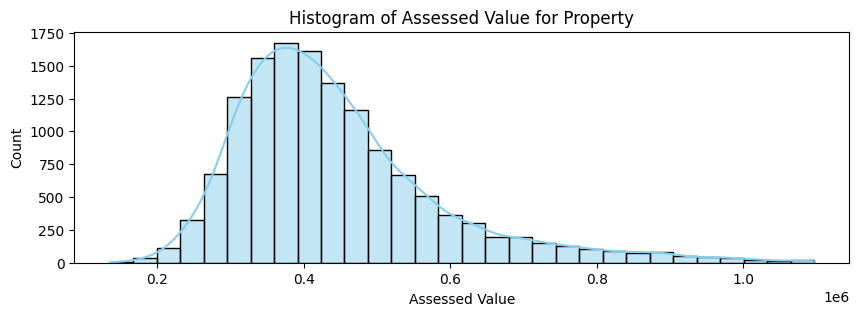

In [37]:
# Let's start with the target variable and see some visualizations
# Let's see a distribution plot
# Set the figure size
plt.figure(figsize=(10, 3))
# Create the histogram using seaborn
sns.histplot(boston_subset, x = 'av_total', bins=30, kde=True, color='skyblue')
# Set the title and x-label
plt.title('Histogram of Assessed Value for Property')
plt.xlabel('Assessed Value')
# Display the plot
plt.show()

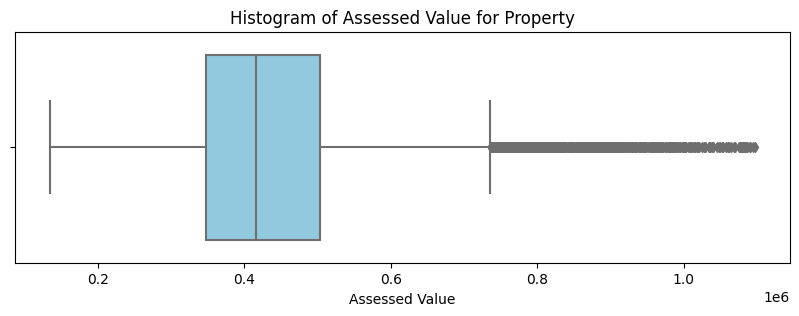

In [38]:
# Let's start with the target variable and see some visualizations
# Let's see a boxplot
# Set the figure size
plt.figure(figsize=(10, 3))
# Create the histogram using seaborn
sns.boxplot(boston_subset, x = 'av_total', color='skyblue')
# Set the title and x-label
plt.title('Histogram of Assessed Value for Property')
plt.xlabel('Assessed Value')
# Display the plot
plt.show()

In [39]:
# Let's start with the target variable and see some visualizations
# Let's see some descriptive statistics
# Set the figure size
boston_subset['av_total'].describe().to_frame()

# Mean house price is $445,391.52

av_total
count   13712.00
mean   445391.52
std    143005.13
min    134800.00
25%    348184.92
50%    415400.00
75%    503502.88
max   1097100.00

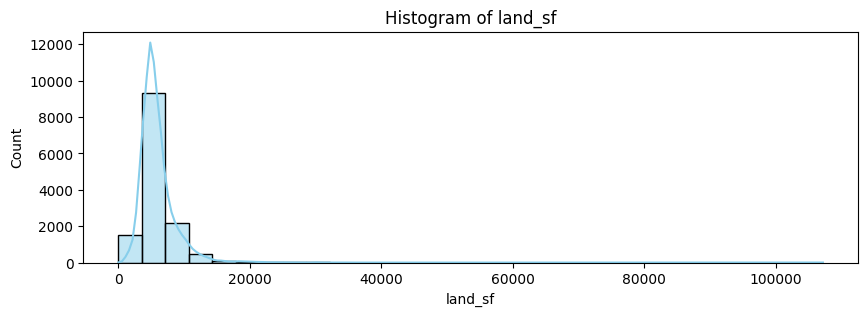

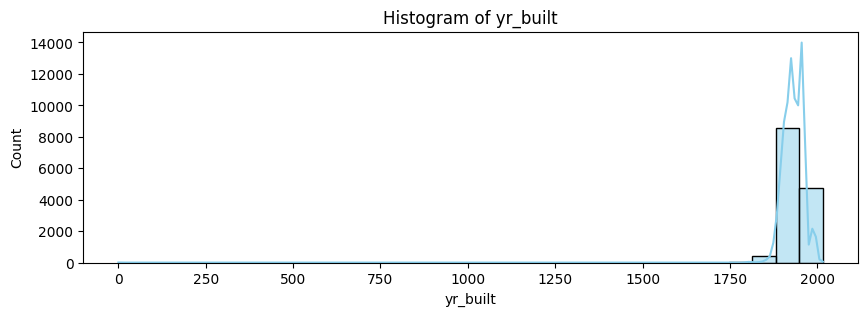

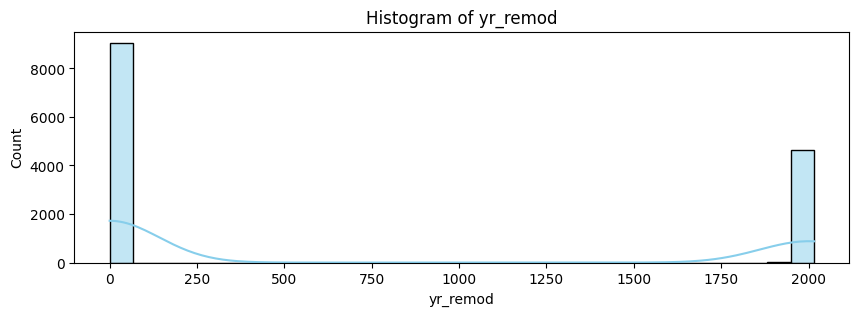

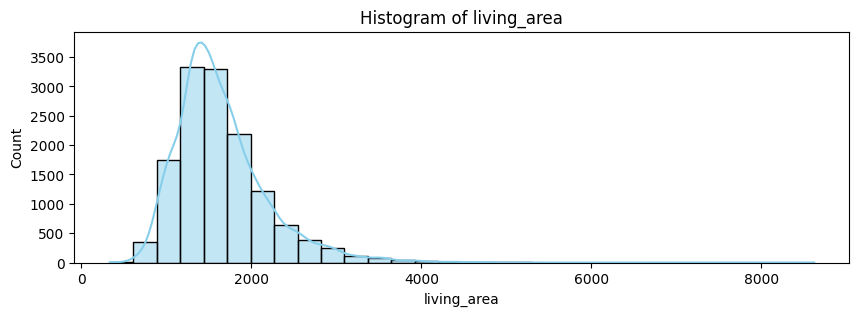

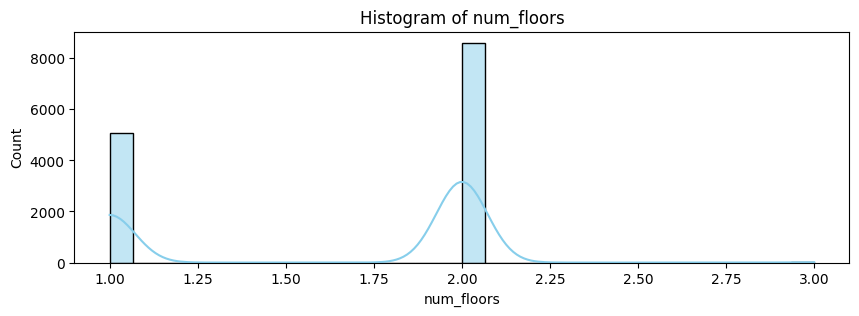

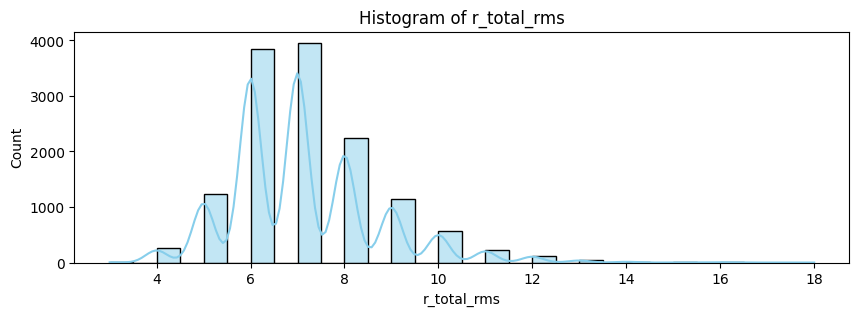

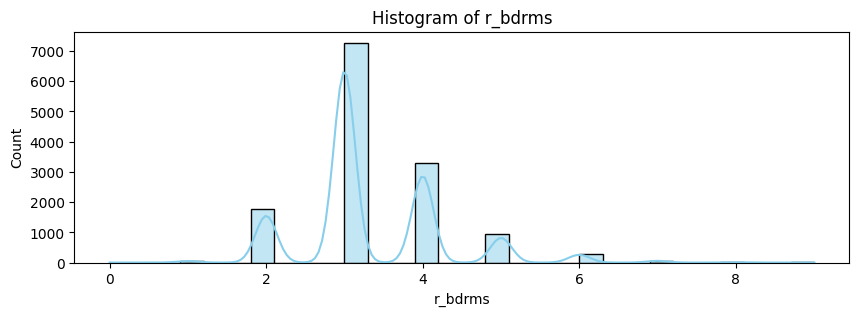

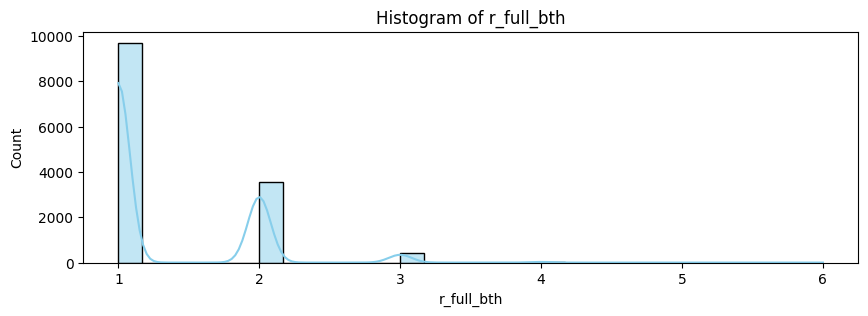

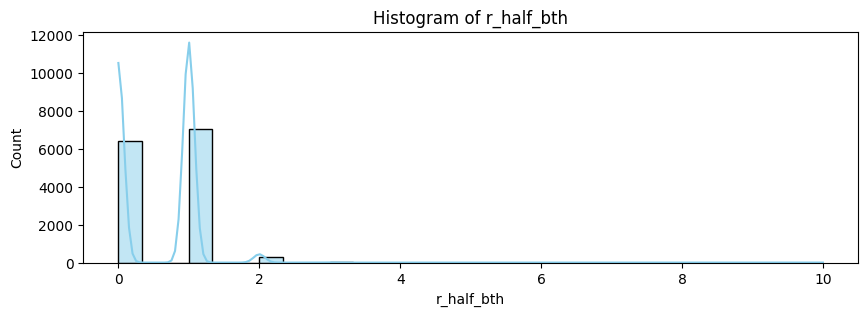

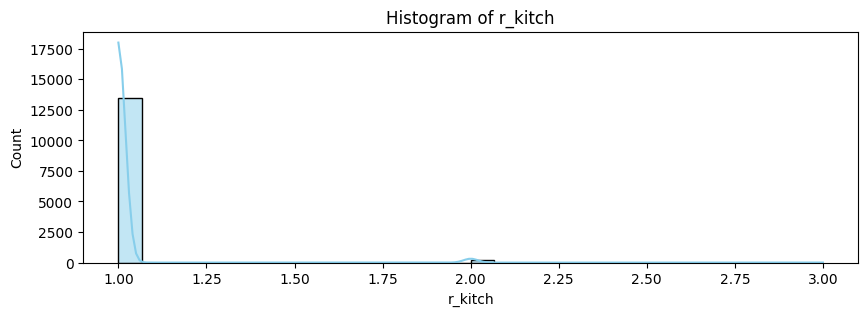

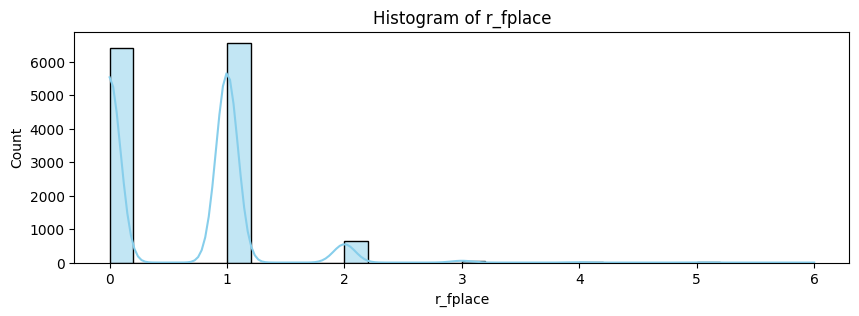

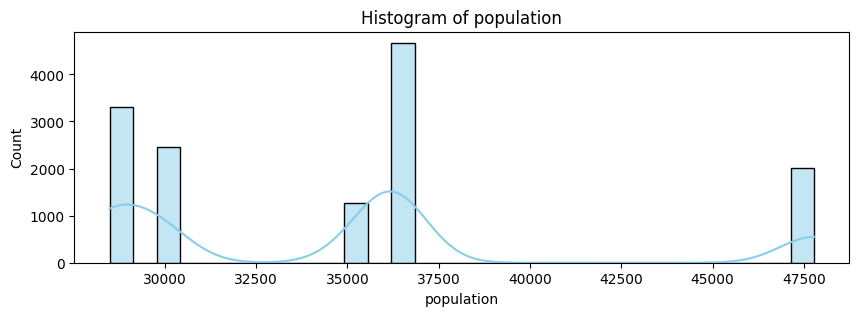

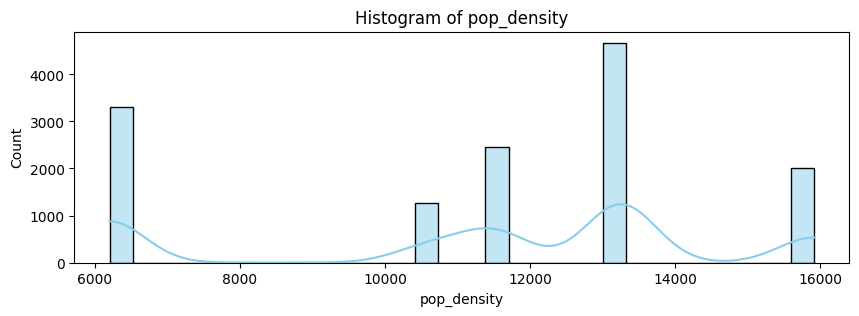

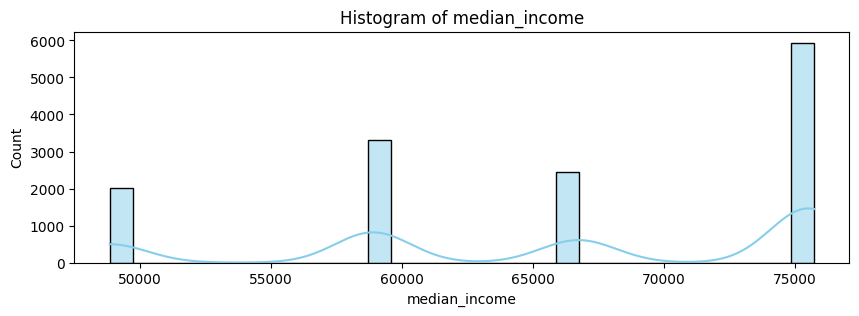

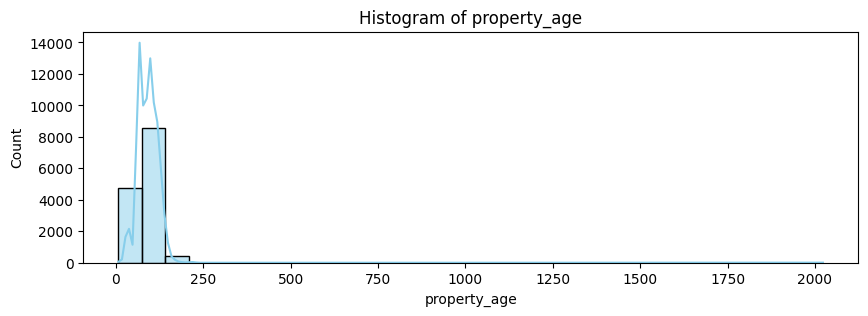

In [40]:
# Now for the features

for feature in boston_subset_numeric_features:

  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.histplot(boston_subset, x = feature, bins=30, kde=True, color='skyblue')
  # Set the title and x-label
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()


### Box plots are used to help with identifying any potential outliers

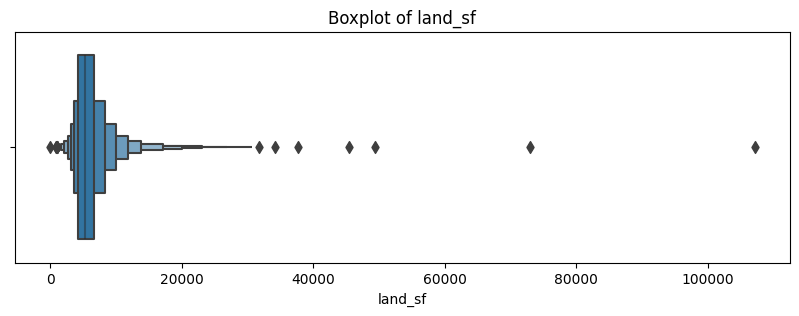

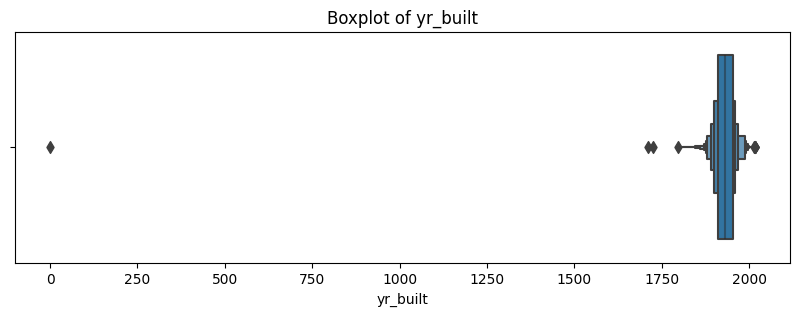

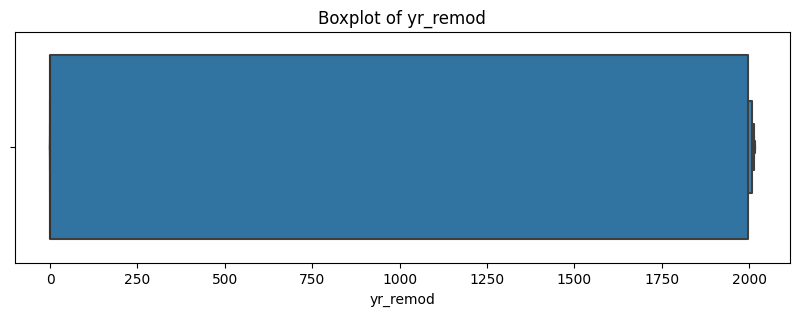

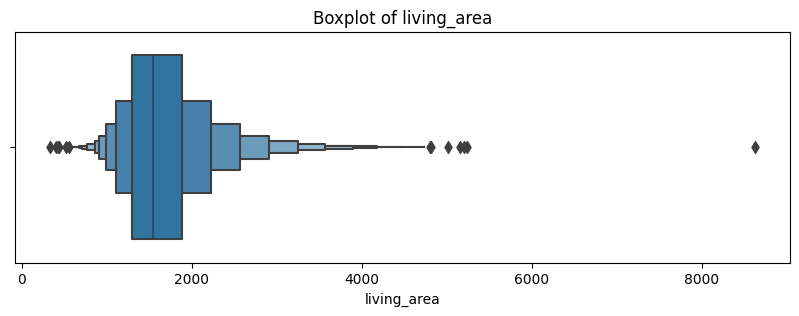

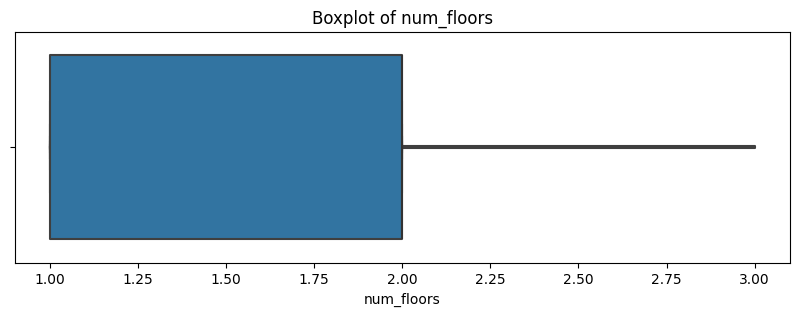

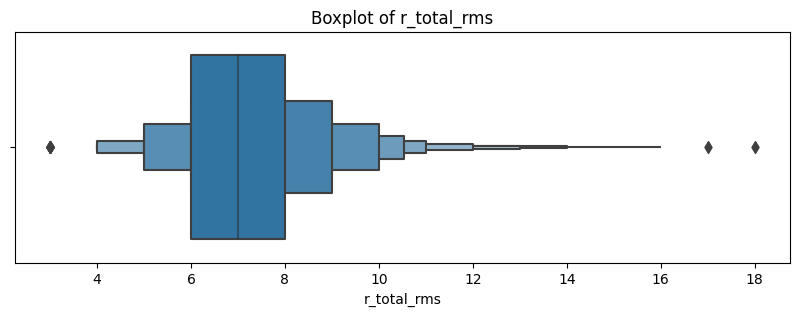

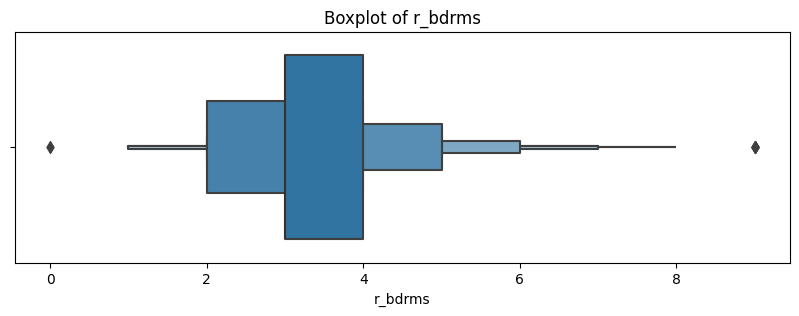

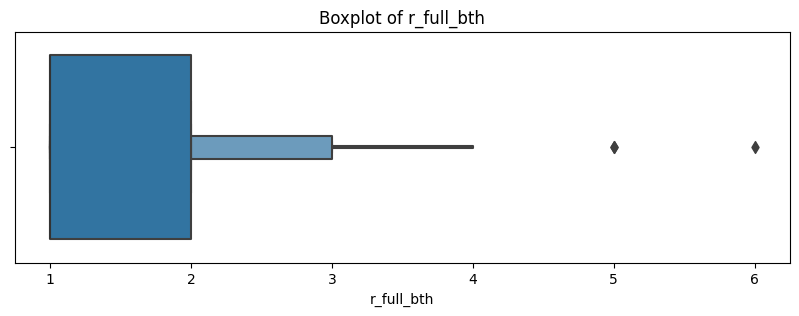

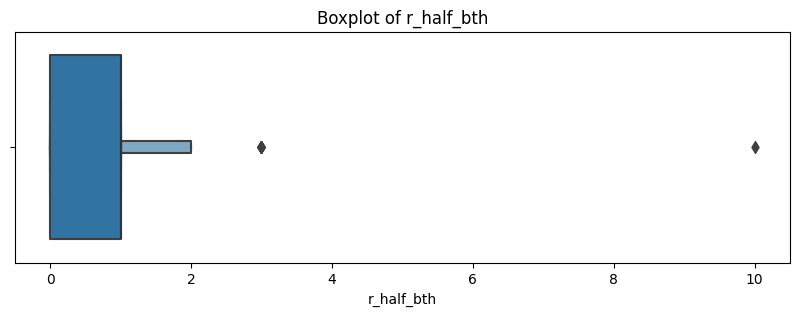

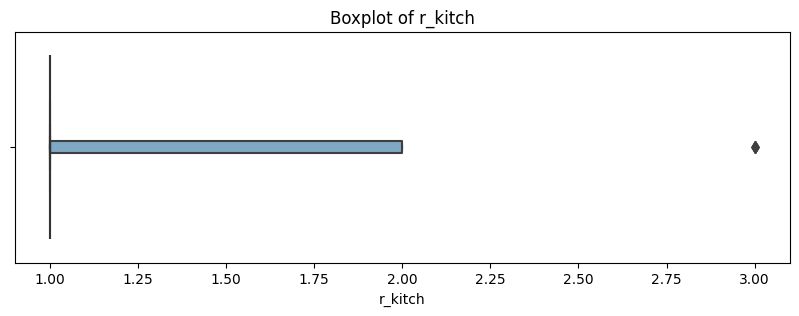

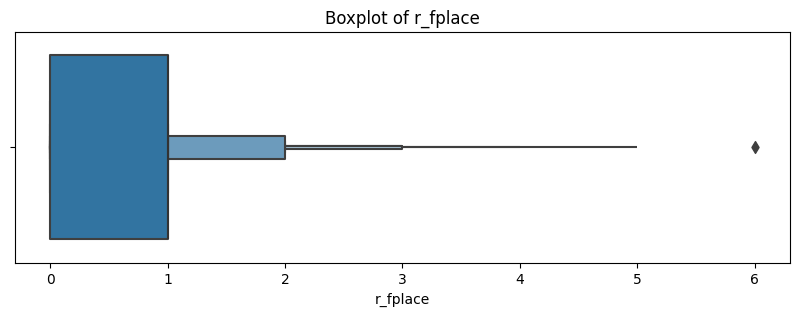

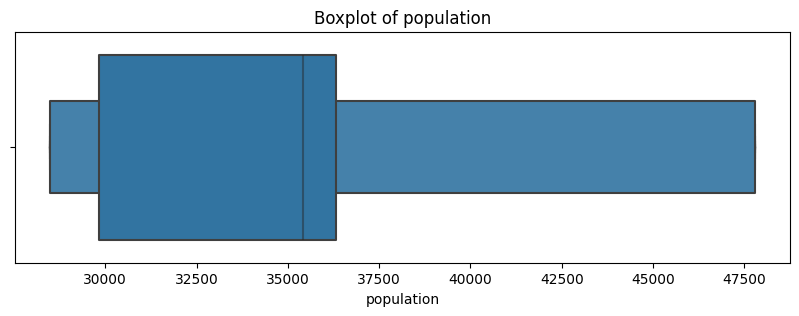

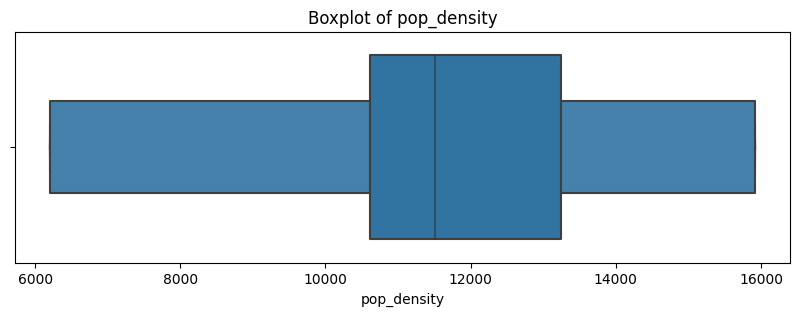

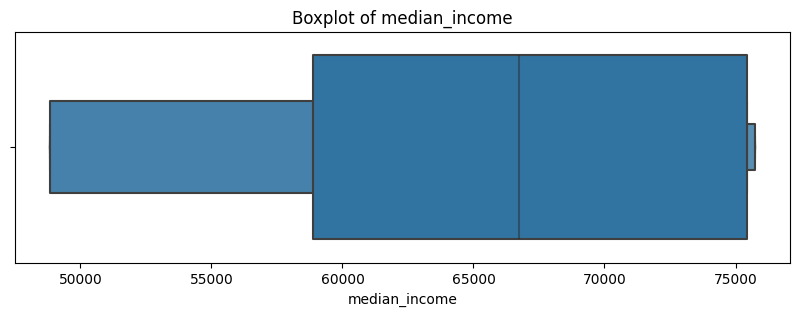

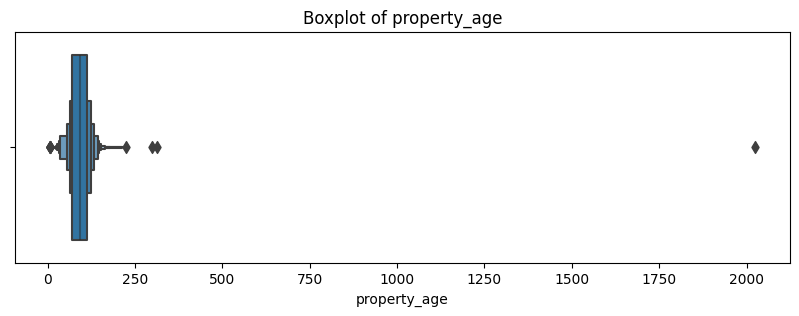

In [41]:
for feature in boston_subset_numeric_features:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.boxenplot(boston_subset, x = feature)
  # Set the title and x-label
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

### Statistics: Understand the central tendency and spread of each variable

In [42]:
boston_subset_numeric_features.describe().transpose()

count     mean     std      min      25%      50%      75%  \
land_sf       13712.00  5908.39 2883.10     0.00  4302.75  5268.50  6720.00   
yr_built      13712.00  1931.68   32.08     0.00  1910.00  1930.00  1953.00   
yr_remod      13712.00   679.44  947.80     0.00     0.00     0.00  1997.00   
living_area   13712.00  1645.58  542.49   332.00  1295.00  1540.00  1884.00   
num_floors    13712.00     1.63    0.49     1.00     1.00     2.00     2.00   
r_total_rms   13712.00     7.09    1.56     3.00     6.00     7.00     8.00   
r_bdrms       13712.00     3.33    0.92     0.00     3.00     3.00     4.00   
r_full_bth    13712.00     1.33    0.55     1.00     1.00     1.00     2.00   
r_half_bth    13712.00     0.56    0.54     0.00     0.00     1.00     1.00   
r_kitch       13712.00     1.02    0.13     1.00     1.00     1.00     1.00   
r_fplace      13712.00     0.59    0.62     0.00     0.00     1.00     1.00   
population    13712.00 34860.18 6287.60 28488.00 29826.00 35401.00 36314.00   
pop_density   13712.00 11386.48 3272.51  6207.00 10618.00 11505.00 13251.00   
median_income 13712.00 66024.84 9724.93 48841.00 58890.00 66735.00 75446.00   
property_age  13712.00    91.32   32.08     7.00    70.00    93.00   113.00   

                    max  
land_sf       107158.00  
yr_built        2016.00  
yr_remod        2016.00  
living_area     8623.00  
num_floors         3.00  
r_total_rms       18.00  
r_bdrms            9.00  
r_full_bth         6.00  
r_half_bth        10.00  
r_kitch            3.00  
r_fplace           6.00  
population     47783.00  
pop_density    15913.00  
median_income  75730.00  
property_age    2023.00

### Categorical Features

In [43]:
# Get the list of categorical columns
boston_subset_categorical_columns = boston_subset.select_dtypes(include=[np.object]).columns
boston_subset_categorical_columns

Index(['own_occ', 'structure_class', 'r_bldg_styl', 'r_roof_typ', 'r_ext_fin',
       'r_bth_style', 'r_kitch_style', 'r_heat_typ', 'r_ac', 'r_ext_cnd',
       'r_ovrall_cnd', 'r_int_cnd', 'r_int_fin', 'r_view', 'city_state',
       'remod_ind'],
      dtype='object')

In [44]:
# boston_categorical_features
boston_subset_categorical_features = boston_subset[['own_occ', 'structure_class', 'r_bldg_styl', 'r_roof_typ', 'r_ext_fin', 'r_bth_style', 'r_kitch_style',
                                             'r_heat_typ', 'r_ac','r_ext_cnd', 'r_ovrall_cnd', 'r_int_cnd', 'r_int_fin', 'r_view', 'city_state', 'remod_ind']]
boston_subset_categorical_features.head()

own_occ structure_class r_bldg_styl r_roof_typ r_ext_fin r_bth_style  \
0       Y               R          RR          G         M           S   
1       Y               R          CL          H         F           M   
2       Y               R          CL          G         M           S   
3       Y               R          CL          M         W           M   
4       Y               R          RR          G         W           S   

  r_kitch_style r_heat_typ r_ac r_ext_cnd r_ovrall_cnd r_int_cnd r_int_fin  \
0             S          W    N         A            A         A         N   
1             M          F    N         G            G         G         N   
2             S          W    N         A            A         A         N   
3             M          W    N         G            G         A         N   
4             S          E    N         A            A         A         N   

  r_view             city_state remod_ind  
0      A          Hyde Park, MA        no  
1      G          Cambridge, MA       yes  
2      A          Cambridge, MA        no  
3      F  Dorchester Center, MA       yes  
4      G          Hyde Park, MA       yes

### Count plots

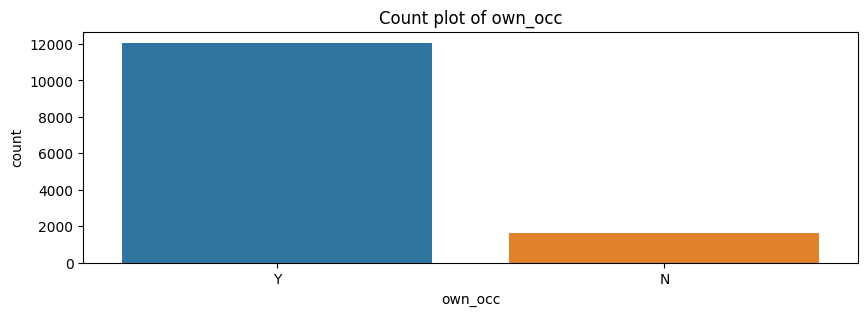

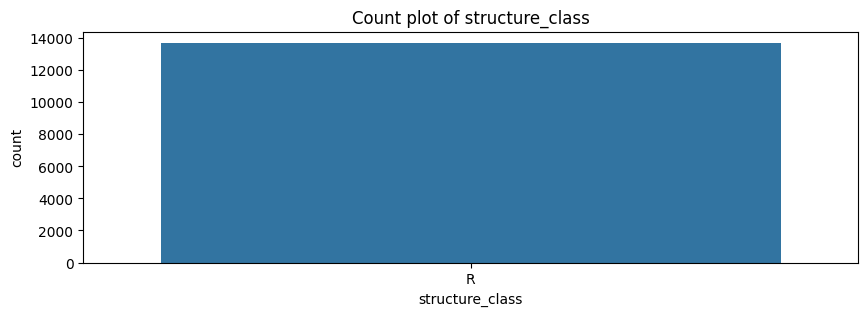

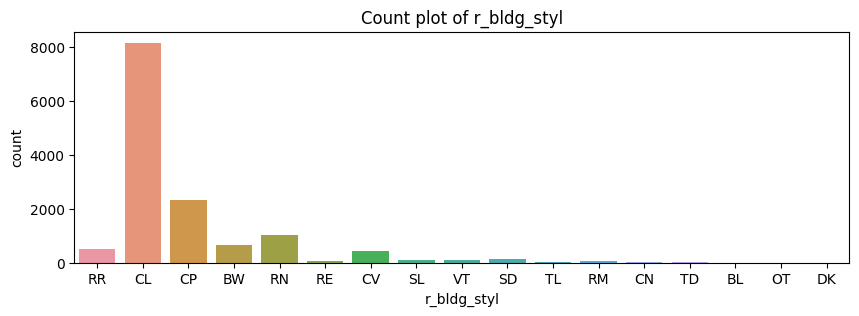

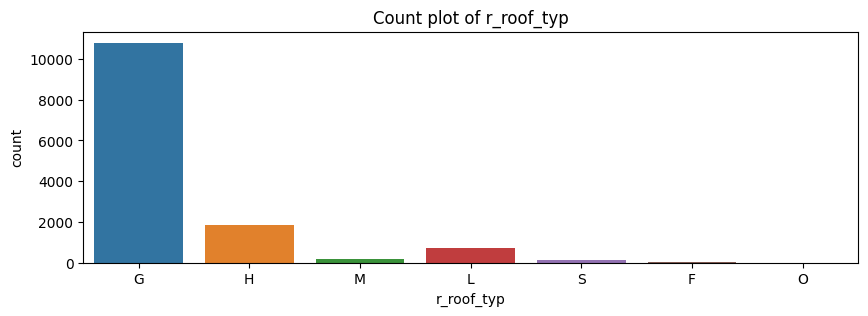

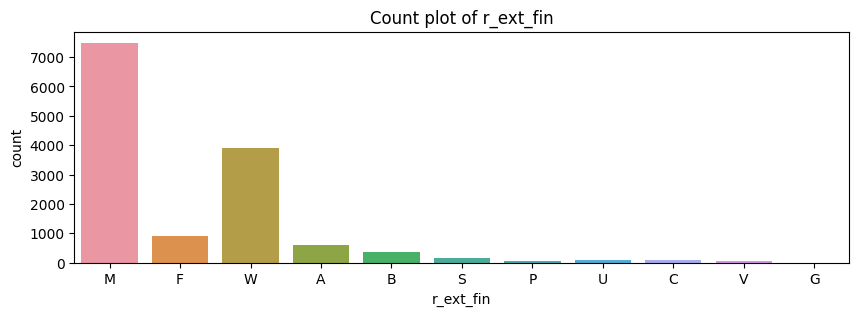

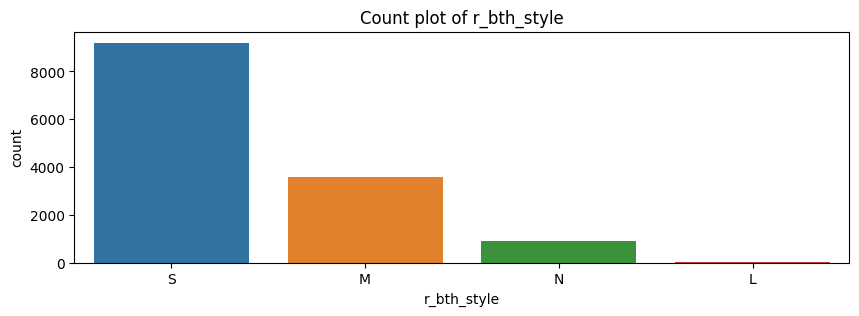

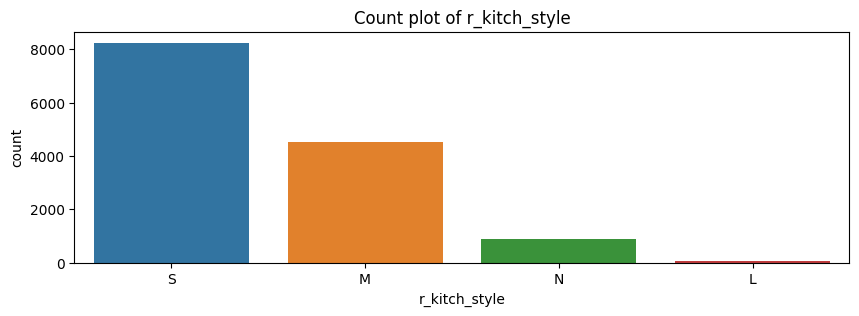

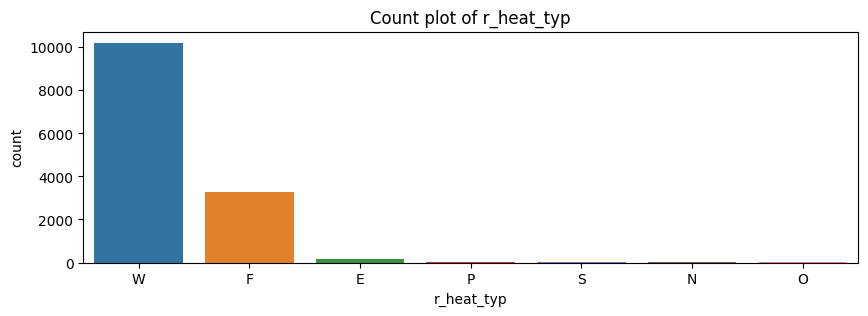

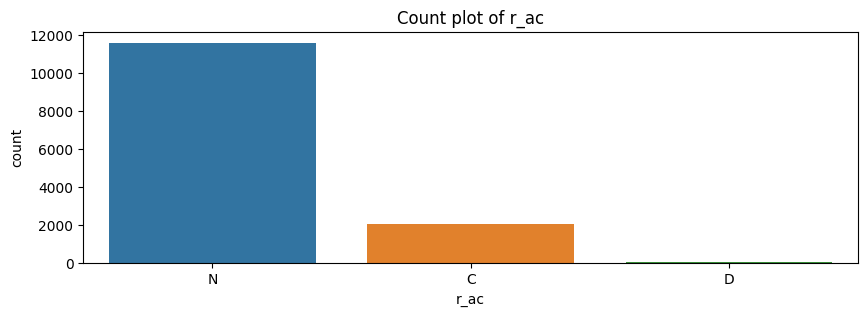

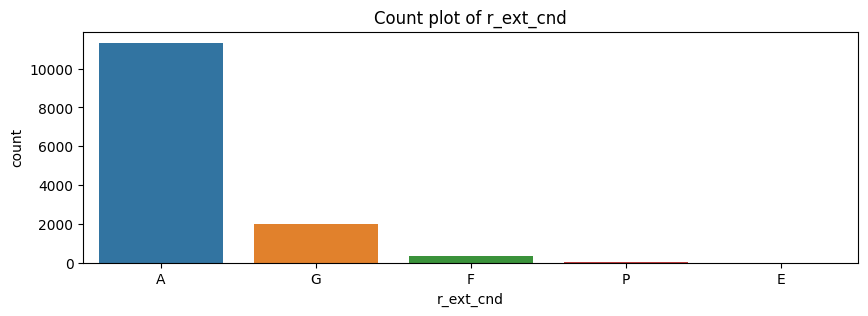

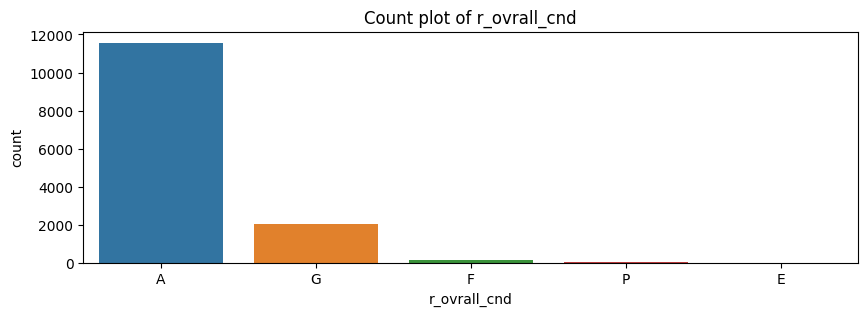

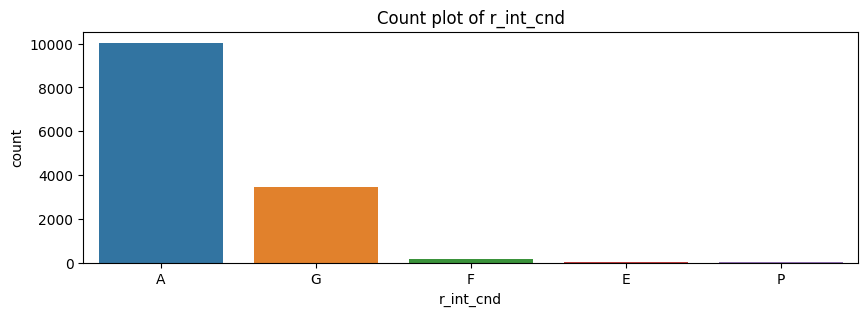

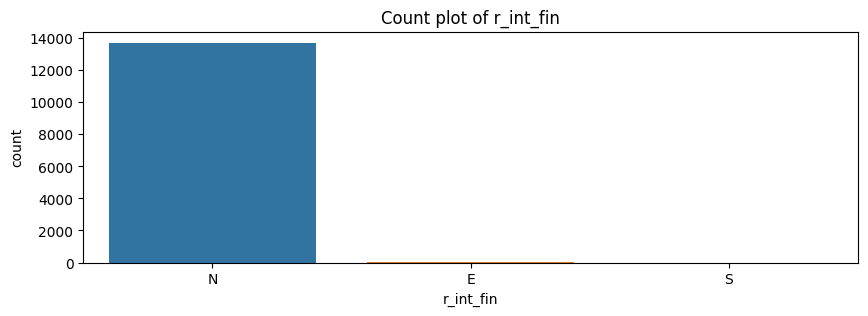

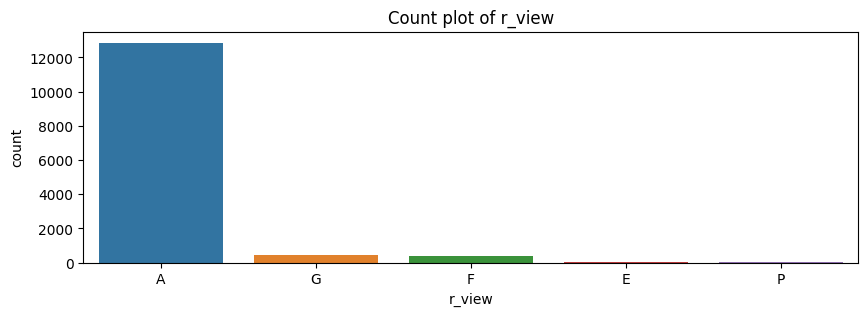

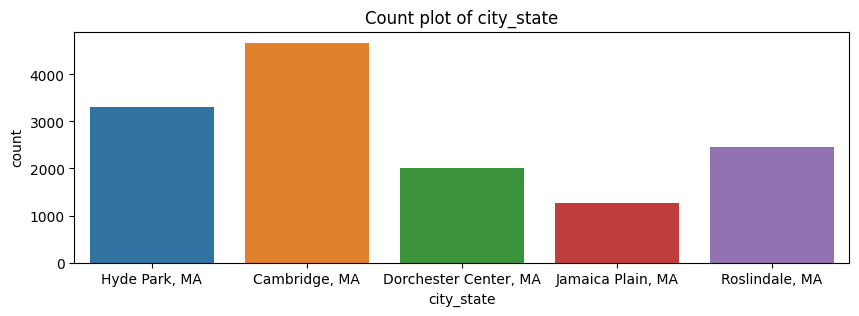

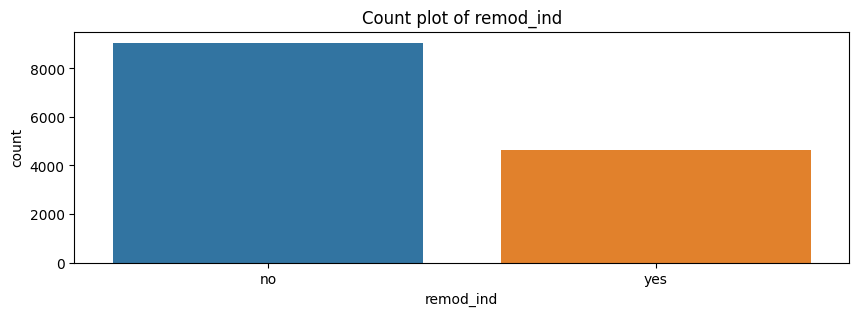

In [45]:
# Let's take a look of visualizations for the categorical features
for feature in boston_subset_categorical_features:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.countplot(boston_subset, x = feature)
  # Set the title and x-label
  plt.title(f'Count plot of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

### Descriptive Statistics

In [46]:
# Let's take a look at the count of the categorical features along with how many unique values there are, andd the most frequent values under these features.
boston_subset_categorical_features.describe().transpose()


count unique            top   freq
own_occ          13712      2              Y  12068
structure_class  13712      1              R  13712
r_bldg_styl      13712     17             CL   8172
r_roof_typ       13712      7              G  10811
r_ext_fin        13712     11              M   7494
r_bth_style      13712      4              S   9202
r_kitch_style    13712      4              S   8246
r_heat_typ       13712      7              W  10212
r_ac             13712      3              N  11596
r_ext_cnd        13712      5              A  11345
r_ovrall_cnd     13712      5              A  11574
r_int_cnd        13712      5              A  10042
r_int_fin        13712      3              N  13703
r_view           13712      5              A  12871
city_state       13712      5  Cambridge, MA   4673
remod_ind        13712      2             no   9057

# 3. **Bivariate Analysis**
For each feature with respect to the Target Variable:

- **Scatter plots**: Understand the relationship between the feature and target variable

- **Correlation**: Calculate the correlation coefficient to quantify the linear relationship

- **Cross-tabulation and other visualizations**: Especially useful if either the target or feature is categorical

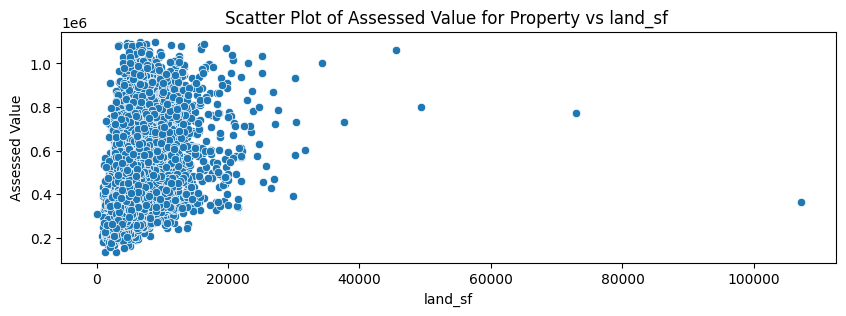

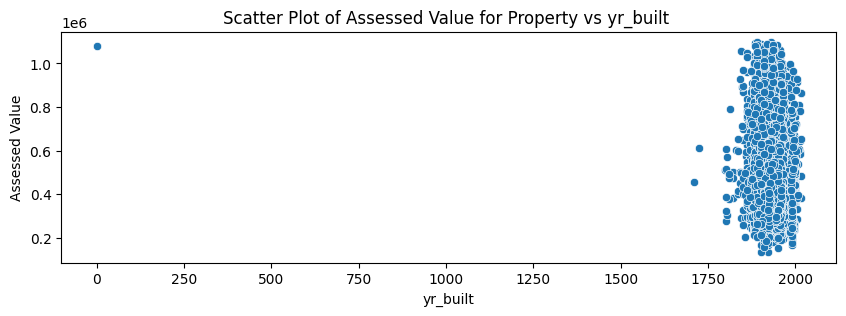

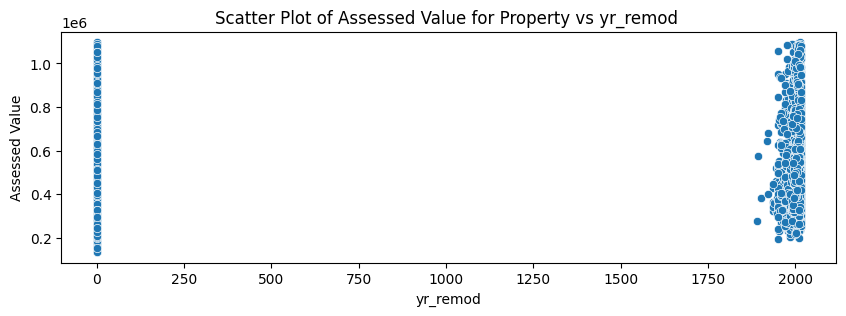

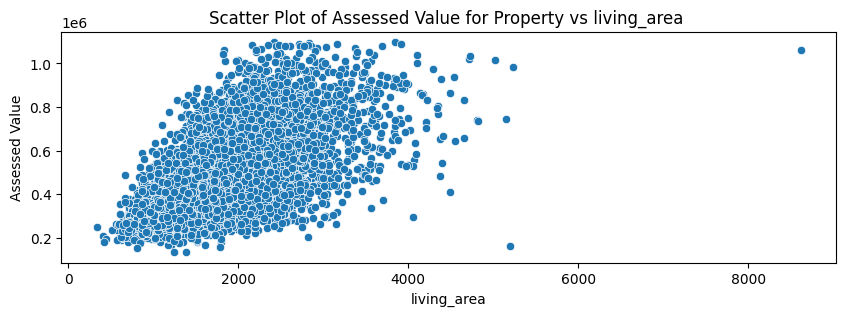

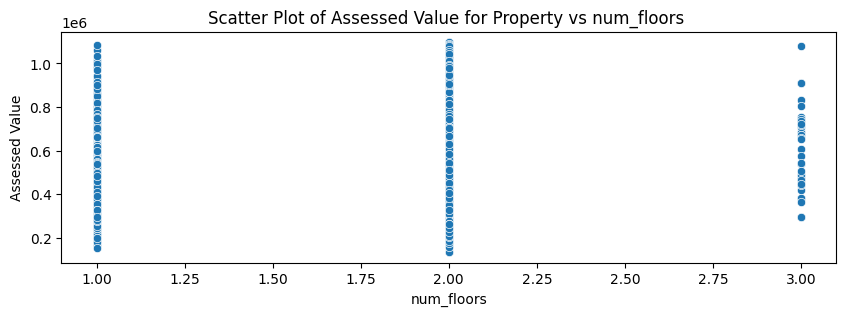

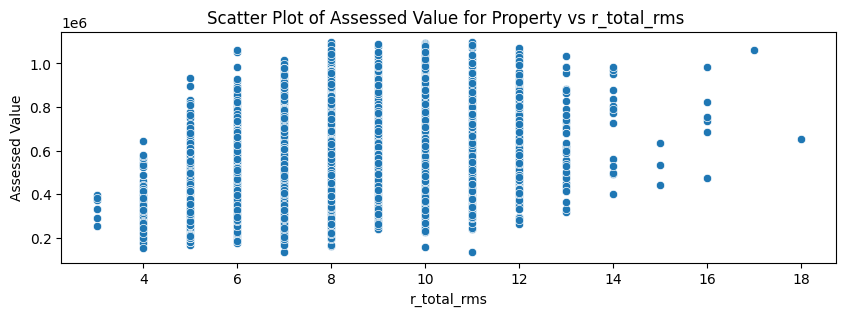

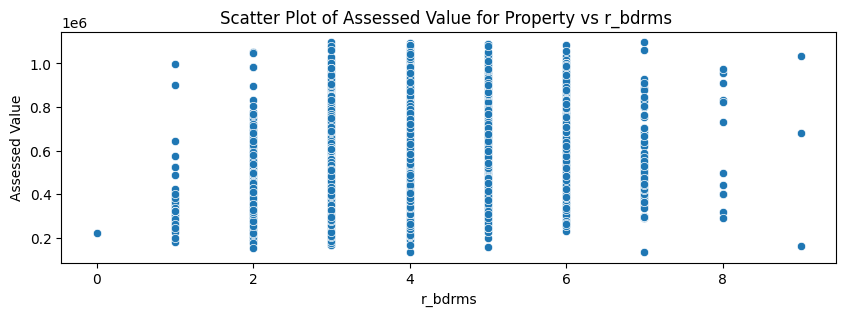

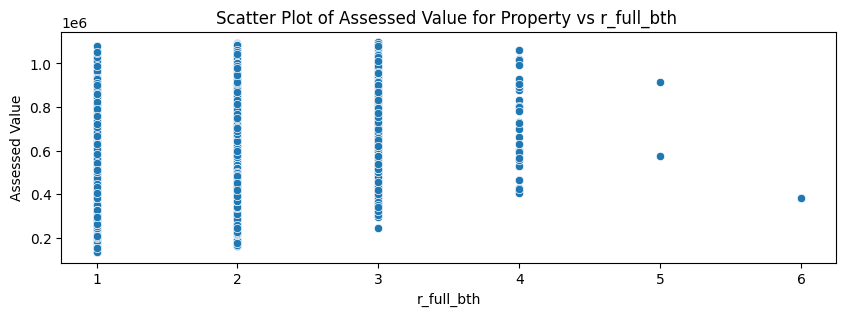

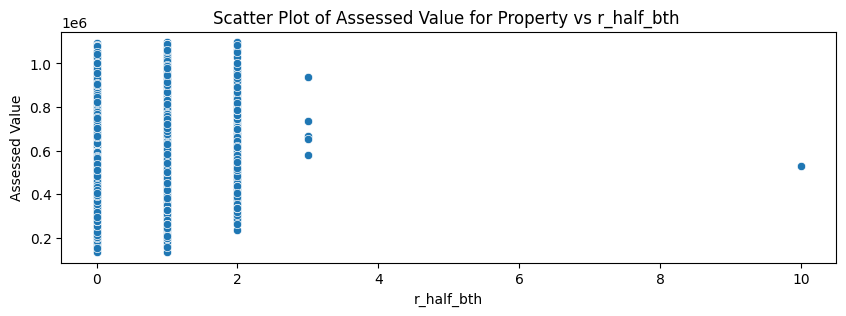

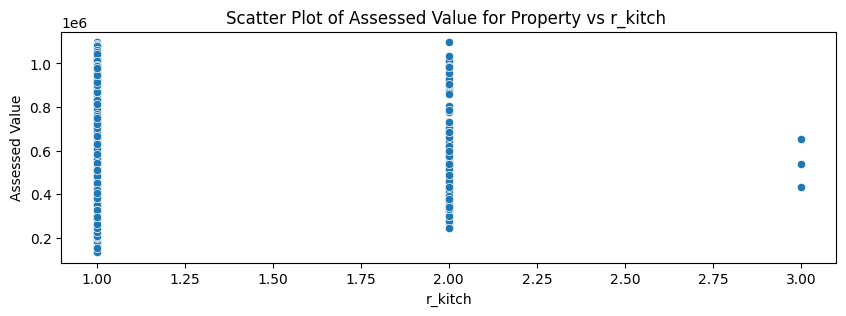

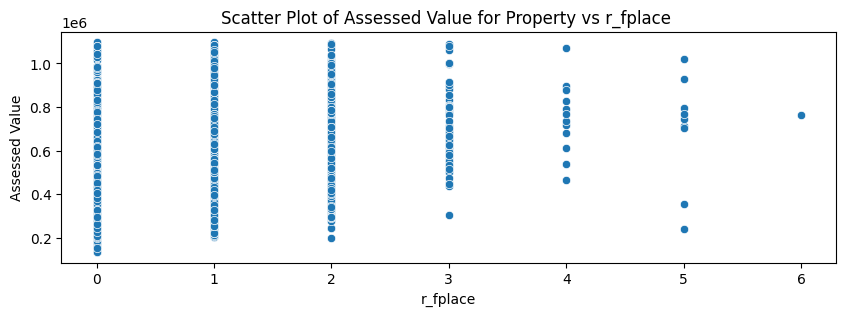

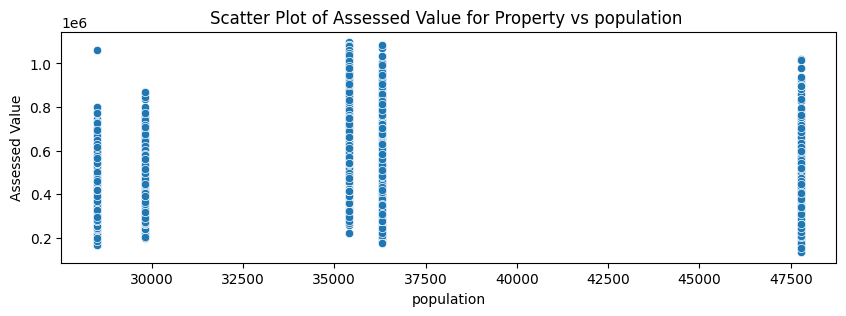

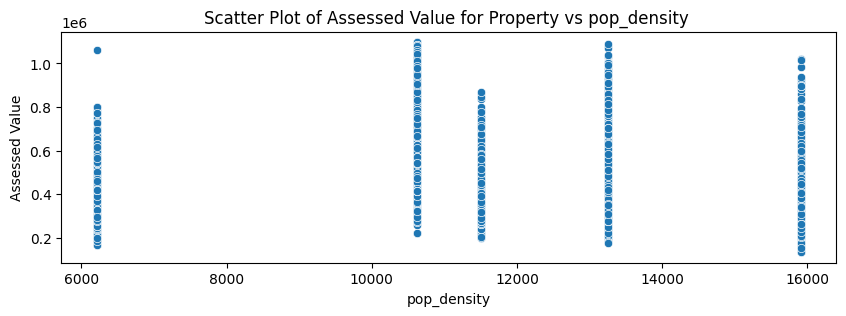

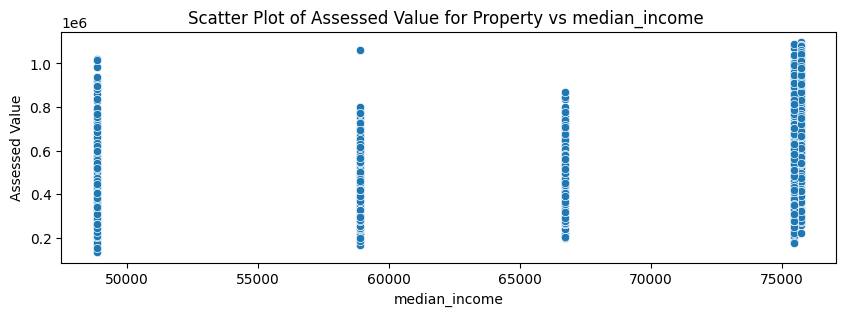

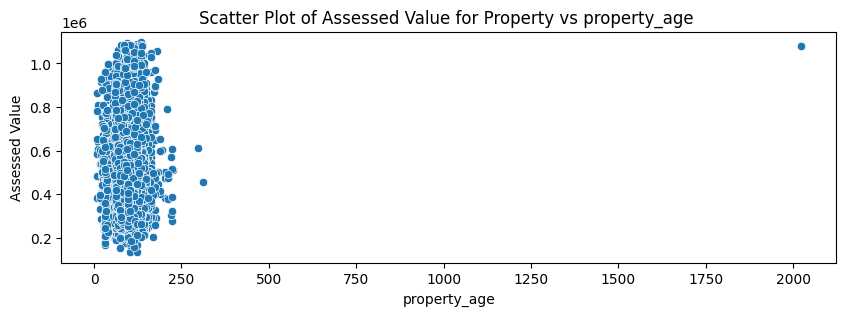

In [47]:
for feature in boston_subset_numeric_features:
    # Set the figure size
    plt.figure(figsize=(10, 3))
    # Create the histogram using seaborn
    sns.scatterplot(boston_subset,x=feature, y='av_total')
    # if you want a linear line
    # sns.regplot(wake,x=feature, y='sale_price', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})

    # Set the title and x-label
    plt.title(f'Scatter Plot of Assessed Value for Property vs {feature} ')
    plt.xlabel(feature)
    plt.ylabel('Assessed Value')
    # Display the plot
    plt.show()

### Let's look at a regression plot (scatter plot with a linear line)

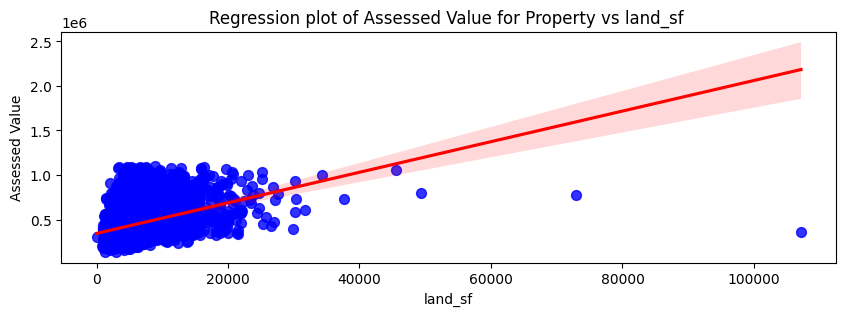

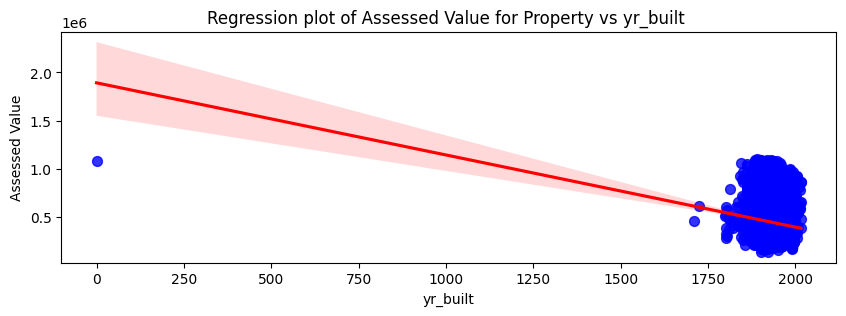

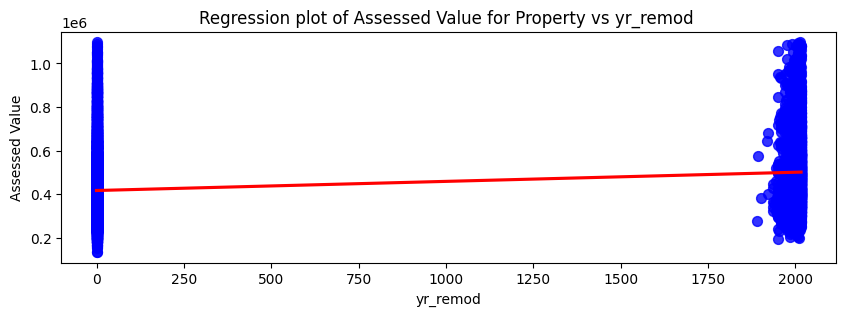

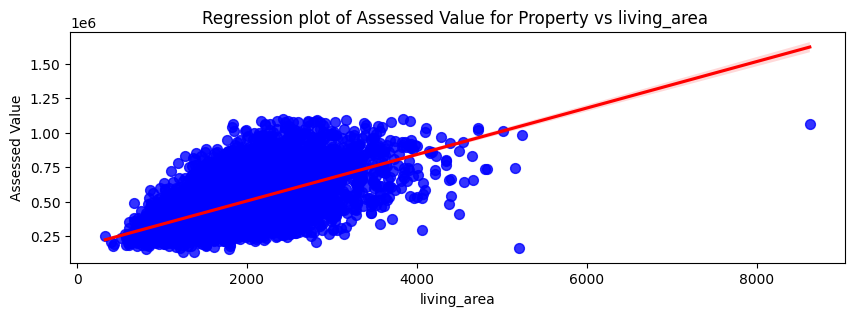

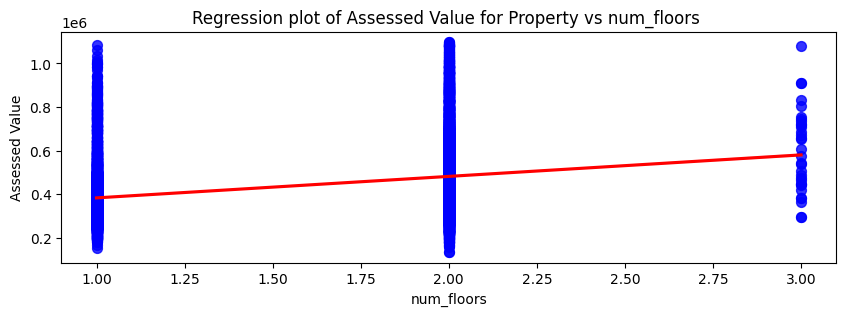

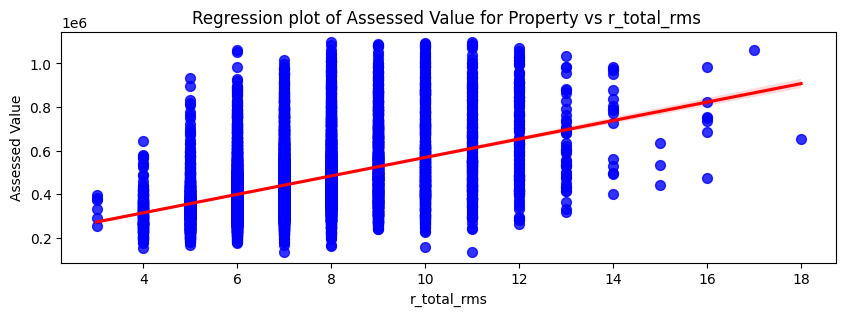

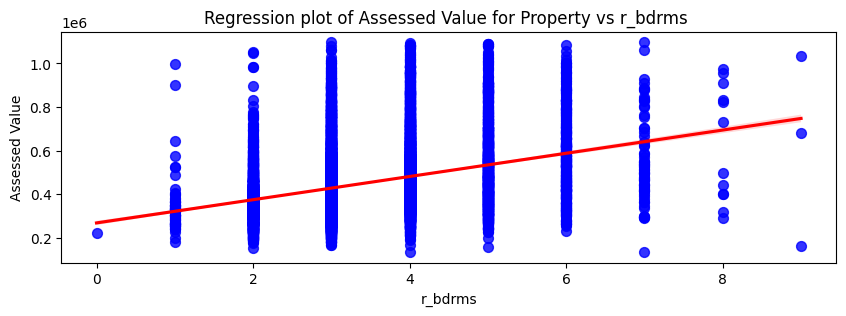

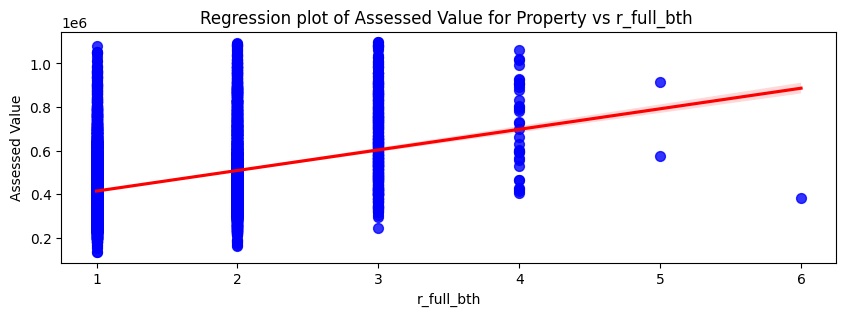

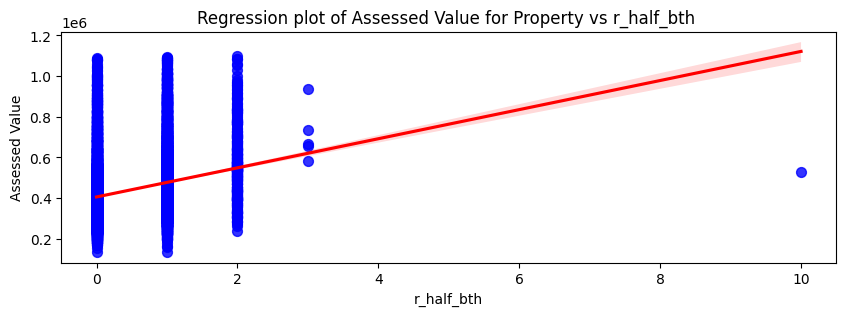

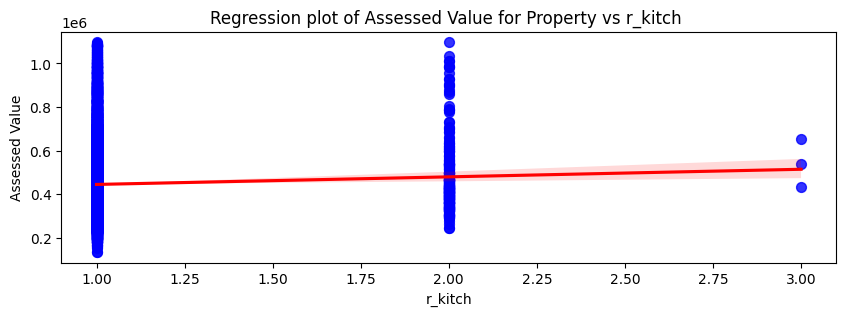

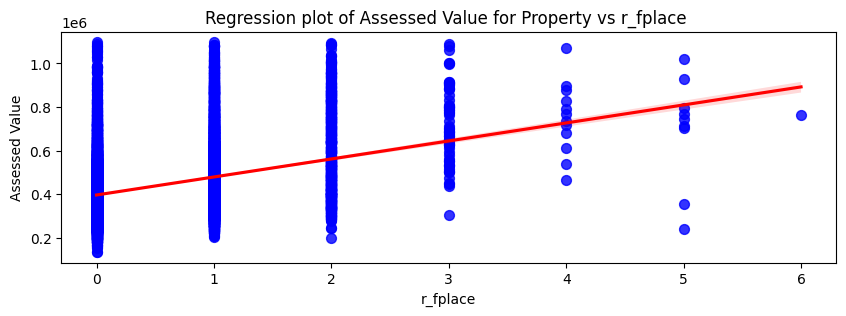

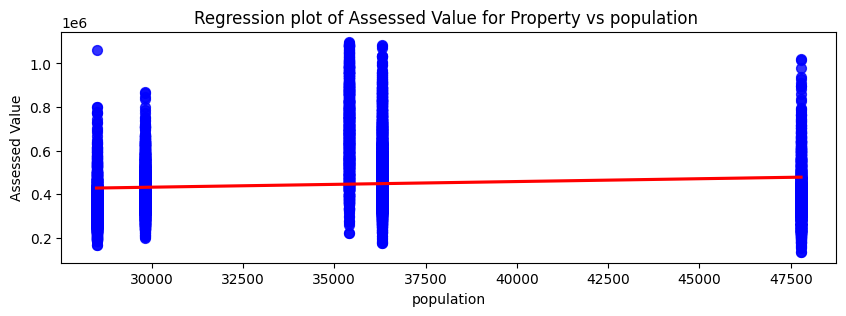

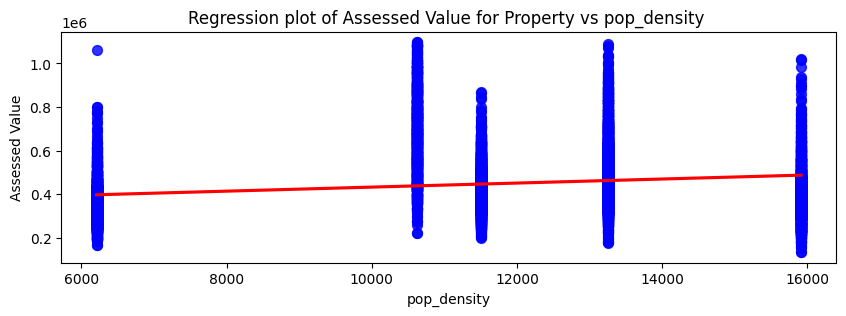

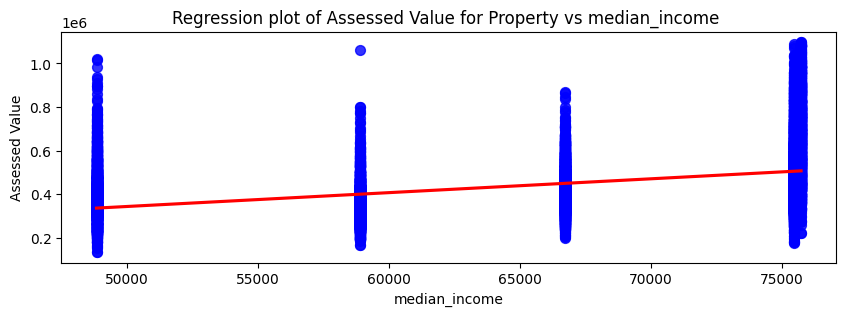

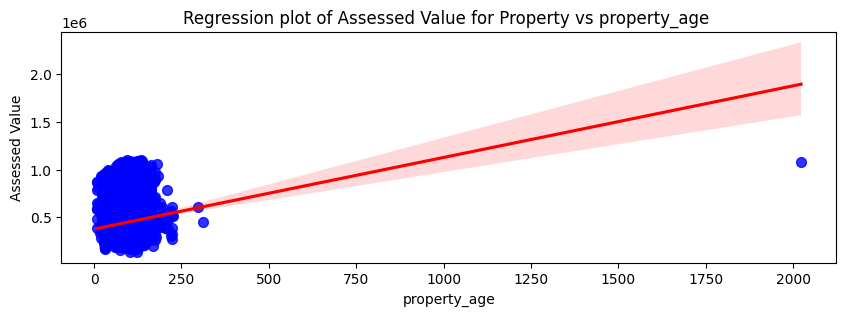

In [48]:
for feature in boston_subset_numeric_features:
    # Set the figure size
    plt.figure(figsize=(10, 3))
    # Create the a linear line using seaborn
    sns.regplot(boston_subset,x=feature, y='av_total', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
    # Set the title and x-label
    plt.title(f'Regression plot of Assessed Value for Property vs {feature} ')
    plt.xlabel(feature)
    plt.ylabel('Assessed Value')
    # Display the plot
    plt.show()

## **Correlation**
---
Calculate the correlation coefficient to quantify the linear relationship. The range goes from -1 to 1, and the closer we are to 1 or -1 means that there is a strong linear relationship between two variables.

In [49]:
# Compute the correlation of each variable with the target
correlations = boston_subset_numeric_features.apply(lambda x: x.corr(boston_subset['av_total']))
df_correlations = correlations.to_frame(name='correlation')
#df_correlations.columns = ['feature', 'correlation']
df_correlations = df_correlations.sort_values('correlation', ascending=False)
df_correlations


correlation
living_area           0.64
r_total_rms           0.46
median_income         0.43
r_full_bth            0.36
r_fplace              0.36
land_sf               0.35
r_bdrms               0.34
num_floors            0.34
yr_remod              0.28
r_half_bth            0.27
pop_density           0.21
property_age          0.17
population            0.11
r_kitch               0.03
yr_built             -0.17

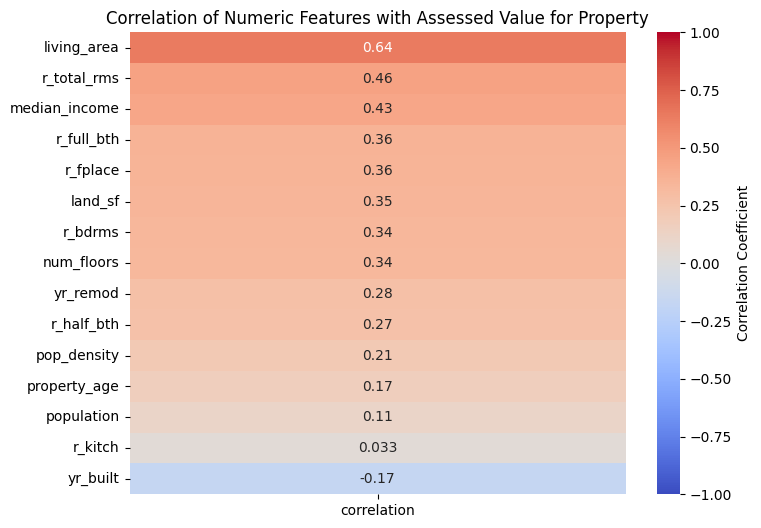

In [50]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlations,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation of Numeric Features with Assessed Value for Property')
plt.show()

### *The relevant features we will focus our analysis on is living_area, r_total_rms, median_income, r_full_bth, r_fplace, land_sf, r_bdrms, num_floors, yr_remod, r_half_bth, pop_density, city_state, own_occ, zipcode, and remod_ind. We believe that the numeric features with a corrleation greater than 0.2 are relveant to include and the cateorgical variables that determine location and owner information.*


## **Cros-tabulation and other visualizations**

---

### Useful if either the target or feature is categorical
- **Boxplot category to target**
- **Pivot table cateogry to target mean**

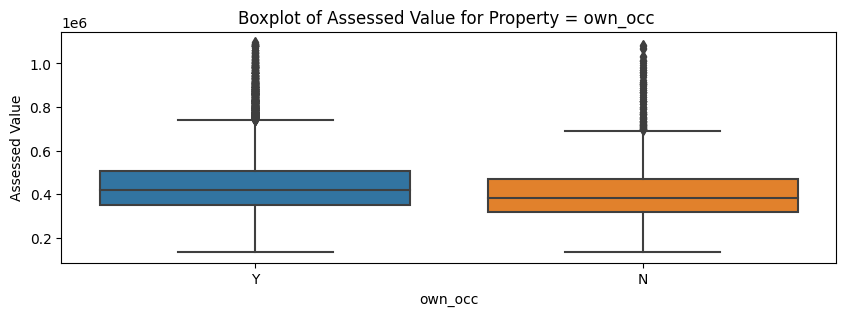

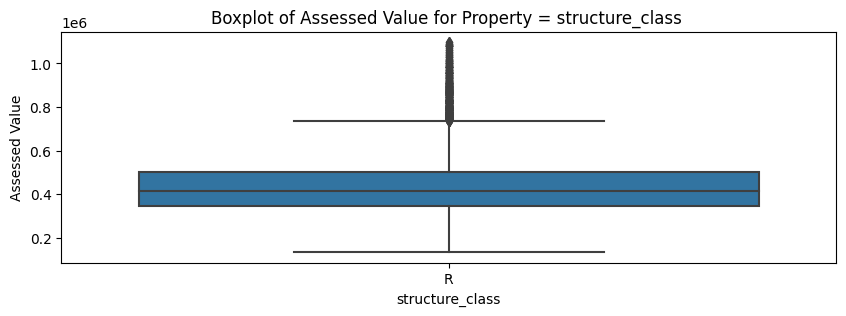

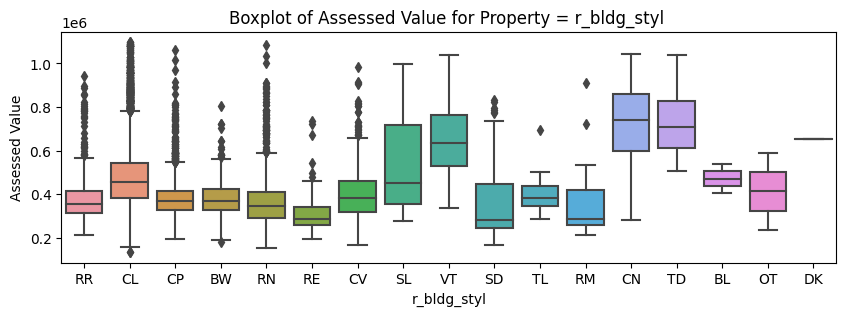

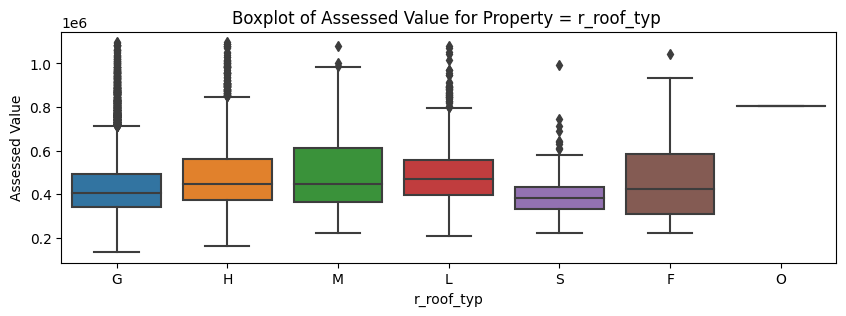

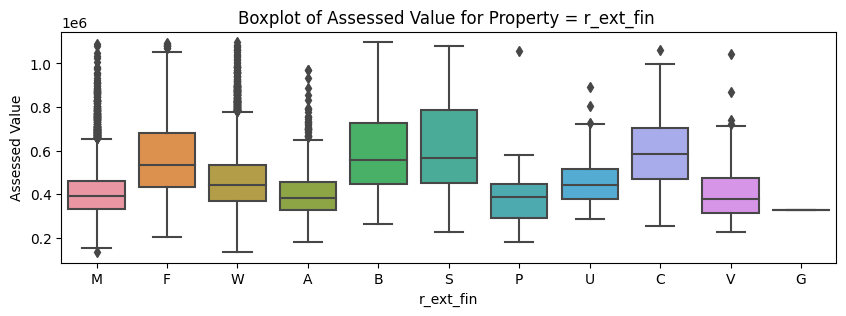

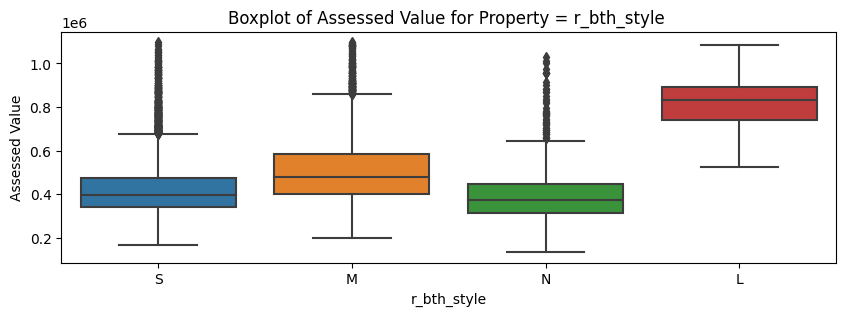

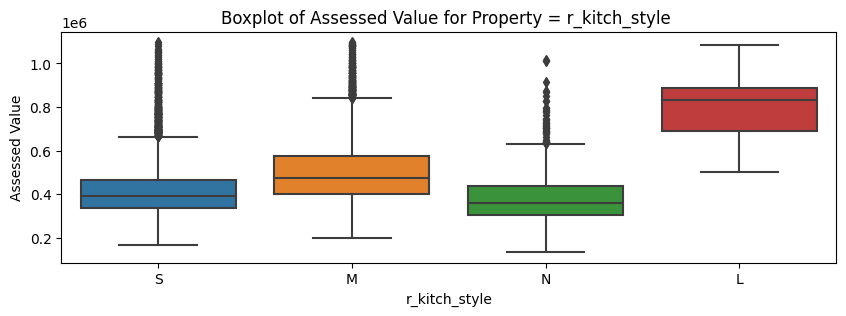

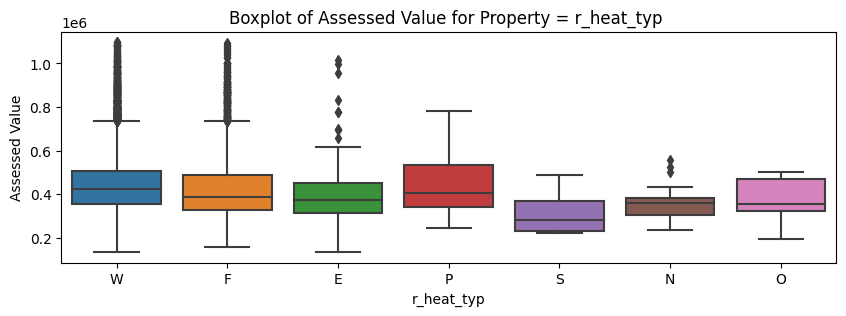

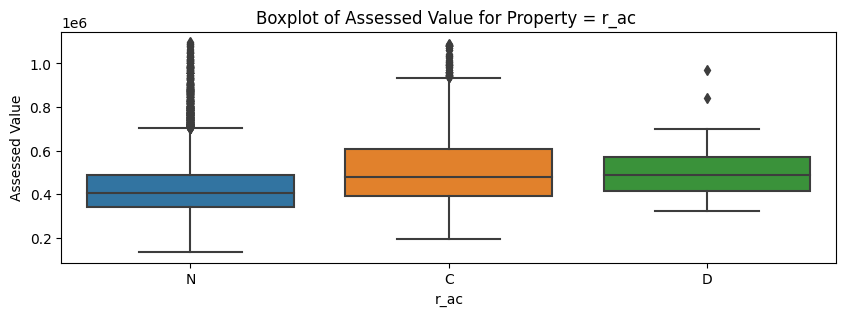

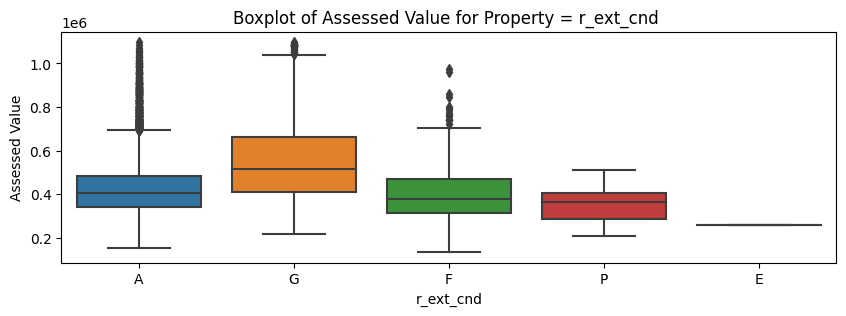

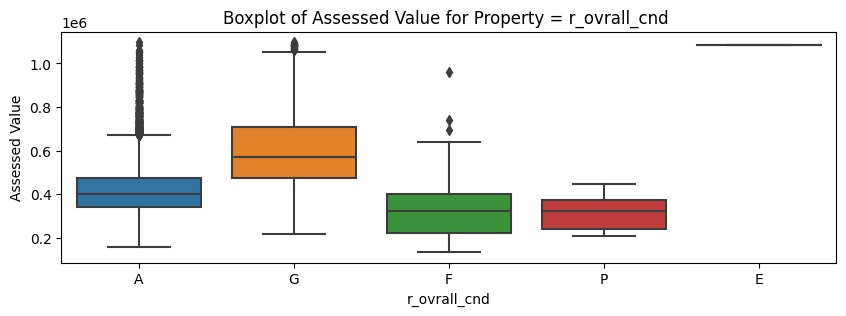

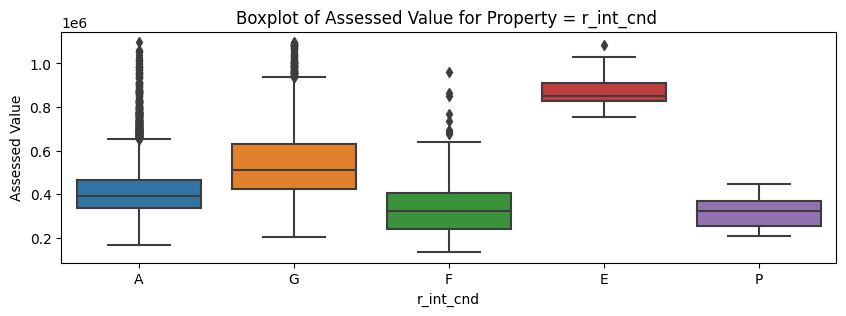

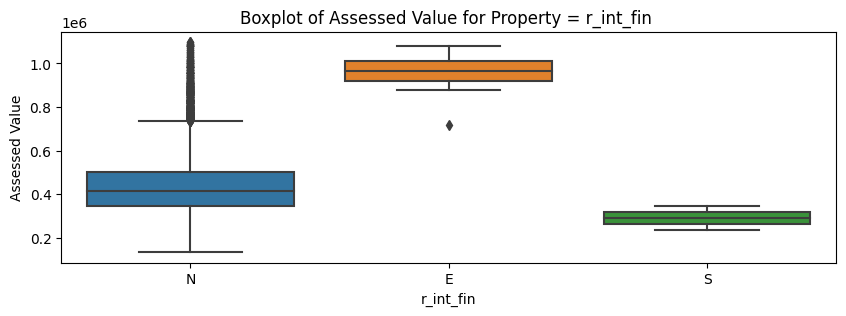

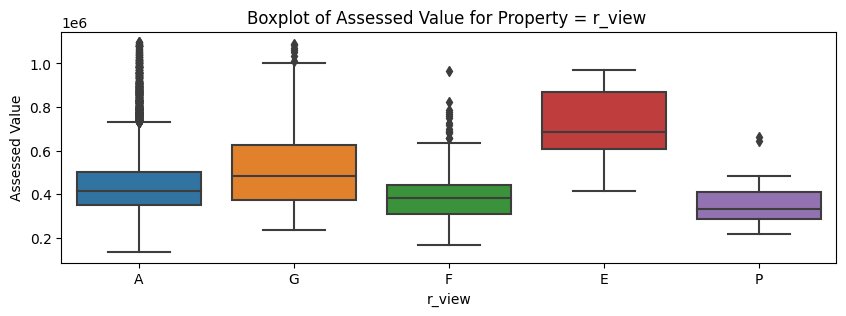

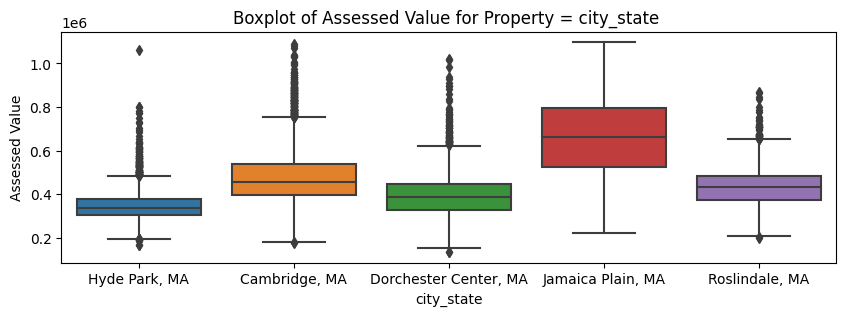

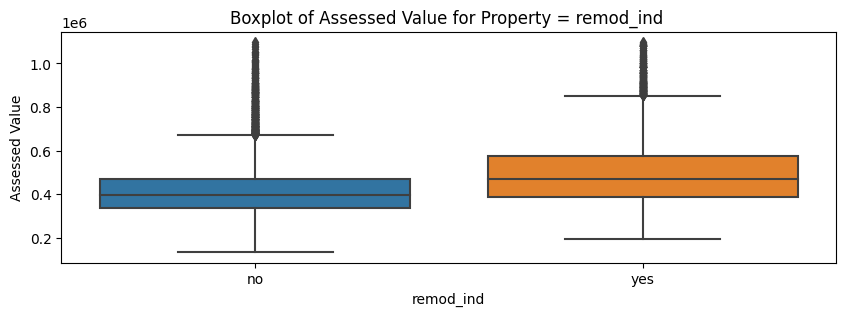

In [51]:
for category in boston_subset_categorical_features:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.boxplot(boston_subset,x=category, y='av_total')
  plt.title(f'Boxplot of Assessed Value for Property = {category} ')
  plt.xlabel(category)
  plt.ylabel('Assessed Value')
  # Display the plot
  plt.show()

## **Pivot Tables**

---


In [52]:
pivot_table_result = pd.pivot_table(boston_subset,
                                    index='structure_class',
                                    columns='median_income',
                                    values='av_total',
                                    fill_value=0,
                                    aggfunc=['mean', 'count']).round(1)
pivot_table_result # For Residential structure class, we can find the frequency counts of median incomes but also the mean av_total based on median income

mean                                         count        \
median_income       48841     58890     66735     75446     75730 48841 58890   
structure_class                                                                 
R               398657.00 346327.10 434646.30 480877.60 667476.10  2008  3305   

                                   
median_income   66735 75446 75730  
structure_class                    
R                2457  4673  1269

In [53]:
pivot_table_result2 = pd.pivot_table(boston_subset,
                                    index='city_state',
                                    columns='median_income',
                                    values='av_total',
                                    fill_value=0,
                                    aggfunc=['mean','count']).round(1)
pivot_table_result2 # We can find the most common median_incomes based on city states and the av_total mean for the city states

mean                                         count  \
median_income             48841     58890     66735     75446     75730 48841   
city_state                                                                      
Cambridge, MA              0.00      0.00      0.00 480877.60      0.00     0   
Dorchester Center, MA 398657.00      0.00      0.00      0.00      0.00  2008   
Hyde Park, MA              0.00 346327.10      0.00      0.00      0.00     0   
Jamaica Plain, MA          0.00      0.00      0.00      0.00 667476.10     0   
Roslindale, MA             0.00      0.00 434646.30      0.00      0.00     0   

                                               
median_income         58890 66735 75446 75730  
city_state                                     
Cambridge, MA             0     0  4673     0  
Dorchester Center, MA     0     0     0     0  
Hyde Park, MA          3305     0     0     0  
Jamaica Plain, MA         0     0     0  1269  
Roslindale, MA            0  2457     0     0

In [54]:
pivot_table_result3 = pd.pivot_table(boston_subset,
                                    index='r_total_rms',
                                    columns='city_state',
                                    values='av_total',
                                    fill_value=0,
                                    aggfunc=['mean','count']).round(1)
pivot_table_result3

mean                                      \
city_state  Cambridge, MA Dorchester Center, MA Hyde Park, MA   
r_total_rms                                                     
3               272754.30                  0.00     332000.00   
4               332312.30             263174.20     275498.30   
5               362666.70             301469.70     302475.00   
6               425059.30             365388.10     330181.90   
7               480934.30             385034.70     349005.50   
8               531159.60             402022.70     372231.20   
9               589161.10             421331.50     404344.00   
10              657059.20             456051.00     435050.70   
11              723121.30             484399.80     458328.50   
12              769636.00             515405.30     486489.40   
13              756652.10             487787.90     545763.80   
14              841375.00             485026.90     726800.00   
15                   0.00             636222.20     489650.00   
16                   0.00             737054.50     717050.00   
17                   0.00                  0.00    1060100.00   
18                   0.00                  0.00          0.00   

                                                     count  \
city_state  Jamaica Plain, MA Roslindale, MA Cambridge, MA   
r_total_rms                                                  
3                        0.00      383959.80             2   
4                   417327.10      322602.50            51   
5                   497501.10      352834.70           453   
6                   581072.60      403810.20          1339   
7                   656928.60      442491.30          1433   
8                   703321.40      475241.90           747   
9                   777194.50      506601.60           370   
10                  860541.40      519239.50           173   
11                  833153.90      544011.60            52   
12                  896687.40      590706.40            42   
13                  846844.00      620975.00             7   
14                  839336.40      529200.00             4   
15                       0.00           0.00             0   
16                  820763.60           0.00             0   
17                       0.00           0.00             0   
18                       0.00      654245.00             0   

                                                                   \
city_state  Dorchester Center, MA Hyde Park, MA Jamaica Plain, MA   
r_total_rms                                                         
3                               0             1                 0   
4                              27            84                31   
5                             117           359                78   
6                             400          1111               299   
7                             439          1017               331   
8                             392           418               260   
9                             302           171               124   
10                            172            94                75   
11                             89            31                38   
12                             46             6                16   
13                             16             7                 9   
14                              3             1                 7   
15                              1             2                 0   
16                              4             2                 1   
17                              0             1                 0   
18                              0             0                 0   

                            
city_state  Roslindale, MA  
r_total_rms                 
3                        3  
4                       61  
5                      231  
6                      704  
7                      740  
8                      425  
9                      186  
10  

## **Cross-Tabulation**

---


In [55]:
pd.crosstab(index=boston_subset['city_state'],
            columns=boston_subset['median_income'])

median_income          48841  58890  66735  75446  75730
city_state                                              
Cambridge, MA              0      0      0   4673      0
Dorchester Center, MA   2008      0      0      0      0
Hyde Park, MA              0   3305      0      0      0
Jamaica Plain, MA          0      0      0      0   1269
Roslindale, MA             0      0   2457      0      0

In [56]:
pd.crosstab(index=boston_subset['city_state'],
            columns=[boston_subset['median_income'],
            boston_subset['own_occ']])

median_income         48841       58890       66735       75446       75730  \
own_occ                   N     Y     N     Y     N     Y     N     Y     N   
city_state                                                                    
Cambridge, MA             0     0     0     0     0     0   442  4231     0   
Dorchester Center, MA   326  1682     0     0     0     0     0     0     0   
Hyde Park, MA             0     0   435  2870     0     0     0     0     0   
Jamaica Plain, MA         0     0     0     0     0     0     0     0   162   
Roslindale, MA            0     0     0     0   279  2178     0     0     0   

median_income                
own_occ                   Y  
city_state                   
Cambridge, MA             0  
Dorchester Center, MA     0  
Hyde Park, MA             0  
Jamaica Plain, MA      1107  
Roslindale, MA            0

In [57]:
pd.crosstab(index=boston_subset['r_total_rms'],
            columns=[boston_subset['median_income'],
            boston_subset['city_state']])

median_income                 48841         58890          66735  \
city_state    Dorchester Center, MA Hyde Park, MA Roslindale, MA   
r_total_rms                                                        
3                                 0             1              3   
4                                27            84             61   
5                               117           359            231   
6                               400          1111            704   
7                               439          1017            740   
8                               392           418            425   
9                               302           171            186   
10                              172            94             63   
11                               89            31             25   
12                               46             6             13   
13                               16             7              4   
14                                3             1              1   
15                                1             2              0   
16                                4             2              0   
17                                0             1              0   
18                                0             0              1   

median_income         75446             75730  
city_state    Cambridge, MA Jamaica Plain, MA  
r_total_rms                                    
3                         2                 0  
4                        51                31  
5                       453                78  
6                      1339               299  
7                      1433               331  
8                       747               260  
9                       370               124  
10                      173                75  
11                       52                38  
12                       42                16  
13                        7                 9  
14                        4                 7  
15                        0                 0  
16                        0                 1  
17                        0                 0  
18                        0                 0

In [58]:
pd.crosstab(index=boston_subset['r_bdrms'],
            columns=[boston_subset['median_income'],
            boston_subset['city_state']])

median_income                 48841         58890          66735  \
city_state    Dorchester Center, MA Hyde Park, MA Roslindale, MA   
r_bdrms                                                            
0                                 0             0              0   
1                                 3            18             14   
2                               146           484            360   
3                               767          2005           1260   
4                               585           663            642   
5                               341           109            132   
6                               120            20             42   
7                                38             5              7   
8                                 6             1              0   
9                                 2             0              0   

median_income         75446             75730  
city_state    Cambridge, MA Jamaica Plain, MA  
r_bdrms                                        
0                         1                 0  
1                        15                10  
2                       637               149  
3                      2616               629  
4                      1075               322  
5                       238               116  
6                        78                35  
7                         9                 6  
8                         3                 2  
9                         1                 0

In [59]:
pd.crosstab(index=boston_subset['r_full_bth'],
            columns=[boston_subset['median_income'],
            boston_subset['city_state']])

median_income                 48841         58890          66735  \
city_state    Dorchester Center, MA Hyde Park, MA Roslindale, MA   
r_full_bth                                                         
1                              1396          2426           1888   
2                               530           811            526   
3                                73            61             43   
4                                 8             6              0   
5                                 1             0              0   
6                                 0             1              0   

median_income         75446             75730  
city_state    Cambridge, MA Jamaica Plain, MA  
r_full_bth                                     
1                      3287               707  
2                      1221               462  
3                       150                94  
4                        14                 6  
5                         1                 0  
6                         0                 0

## 4. **Multivariate Analysis**

---
- **Correlation Matrix or heatmap**: Understand the relationships between all variables

- **Pair plots**: Scatter plots of all the features against each other

- **Multivariate Regression Plots**: Visualize regression planes in the context of multiple features

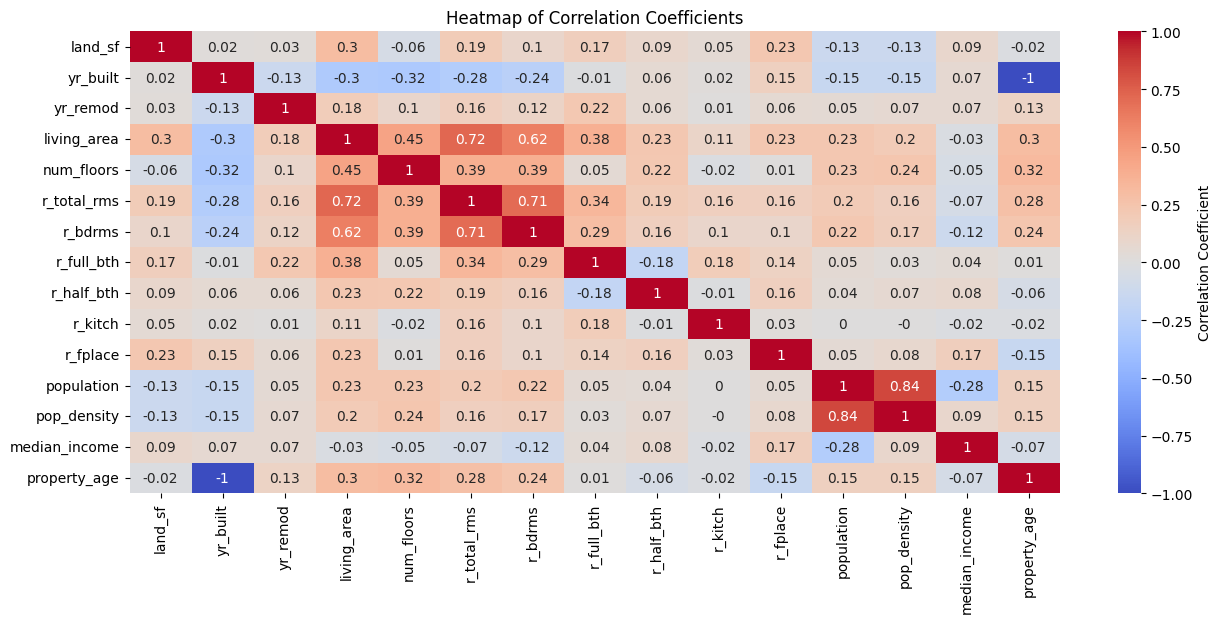

In [60]:
correlation_matrix_boston = boston_subset_numeric_features.corr()
correlation_matrix_boston = correlation_matrix_boston.round(2)

plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix_boston, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws = {'label': 'Correlation Coefficient'})
plt.title('Heatmap of Correlation Coefficients')
plt.show()

In [61]:
boston_subset[['living_area', 'r_total_rms', 'median_income', 'land_sf' , 'r_bdrms', 'num_floors', 'yr_remod', 'r_half_bth', 'pop_density', 'zipcode']].corr()

living_area  r_total_rms  median_income  land_sf  r_bdrms  \
living_area           1.00         0.72          -0.03     0.30     0.62   
r_total_rms           0.72         1.00          -0.07     0.19     0.71   
median_income        -0.03        -0.07           1.00     0.09    -0.12   
land_sf               0.30         0.19           0.09     1.00     0.10   
r_bdrms               0.62         0.71          -0.12     0.10     1.00   
num_floors            0.45         0.39          -0.05    -0.06     0.39   
yr_remod              0.18         0.16           0.07     0.03     0.12   
r_half_bth            0.23         0.19           0.08     0.09     0.16   
pop_density           0.20         0.16           0.09    -0.13     0.17   
zipcode              -0.23        -0.20           0.32     0.18    -0.23   

               num_floors  yr_remod  r_half_bth  pop_density  zipcode  
living_area          0.45      0.18        0.23         0.20    -0.23  
r_total_rms          0.39      0.16        0.19         0.16    -0.20  
median_income       -0.05      0.07        0.08         0.09     0.32  
land_sf             -0.06      0.03        0.09        -0.13     0.18  
r_bdrms              0.39      0.12        0.16         0.17    -0.23  
num_floors           1.00      0.10        0.22         0.24    -0.28  
yr_remod             0.10      1.00        0.06         0.07    -0.06  
r_half_bth           0.22      0.06        1.00         0.07    -0.03  
pop_density          0.24      0.07        0.07         1.00    -0.85  
zipcode             -0.28     -0.06       -0.03        -0.85     1.00

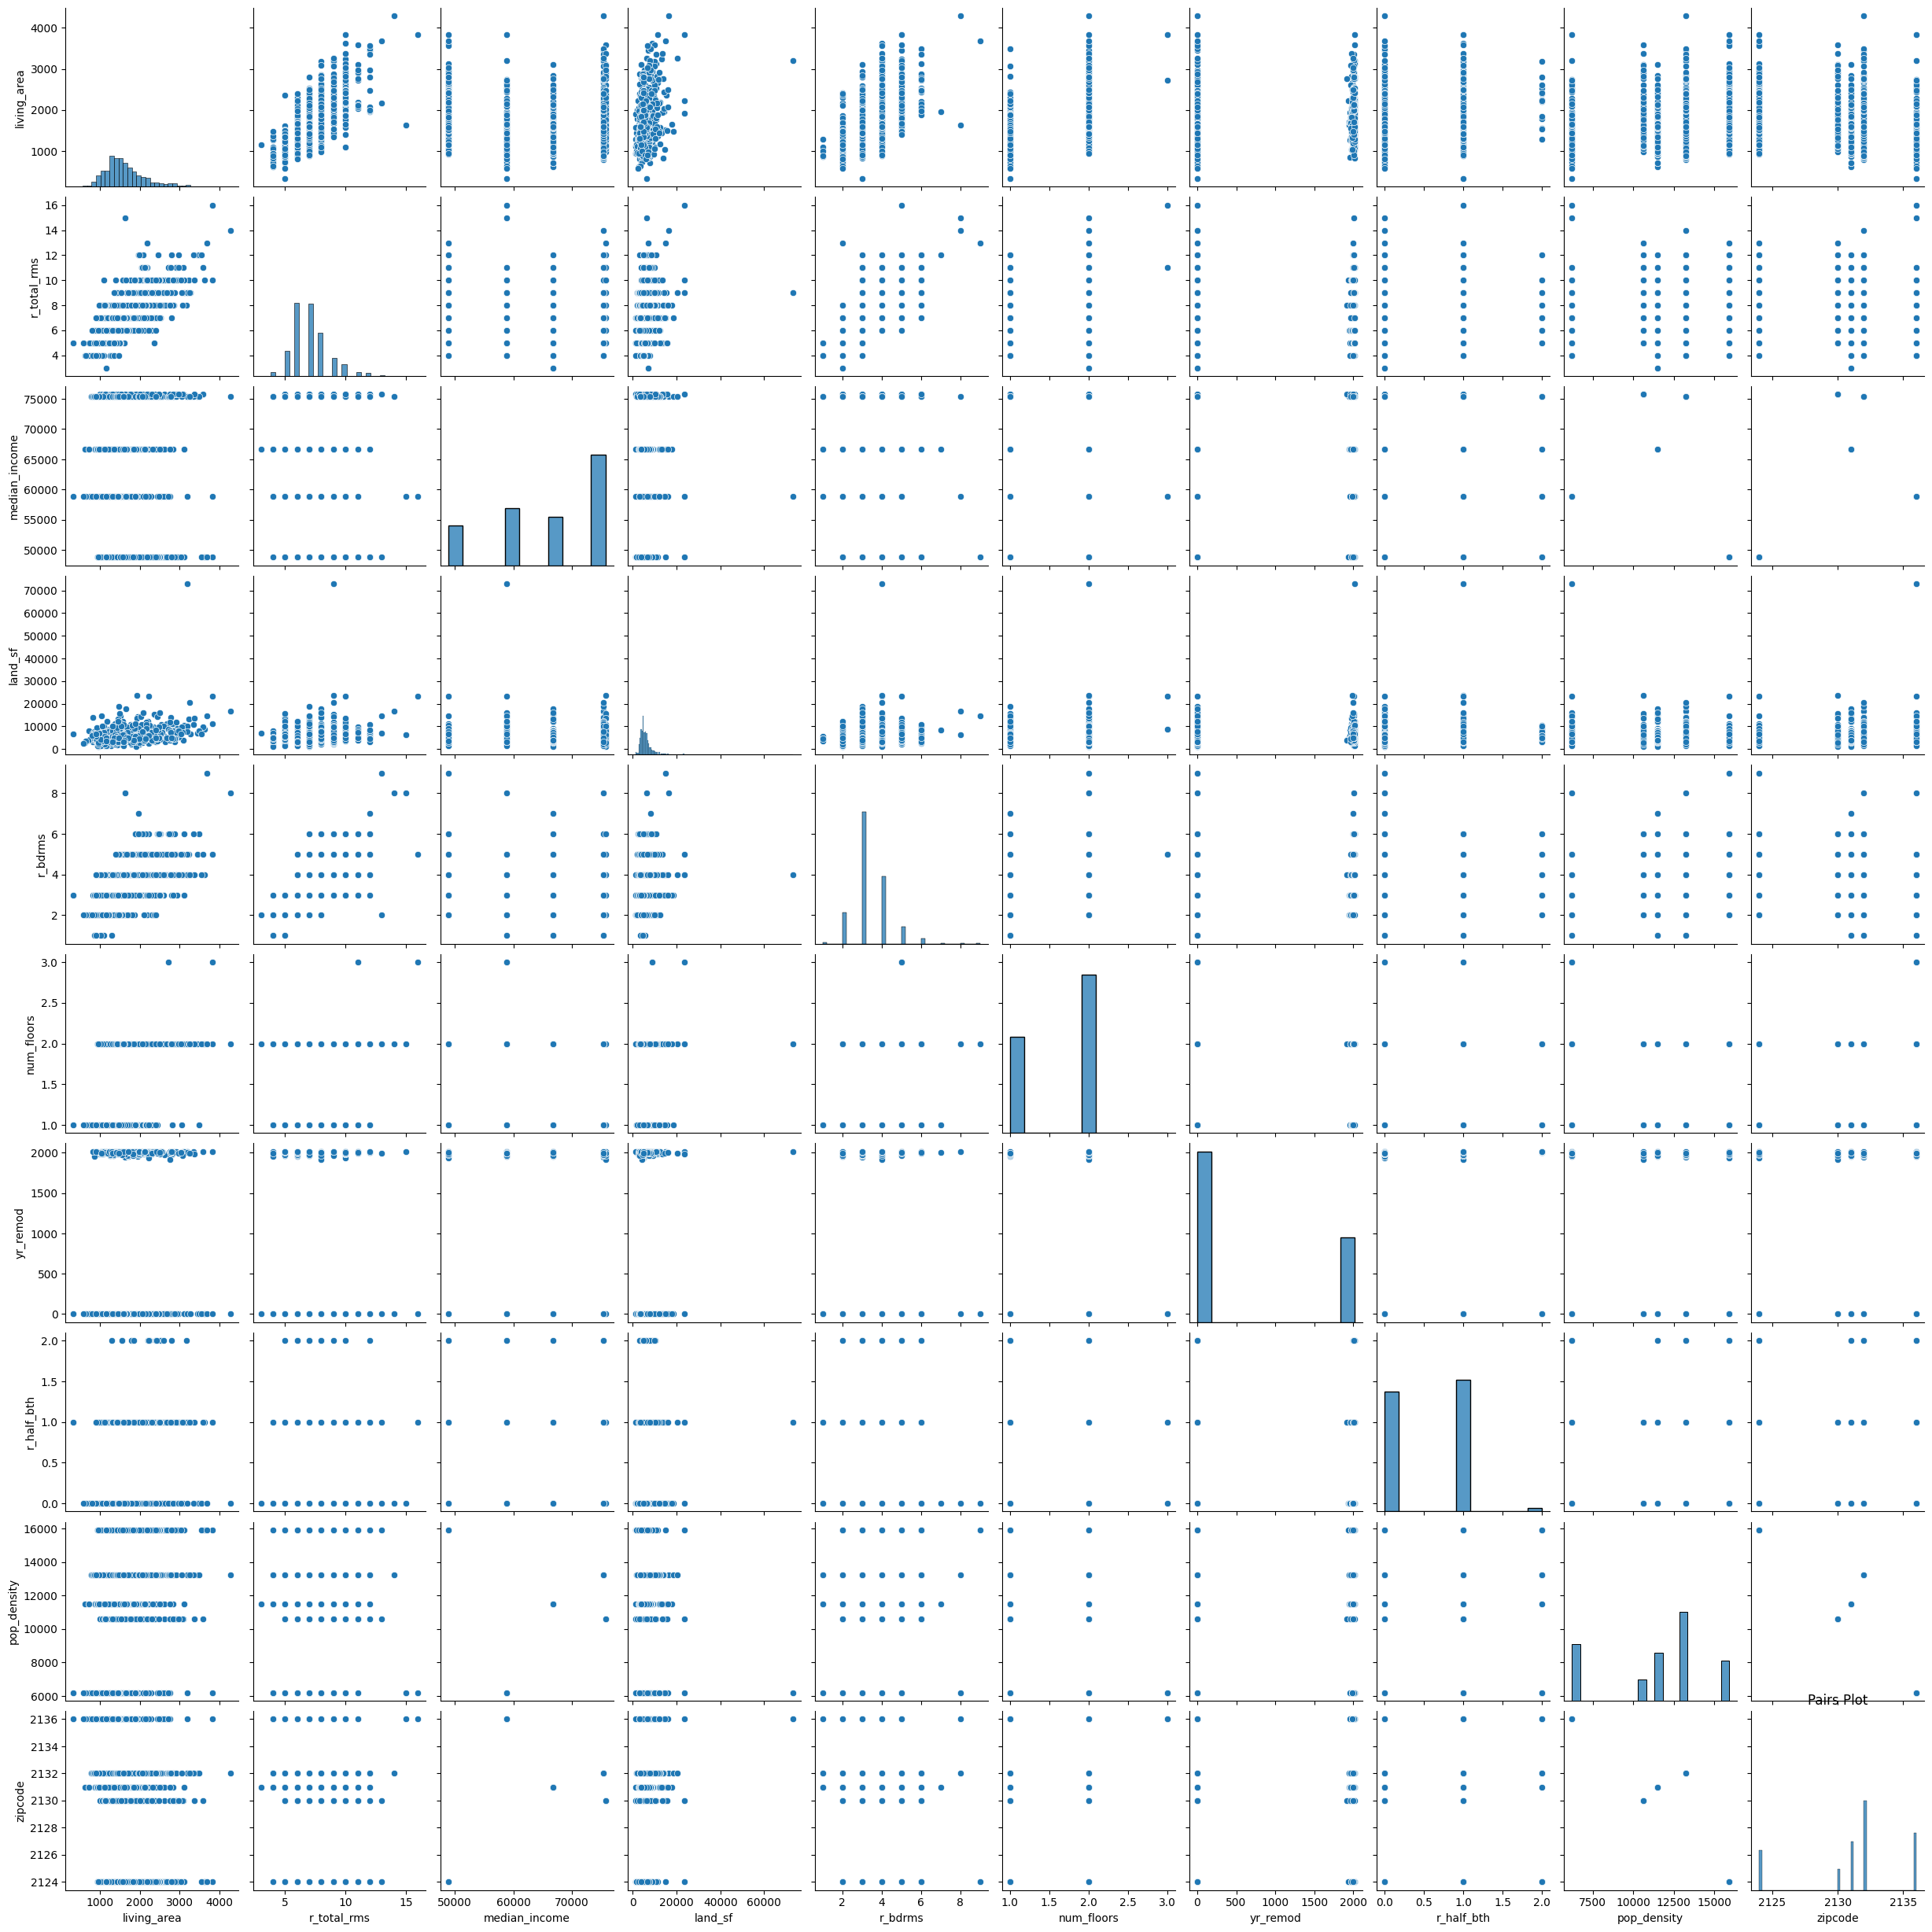

In [62]:
# Pairs plots
sns.pairplot(boston_subset[['living_area', 'r_total_rms', 'median_income', 'land_sf' , 'r_bdrms', 'num_floors', 'yr_remod', 'r_half_bth', 'pop_density', 'zipcode']].sample(1000))
plt.title('Pairs Plot')
plt.show()

## 5. **Outlier Detection and Treatment**

- **Statistical Methods**: Use methods like Z-score or IQR to identify outliers

- **Visual Methods**: Boxplots, scatterplots

- **Treatment**: Decide whether to remove, cap/floor, or transform outliers.

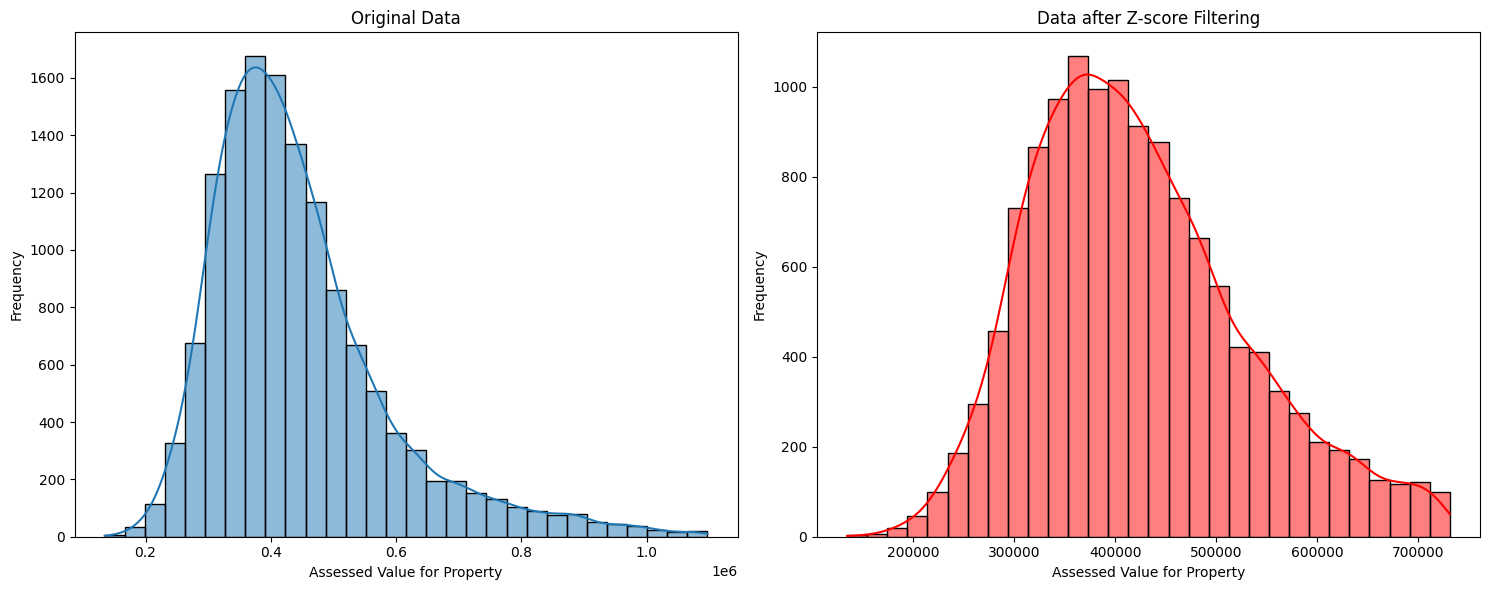

In [63]:
from scipy.stats import zscore
# Calculate Z-scores
z_scores = zscore(boston_subset['av_total'])
# Get boolean array indicating the presence of outliers
# Here, we consider data points with Z-scores > 2 or < -2 as outliers
outliers = np.where((z_scores > 2) | (z_scores < -2))
# Filter out the outliers
filtered_data = boston_subset[~(z_scores > 2) | (z_scores < -2)]
# Plotting original data and filtered data
plt.figure(figsize=(15, 6))
# Original Data
plt.subplot(1, 2, 1)
sns.histplot(boston_subset['av_total'], kde=True, bins=30)
plt.title('Original Data')
plt.xlabel('Assessed Value for Property')
plt.ylabel('Frequency')
# Filtered Data
plt.subplot(1, 2, 2)
sns.histplot(filtered_data['av_total'], kde=True, bins=30, color='r')
plt.title('Data after Z-score Filtering')
plt.xlabel('Assessed Value for Property')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [64]:
#
print(boston_subset['av_total'].describe())

price_filter = (boston_subset['av_total'] < 1097100) & (boston_subset['av_total'] > 134800) # max and min
boston_filtered = boston_subset[price_filter]
print(boston_filtered['av_total'].describe())

count     13712.00
mean     445391.52
std      143005.13
min      134800.00
25%      348184.92
50%      415400.00
75%      503502.88
max     1097100.00
Name: av_total, dtype: float64
count     13710.00
mean     445366.64
std      142882.58
min      136100.00
25%      348200.00
50%      415400.00
75%      503500.00
max     1095200.00
Name: av_total, dtype: float64


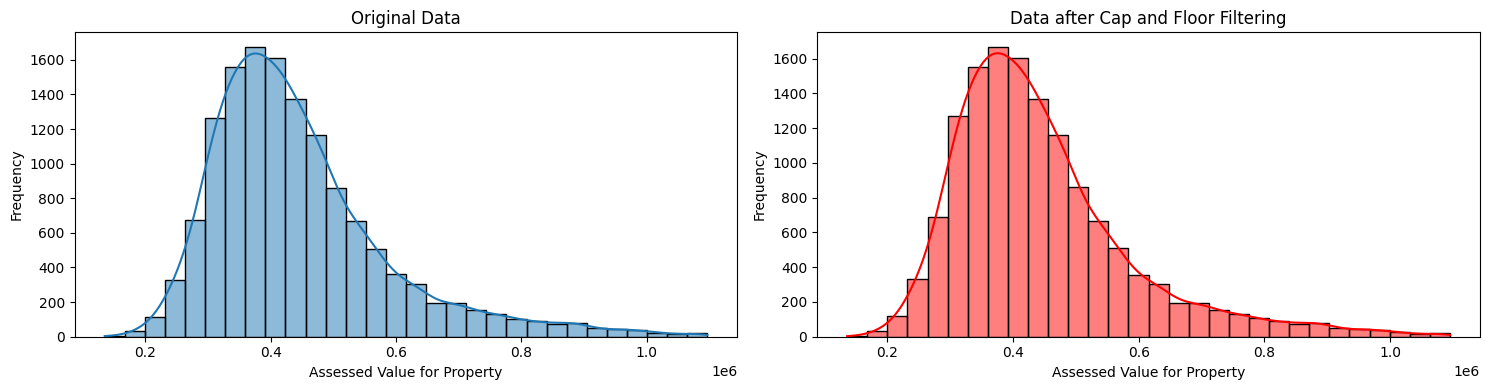

In [65]:
# Original Data
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.histplot(boston_subset['av_total'], kde=True, bins=30)
plt.title('Original Data')
plt.xlabel('Assessed Value for Property')
plt.ylabel('Frequency')
# Filtered Data
plt.subplot(1, 2, 2)
sns.histplot(boston_filtered['av_total'], kde=True, bins=30, color='r')
plt.title('Data after Cap and Floor Filtering')
plt.xlabel('Assessed Value for Property')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## **Let's now compile all our analysis and findings for the Appendix**

---

- Null Analysis - what variables contain nulls and how you propose to address the null values

- Categorical Analysis - what categorical variables are intersting and likely important

- Numeric Analysis, descriptive analytics and histograms, how do you plan to handle nulls?

- Categorical to Numeric Analysis
 - What categorical variables combined with av_total are likely to be useful and why?

 - Your client believe that owner-occupied homes have a higher assessed value than homes built in the 1990s, and homes that have been recently remodeled tend to have a higher home value. Make sure your analysis tests those beliefs using appropriate visuals.

- Numeric relationships
 - Scatter plots between correlated variables

 - Correlation Matrix

- Model Performance
 - Calculate RSQ, RMSE, MSE for both models

 - Compare and justify the best model

- Top and bottom 10 record predictions


In [66]:
# We have 33 columns, 14255 rows, 4 floats, 14 integers, and 15 objects
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225 entries, 0 to 14224
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              14225 non-null  int64  
 1   zipcode          14225 non-null  int64  
 2   own_occ          14225 non-null  object 
 3   land_sf          14221 non-null  float64
 4   yr_built         14225 non-null  int64  
 5   yr_remod         13714 non-null  float64
 6   living_area      14225 non-null  int64  
 7   num_floors       14225 non-null  float64
 8   structure_class  14225 non-null  object 
 9   r_bldg_styl      14225 non-null  object 
 10  r_roof_typ       14225 non-null  object 
 11  r_ext_fin        14225 non-null  object 
 12  r_total_rms      14225 non-null  int64  
 13  r_bdrms          14225 non-null  int64  
 14  r_full_bth       14225 non-null  int64  
 15  r_half_bth       14225 non-null  int64  
 16  r_bth_style      14225 non-null  object 
 17  r_kitch     

In [67]:
boston.isnull().sum() # 511 nulls for yr_remod and 4 nulls for land_sf

pid                  0
zipcode              0
own_occ              0
land_sf              4
yr_built             0
yr_remod           511
living_area          0
num_floors           0
structure_class      0
r_bldg_styl          0
r_roof_typ           0
r_ext_fin            0
r_total_rms          0
r_bdrms              0
r_full_bth           0
r_half_bth           0
r_bth_style          0
r_kitch              0
r_kitch_style        0
r_heat_typ           0
r_ac                 0
r_fplace             0
r_ext_cnd            0
r_ovrall_cnd         0
r_int_cnd            0
r_int_fin            0
r_view               0
zip                  0
population           0
pop_density          0
median_income        0
city_state           0
av_total             0
dtype: int64

In [68]:
# Let's take a look at year remodeled null values to see what possibly happened
nulls_yr_remodeled = boston.loc[boston['yr_remod'].isnull()]
nulls_yr_remodeled

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
32        330     2136       Y  5958.00      2005       NaN         2790   
61        620     2132       Y  6022.00      1999       NaN         1680   
64        650     2124       N  3948.00      2002       NaN         1606   
113      1140     2136       Y  9309.00      2001       NaN         2052   
199      2000     2131       Y  5000.00      2007       NaN         1986   
...       ...      ...     ...      ...       ...       ...          ...   
13982  139830     2132       Y  4851.00      2000       NaN         1666   
14007  140080     2136       Y  6000.00      2004       NaN         2056   
14166  141670     2132       N  6500.00      1996       NaN         2048   
14167  141680     2132       Y  4317.00      1938       NaN         1479   
14177  141780     2136       Y  5402.00      1999       NaN         1470   

       num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
32           2.00               R          CL  ...            G         G   
61           2.00               R          CL  ...            G         G   
64           2.00               R          SD  ...            G         G   
113          1.00               R          CL  ...            G         G   
199          2.00               R          CL  ...            G         G   
...           ...             ...         ...  ...          ...       ...   
13982        2.00               R          CL  ...            G         G   
14007        2.00               R          CL  ...            G         G   
14166        1.00               R          RR  ...            A         G   
14167        1.50               R          CP  ...            A         A   
14177        2.00               R          CL  ...            G         G   

       r_int_fin  r_view   zip  population pop_density  median_income  \
32             N       A  2136       28488        6207          58890   
61             N       A  2132       36314       13251          75446   
64             N       A  2124       47783       15913          48841   
113            N       A  2136       28488        6207          58890   
199            N       A  2131       29826       11505          66735   
...          ...     ...   ...         ...         ...            ...   
13982          N       A  2132       36314       13251          75446   
14007          N       A  2136       28488        6207          58890   
14166          N       A  2132       36314       13251          75446   
14167          N       A  2132       36314       13251          75446   
14177          N       F  2136       28488        6207          58890   

                  city_state  av_total  
32             Hyde Park, MA 577900.00  
61             Cambridge, MA 540089.79  
64     Dorchester Center, MA 403400.00  
113            Hyde Park, MA 562200.00  
199           Roslindale, MA 639100.00  
...                      ...       ...  
13982          Cambridge, MA 500400.00  
14007          Hyde Park, MA 553700.00  
14166          Cambridge, MA 509500.00  
14167          Cambridge, MA 423300.00  
14177          Hyde Park, MA 430800.00  

[511 rows x 33 columns]

In [69]:
# Let's take a look at year built since year built and year remodeled are related
nulls_yr_remodeled['yr_built'].nunique # We have 32 unique values for years for year built.

<bound method IndexOpsMixin.nunique of 32       2005
61       1999
64       2002
113      2001
199      2007
         ... 
13982    2000
14007    2004
14166    1996
14167    1938
14177    1999
Name: yr_built, Length: 511, dtype: int64>

In [70]:
nulls_yr_remodeled['yr_built'].describe() # We see that 1980 was the average year of the years built

count    511.00
mean    1980.22
std       39.35
min     1830.00
25%     1958.00
50%     2001.00
75%     2005.00
max     2016.00
Name: yr_built, dtype: float64

In [71]:
# Let's take a look at the other nulls we have, which are under the column land_sf
nulls_land_sf = boston.loc[boston['land_sf'].isnull()]
nulls_land_sf

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
692    6930     2131       Y      NaN      2004       NaN         1904   
1908  19090     2132       N      NaN      1993       NaN         2244   
2196  21970     2132       N      NaN      1990      0.00         1484   
9544  95450     2131       Y      NaN      1920   2001.00         1656   

      num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
692         2.00               R          CL  ...            G         G   
1908        2.00               R          CL  ...            A         G   
2196        2.00               R          CL  ...            G         G   
9544        2.00               R          CL  ...            A         A   

      r_int_fin  r_view   zip  population pop_density  median_income  \
692           N       A  2131       29826       11505          66735   
1908          N       A  2132       36314       13251          75446   
2196          N       A  2132       36314       13251          75446   
9544          N       A  2131       29826       11505          66735   

          city_state  av_total  
692   Roslindale, MA 519463.88  
1908   Cambridge, MA 419628.22  
2196   Cambridge, MA 379697.33  
9544  Roslindale, MA 403187.25  

[4 rows x 33 columns]

In [72]:
# Instead of dropping nulls for the sake of analysis, we will rather create a subset of the boston data that filters out the nulls.
# We would rather not drop the nulls because we don't want to cause issues for regression
boston_subset = boston.dropna(axis = 0, subset=['yr_remod', 'land_sf'])
boston_subset

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
0          10     2136       Y 10288.00      1992      0.00         1681   
1          20     2132       Y 10148.00      1900   2016.00         3024   
2          30     2132       Y  8512.00      1920      0.00         1160   
3          40     2124       Y  3187.00      1900   2001.00         1868   
4          50     2136       Y 10088.00      1971   1975.00         1534   
...       ...      ...     ...      ...       ...       ...          ...   
14220  142210     2124       Y  3717.00      1925   1995.00         1703   
14221  142220     2132       Y  3895.00      1920   2004.00         1350   
14222  142230     2132       Y  4700.00      1928      0.00         1490   
14223  142240     2124       Y  5250.00      1925      0.00         1404   
14224  142250     2136       Y  5000.00      1945      0.00         1157   

       num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
0            1.00               R          RR  ...            A         A   
1            2.50               R          CL  ...            G         G   
2            2.00               R          CL  ...            A         A   
3            2.00               R          CL  ...            G         A   
4            1.00               R          RR  ...            A         A   
...           ...             ...         ...  ...          ...       ...   
14220        2.00               R          CL  ...            A         A   
14221        2.00               R          CL  ...            A         G   
14222        2.00               R          CL  ...            A         G   
14223        2.00               R          CL  ...            A         A   
14224        1.50               R          CP  ...            A         A   

       r_int_fin  r_view   zip  population pop_density  median_income  \
0              N       A  2136       28488        6207          58890   
1              N       G  2132       36314       13251          75446   
2              N       A  2132       36314       13251          75446   
3              N       F  2124       47783       15913          48841   
4              N       G  2136       28488        6207          58890   
...          ...     ...   ...         ...         ...            ...   
14220          N       A  2124       47783       15913          48841   
14221          N       A  2132       36314       13251          75446   
14222          N       A  2132       36314       13251          75446   
14223          N       A  2124       47783       15913          48841   
14224          N       A  2136       28488        6207          58890   

                  city_state  av_total  
0              Hyde Park, MA 321200.00  
1              Cambridge, MA 845475.93  
2              Cambridge, MA 401230.03  
3      Dorchester Center, MA 450500.00  
4              Hyde Park, MA 368094.74  
...                      ...       ...  
14220  Dorchester Center, MA 380800.00  
14221          Cambridge, MA 420100.00  
14222          Cambridge, MA 510200.00  
14223  Dorchester Center, MA 406400.00  
14224          Hyde Park, MA 294367.78  

[13712 rows x 33 columns]

In [73]:
boston_subset.isna().sum() # No nulls, so let's continue with our analysi

pid                0
zipcode            0
own_occ            0
land_sf            0
yr_built           0
yr_remod           0
living_area        0
num_floors         0
structure_class    0
r_bldg_styl        0
r_roof_typ         0
r_ext_fin          0
r_total_rms        0
r_bdrms            0
r_full_bth         0
r_half_bth         0
r_bth_style        0
r_kitch            0
r_kitch_style      0
r_heat_typ         0
r_ac               0
r_fplace           0
r_ext_cnd          0
r_ovrall_cnd       0
r_int_cnd          0
r_int_fin          0
r_view             0
zip                0
population         0
pop_density        0
median_income      0
city_state         0
av_total           0
dtype: int64

In [74]:
# Let's take a different approach and say what if we did not want to drop the nulls but rather replace them
boston = boston.fillna(0)
boston.isnull().sum()

pid                0
zipcode            0
own_occ            0
land_sf            0
yr_built           0
yr_remod           0
living_area        0
num_floors         0
structure_class    0
r_bldg_styl        0
r_roof_typ         0
r_ext_fin          0
r_total_rms        0
r_bdrms            0
r_full_bth         0
r_half_bth         0
r_bth_style        0
r_kitch            0
r_kitch_style      0
r_heat_typ         0
r_ac               0
r_fplace           0
r_ext_cnd          0
r_ovrall_cnd       0
r_int_cnd          0
r_int_fin          0
r_view             0
zip                0
population         0
pop_density        0
median_income      0
city_state         0
av_total           0
dtype: int64

### Transform and Clean Data

---

In [75]:
boston_subset['yr_remod'].value_counts() # There are 9,057 homes that were not remodeled

0.00       9057
2015.00     347
2016.00     259
2003.00     258
2002.00     217
           ... 
1949.00       1
1940.00       1
1948.00       1
1947.00       1
1951.00       1
Name: yr_remod, Length: 79, dtype: int64

In [76]:
# Create new column in our boston_subset data for yr_remod to determine whether a house has been remodeled. This helps with dealing with the 0's
def remod_yn(x):
  if x > 0:
    return "yes"
  else:
    return "no"
boston_subset["remod_ind"] = boston['yr_remod'].apply(remod_yn)
boston_subset["remod_ind"].value_counts()

no     9057
yes    4655
Name: remod_ind, dtype: int64

In [77]:
# fix datatypes
boston_subset['num_floors'] = boston_subset['num_floors'].astype(int)
boston_subset['yr_remod'] = boston_subset['yr_remod'].astype(int)

# transform
boston_subset['property_age'] = 2023 - boston_subset['yr_built']
boston_subset.head()

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  num_floors  \
0   10     2136       Y 10288.00      1992         0         1681           1   
1   20     2132       Y 10148.00      1900      2016         3024           2   
2   30     2132       Y  8512.00      1920         0         1160           2   
3   40     2124       Y  3187.00      1900      2001         1868           2   
4   50     2136       Y 10088.00      1971      1975         1534           1   

  structure_class r_bldg_styl  ... r_int_fin r_view   zip  population  \
0               R          RR  ...         N      A  2136       28488   
1               R          CL  ...         N      G  2132       36314   
2               R          CL  ...         N      A  2132       36314   
3               R          CL  ...         N      F  2124       47783   
4               R          RR  ...         N      G  2136       28488   

   pop_density  median_income             city_state  av_total remod_ind  \
0         6207          58890          Hyde Park, MA 321200.00        no   
1        13251          75446          Cambridge, MA 845475.93       yes   
2        13251          75446          Cambridge, MA 401230.03        no   
3        15913          48841  Dorchester Center, MA 450500.00       yes   
4         6207          58890          Hyde Park, MA 368094.74       yes   

  property_age  
0           31  
1          123  
2          103  
3          123  
4           52  

[5 rows x 35 columns]

In [78]:
# fix datatypes
boston_subset['num_floors'] = boston_subset['num_floors'].astype(int)
boston_subset['yr_remod'] = boston_subset['yr_remod'].astype(int)

# transform
boston_subset['property_age'] = 2023 - boston_subset['yr_built']
boston_subset.head()

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  num_floors  \
0   10     2136       Y 10288.00      1992         0         1681           1   
1   20     2132       Y 10148.00      1900      2016         3024           2   
2   30     2132       Y  8512.00      1920         0         1160           2   
3   40     2124       Y  3187.00      1900      2001         1868           2   
4   50     2136       Y 10088.00      1971      1975         1534           1   

  structure_class r_bldg_styl  ... r_int_fin r_view   zip  population  \
0               R          RR  ...         N      A  2136       28488   
1               R          CL  ...         N      G  2132       36314   
2               R          CL  ...         N      A  2132       36314   
3               R          CL  ...         N      F  2124       47783   
4               R          RR  ...         N      G  2136       28488   

   pop_density  median_income             city_state  av_total remod_ind  \
0         6207          58890          Hyde Park, MA 321200.00        no   
1        13251          75446          Cambridge, MA 845475.93       yes   
2        13251          75446          Cambridge, MA 401230.03        no   
3        15913          48841  Dorchester Center, MA 450500.00       yes   
4         6207          58890          Hyde Park, MA 368094.74       yes   

  property_age  
0           31  
1          123  
2          103  
3          123  
4           52  

[5 rows x 35 columns]

In [79]:
boston_subset.info() # We have no nulls left, and we have cleaned and transformed our data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13712 entries, 0 to 14224
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              13712 non-null  int64  
 1   zipcode          13712 non-null  int64  
 2   own_occ          13712 non-null  object 
 3   land_sf          13712 non-null  float64
 4   yr_built         13712 non-null  int64  
 5   yr_remod         13712 non-null  int64  
 6   living_area      13712 non-null  int64  
 7   num_floors       13712 non-null  int64  
 8   structure_class  13712 non-null  object 
 9   r_bldg_styl      13712 non-null  object 
 10  r_roof_typ       13712 non-null  object 
 11  r_ext_fin        13712 non-null  object 
 12  r_total_rms      13712 non-null  int64  
 13  r_bdrms          13712 non-null  int64  
 14  r_full_bth       13712 non-null  int64  
 15  r_half_bth       13712 non-null  int64  
 16  r_bth_style      13712 non-null  object 
 17  r_kitch     

In [80]:
boston['yr_remod'].value_counts() # We now have 9,057 homes that were not remodeled

0.00       9569
2015.00     347
2016.00     259
2003.00     258
2002.00     217
           ... 
1949.00       1
1940.00       1
1948.00       1
1947.00       1
1951.00       1
Name: yr_remod, Length: 79, dtype: int64

In [81]:
# Do the same process for the boston dataset
def remod_yn(x):
  if x > 0:
    return "yes"
  else:
    return "no"
boston["remod_ind"] = boston['yr_remod'].apply(remod_yn)
boston["remod_ind"].value_counts()

no     9569
yes    4656
Name: remod_ind, dtype: int64

In [82]:
# fix datatypes
boston['num_floors'] = boston['num_floors'].astype(int)
boston['yr_remod'] = boston['yr_remod'].astype(int)

# transform
boston['property_age'] = 2023 - boston['yr_built']
boston.head()

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  num_floors  \
0   10     2136       Y 10288.00      1992         0         1681           1   
1   20     2132       Y 10148.00      1900      2016         3024           2   
2   30     2132       Y  8512.00      1920         0         1160           2   
3   40     2124       Y  3187.00      1900      2001         1868           2   
4   50     2136       Y 10088.00      1971      1975         1534           1   

  structure_class r_bldg_styl  ... r_int_fin r_view   zip  population  \
0               R          RR  ...         N      A  2136       28488   
1               R          CL  ...         N      G  2132       36314   
2               R          CL  ...         N      A  2132       36314   
3               R          CL  ...         N      F  2124       47783   
4               R          RR  ...         N      G  2136       28488   

   pop_density  median_income             city_state  av_total remod_ind  \
0         6207          58890          Hyde Park, MA 321200.00        no   
1        13251          75446          Cambridge, MA 845475.93       yes   
2        13251          75446          Cambridge, MA 401230.03        no   
3        15913          48841  Dorchester Center, MA 450500.00       yes   
4         6207          58890          Hyde Park, MA 368094.74       yes   

  property_age  
0           31  
1          123  
2          103  
3          123  
4           52  

[5 rows x 35 columns]

In [83]:
boston.info() # We have no nulls left, and we have cleaned and transformed our data. Here we have 14,225 homes so let's see if the rest keeping all 14,225 homes makes a difference

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225 entries, 0 to 14224
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              14225 non-null  int64  
 1   zipcode          14225 non-null  int64  
 2   own_occ          14225 non-null  object 
 3   land_sf          14225 non-null  float64
 4   yr_built         14225 non-null  int64  
 5   yr_remod         14225 non-null  int64  
 6   living_area      14225 non-null  int64  
 7   num_floors       14225 non-null  int64  
 8   structure_class  14225 non-null  object 
 9   r_bldg_styl      14225 non-null  object 
 10  r_roof_typ       14225 non-null  object 
 11  r_ext_fin        14225 non-null  object 
 12  r_total_rms      14225 non-null  int64  
 13  r_bdrms          14225 non-null  int64  
 14  r_full_bth       14225 non-null  int64  
 15  r_half_bth       14225 non-null  int64  
 16  r_bth_style      14225 non-null  object 
 17  r_kitch     

## *The variables that contained nulls were yr_remod (511 nulls) and land_sf (4 nulls), so what we dedcided to do was create a subset of the boston data and call it "boston subset" where we practically drop all the nulls. We will call this method one for clarification in our appendix. The reason for dropping the nulls is that we can't perform our analysis accuractely if we have missing values. After that, we are left with 13,712 Boston Homes and ready to begin our analysis. Another approach, called Method 2, for handling nulls is to use fillna(0) for all the null values and replace those null values with 0's. This helps with keeping all the Boston Homes, which could be critical for our analysis in terms of selecting the model and telling a narrative of predicting Boston Home Prices. I put both methods in here as I am curious if there is a significant difference in the approaches for handling the nulls in our analysis.*

## **Model 1 Predictions Method 1**

- Here we are going to join our boston data with the model 1 prediction, join on the column "pid"

- We will then repeat the first step of EDA by taking a preview of the data, look at nulls, and info()

- We will then peform model analysis by calculating R-squared, Mean Squared Error, and Mean Absolute Error.

---

In [84]:
boston_pred1 = boston_subset.merge(pred1, on='pid')
boston_pred1.shape

(13712, 36)

In [85]:
boston_pred1['residual'] = boston_pred1['av_total'] - boston_pred1['pred'] # Residual = actual value - predicted value
boston_pred1 # Let's take a look at our dataframe

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
0          10     2136       Y 10288.00      1992         0         1681   
1          20     2132       Y 10148.00      1900      2016         3024   
2          30     2132       Y  8512.00      1920         0         1160   
3          40     2124       Y  3187.00      1900      2001         1868   
4          50     2136       Y 10088.00      1971      1975         1534   
...       ...      ...     ...      ...       ...       ...          ...   
13707  142210     2124       Y  3717.00      1925      1995         1703   
13708  142220     2132       Y  3895.00      1920      2004         1350   
13709  142230     2132       Y  4700.00      1928         0         1490   
13710  142240     2124       Y  5250.00      1925         0         1404   
13711  142250     2136       Y  5000.00      1945         0         1157   

       num_floors structure_class r_bldg_styl  ...   zip population  \
0               1               R          RR  ...  2136      28488   
1               2               R          CL  ...  2132      36314   
2               2               R          CL  ...  2132      36314   
3               2               R          CL  ...  2124      47783   
4               1               R          RR  ...  2136      28488   
...           ...             ...         ...  ...   ...        ...   
13707           2               R          CL  ...  2124      47783   
13708           2               R          CL  ...  2132      36314   
13709           2               R          CL  ...  2132      36314   
13710           2               R          CL  ...  2124      47783   
13711           1               R          CP  ...  2136      28488   

       pop_density  median_income             city_state  av_total remod_ind  \
0             6207          58890          Hyde Park, MA 321200.00        no   
1            13251          75446          Cambridge, MA 845475.93       yes   
2            13251          75446          Cambridge, MA 401230.03        no   
3            15913          48841  Dorchester Center, MA 450500.00       yes   
4             6207          58890          Hyde Park, MA 368094.74       yes   
...            ...            ...                    ...       ...       ...   
13707        15913          48841  Dorchester Center, MA 380800.00       yes   
13708        13251          75446          Cambridge, MA 420100.00       yes   
13709        13251          75446          Cambridge, MA 510200.00        no   
13710        15913          48841  Dorchester Center, MA 406400.00        no   
13711         6207          58890          Hyde Park, MA 294367.78        no   

       property_age      pred   residual  
0                31 492976.27 -171776.27  
1               123 696277.06  149198.88  
2               103 393368.85    7861.18  
3               123 458700.83   -8200.83  
4                52 467321.00  -99226.26  
...             ...       ...        ...  
13707            98 438671.98  -57871.98  
13708           103 384873.82   35226.18  
13709            95 413750.81   96449.19  
13710            98 404731.90    1668.10  
13711            78 365227.06  -70859.28  

[13712 rows x 37 columns]

In [86]:
# Let's check Model 1's performance
r2 = r2_score(boston_pred1['av_total'],boston_pred1['pred'] )
mse = mean_squared_error(boston_pred1['av_total'], boston_pred1['pred'])
mae = mean_absolute_error(boston_pred1['av_total'], boston_pred1['pred'])

print("-- Linear Regression Stats for Boston House Prices -- ")
print(f'R-Square: {r2:.3f}')
print(f" - RSQUARE: approximately {r2:.1%} of the variability in the sale prices can be explained by our model.")

print(f'Root Mean Squared Error: {mse**0.5:,.2f}')
print(f" - RMSE: on average, our predictions are approximately ${mse**0.5:,.2f} away from the actual sale price")
print(f'Mean Absolute Error: {mae:,.2f}')
print(f" - MAE:  on average, the predictions made by the model are off by +/- ${mae:,.2f} from the actual")

-- Linear Regression Stats for Boston House Prices -- 
R-Square: 0.437
 - RSQUARE: approximately 43.7% of the variability in the sale prices can be explained by our model.
Root Mean Squared Error: 107,324.52
 - RMSE: on average, our predictions are approximately $107,324.52 away from the actual sale price
Mean Absolute Error: 76,967.08
 - MAE:  on average, the predictions made by the model are off by +/- $76,967.08 from the actual


## **Model 1 Predictions Method 2**

- Here we are going to join our boston data with the model 1 prediction, join on the column "pid"

- We will then repeat the first step of EDA by taking a preview of the data, look at nulls, and info()

- We will then peform model analysis by calculating R-squared, Mean Squared Error, and Mean Absolute Error.

---

In [87]:
boston_predictions1 = boston.merge(pred1, on='pid')
boston_predictions1.shape

(14225, 36)

In [88]:
boston_predictions1.isnull().sum()

pid                0
zipcode            0
own_occ            0
land_sf            0
yr_built           0
yr_remod           0
living_area        0
num_floors         0
structure_class    0
r_bldg_styl        0
r_roof_typ         0
r_ext_fin          0
r_total_rms        0
r_bdrms            0
r_full_bth         0
r_half_bth         0
r_bth_style        0
r_kitch            0
r_kitch_style      0
r_heat_typ         0
r_ac               0
r_fplace           0
r_ext_cnd          0
r_ovrall_cnd       0
r_int_cnd          0
r_int_fin          0
r_view             0
zip                0
population         0
pop_density        0
median_income      0
city_state         0
av_total           0
remod_ind          0
property_age       0
pred               4
dtype: int64

In [89]:
boston_predictions1.fillna(0, inplace=True)

In [90]:
boston_predictions1.isnull().sum()

pid                0
zipcode            0
own_occ            0
land_sf            0
yr_built           0
yr_remod           0
living_area        0
num_floors         0
structure_class    0
r_bldg_styl        0
r_roof_typ         0
r_ext_fin          0
r_total_rms        0
r_bdrms            0
r_full_bth         0
r_half_bth         0
r_bth_style        0
r_kitch            0
r_kitch_style      0
r_heat_typ         0
r_ac               0
r_fplace           0
r_ext_cnd          0
r_ovrall_cnd       0
r_int_cnd          0
r_int_fin          0
r_view             0
zip                0
population         0
pop_density        0
median_income      0
city_state         0
av_total           0
remod_ind          0
property_age       0
pred               0
dtype: int64

In [91]:
boston_predictions1['residual'] = boston_predictions1['av_total'] - boston_predictions1['pred'] # Residual = actual value - predicted value
boston_predictions1 # Let's take a look at our dataframe

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
0          10     2136       Y 10288.00      1992         0         1681   
1          20     2132       Y 10148.00      1900      2016         3024   
2          30     2132       Y  8512.00      1920         0         1160   
3          40     2124       Y  3187.00      1900      2001         1868   
4          50     2136       Y 10088.00      1971      1975         1534   
...       ...      ...     ...      ...       ...       ...          ...   
14220  142210     2124       Y  3717.00      1925      1995         1703   
14221  142220     2132       Y  3895.00      1920      2004         1350   
14222  142230     2132       Y  4700.00      1928         0         1490   
14223  142240     2124       Y  5250.00      1925         0         1404   
14224  142250     2136       Y  5000.00      1945         0         1157   

       num_floors structure_class r_bldg_styl  ...   zip population  \
0               1               R          RR  ...  2136      28488   
1               2               R          CL  ...  2132      36314   
2               2               R          CL  ...  2132      36314   
3               2               R          CL  ...  2124      47783   
4               1               R          RR  ...  2136      28488   
...           ...             ...         ...  ...   ...        ...   
14220           2               R          CL  ...  2124      47783   
14221           2               R          CL  ...  2132      36314   
14222           2               R          CL  ...  2132      36314   
14223           2               R          CL  ...  2124      47783   
14224           1               R          CP  ...  2136      28488   

       pop_density  median_income             city_state  av_total remod_ind  \
0             6207          58890          Hyde Park, MA 321200.00        no   
1            13251          75446          Cambridge, MA 845475.93       yes   
2            13251          75446          Cambridge, MA 401230.03        no   
3            15913          48841  Dorchester Center, MA 450500.00       yes   
4             6207          58890          Hyde Park, MA 368094.74       yes   
...            ...            ...                    ...       ...       ...   
14220        15913          48841  Dorchester Center, MA 380800.00       yes   
14221        13251          75446          Cambridge, MA 420100.00       yes   
14222        13251          75446          Cambridge, MA 510200.00        no   
14223        15913          48841  Dorchester Center, MA 406400.00        no   
14224         6207          58890          Hyde Park, MA 294367.78        no   

       property_age      pred   residual  
0                31 492976.27 -171776.27  
1               123 696277.06  149198.88  
2               103 393368.85    7861.18  
3               123 458700.83   -8200.83  
4                52 467321.00  -99226.26  
...             ...       ...        ...  
14220            98 438671.98  -57871.98  
14221           103 384873.82   35226.18  
14222            95 413750.81   96449.19  
14223            98 404731.90    1668.10  
14224            78 365227.06  -70859.28  

[14225 rows x 37 columns]

In [92]:
# Let's check Model 1's performance
r2 = r2_score(boston_predictions1['av_total'],boston_predictions1['pred'] )
mse = mean_squared_error(boston_predictions1['av_total'], boston_predictions1['pred'])
mae = mean_absolute_error(boston_predictions1['av_total'], boston_predictions1['pred'])

print("-- Linear Regression Stats for Boston House Prices -- ")
print(f'R-Square: {r2:.3f}')
print(f" - RSQUARE: approximately {r2:.1%} of the variability in the sale prices can be explained by our model.")

print(f'Root Mean Squared Error: {mse**0.5:,.2f}')
print(f" - RMSE: on average, our predictions are approximately ${mse**0.5:,.2f} away from the actual sale price")
print(f'Mean Absolute Error: {mae:,.2f}')
print(f" - MAE:  on average, the predictions made by the model are off by +/- ${mae:,.2f} from the actual")

-- Linear Regression Stats for Boston House Prices -- 
R-Square: 0.436
 - RSQUARE: approximately 43.6% of the variability in the sale prices can be explained by our model.
Root Mean Squared Error: 108,148.17
 - RMSE: on average, our predictions are approximately $108,148.17 away from the actual sale price
Mean Absolute Error: 77,629.65
 - MAE:  on average, the predictions made by the model are off by +/- $77,629.65 from the actual


## *-- Linear Regression Stats for Boston House Prices --*
- R-Square: 0.437 for Method 1
- R-Square: 0.436 for Method 2

**It seems there is not a huge difference between the methods in handling nulls for our analysis**

## **Model 2 Predictions Method 1**

- Here we are going to join our boston data with the model 1 prediction, join on the column "pid"

- We will then repeat the first step of EDA by taking a preview of the data, look at nulls, and info()

- We will then peform model analysis by calculating R-squared, Mean Squared Error, and Mean Absolute Error.

---

In [93]:
boston_pred2 = boston_subset.merge(pred2, on='pid')
boston_pred2.shape

(13712, 36)

In [94]:
boston_pred2['residual'] = boston_pred2['av_total'] - boston_pred2['pred'] # Residual = actual value - predicted value
boston_pred2 # Let's take a look at our dataframe

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
0          10     2136       Y 10288.00      1992         0         1681   
1          20     2132       Y 10148.00      1900      2016         3024   
2          30     2132       Y  8512.00      1920         0         1160   
3          40     2124       Y  3187.00      1900      2001         1868   
4          50     2136       Y 10088.00      1971      1975         1534   
...       ...      ...     ...      ...       ...       ...          ...   
13707  142210     2124       Y  3717.00      1925      1995         1703   
13708  142220     2132       Y  3895.00      1920      2004         1350   
13709  142230     2132       Y  4700.00      1928         0         1490   
13710  142240     2124       Y  5250.00      1925         0         1404   
13711  142250     2136       Y  5000.00      1945         0         1157   

       num_floors structure_class r_bldg_styl  ...   zip population  \
0               1               R          RR  ...  2136      28488   
1               2               R          CL  ...  2132      36314   
2               2               R          CL  ...  2132      36314   
3               2               R          CL  ...  2124      47783   
4               1               R          RR  ...  2136      28488   
...           ...             ...         ...  ...   ...        ...   
13707           2               R          CL  ...  2124      47783   
13708           2               R          CL  ...  2132      36314   
13709           2               R          CL  ...  2132      36314   
13710           2               R          CL  ...  2124      47783   
13711           1               R          CP  ...  2136      28488   

       pop_density  median_income             city_state  av_total remod_ind  \
0             6207          58890          Hyde Park, MA 321200.00        no   
1            13251          75446          Cambridge, MA 845475.93       yes   
2            13251          75446          Cambridge, MA 401230.03        no   
3            15913          48841  Dorchester Center, MA 450500.00       yes   
4             6207          58890          Hyde Park, MA 368094.74       yes   
...            ...            ...                    ...       ...       ...   
13707        15913          48841  Dorchester Center, MA 380800.00       yes   
13708        13251          75446          Cambridge, MA 420100.00       yes   
13709        13251          75446          Cambridge, MA 510200.00        no   
13710        15913          48841  Dorchester Center, MA 406400.00        no   
13711         6207          58890          Hyde Park, MA 294367.78        no   

       property_age      pred  residual  
0                31 318559.38   2640.62  
1               123 828821.62  16654.31  
2               103 411252.31 -10022.28  
3               123 432201.19  18298.81  
4                52 366862.25   1232.49  
...             ...       ...       ...  
13707            98 372626.22   8173.78  
13708           103 438348.81 -18248.81  
13709            95 483708.53  26491.47  
13710            98 383820.88  22579.12  
13711            78 296780.12  -2412.34  

[13712 rows x 37 columns]

In [95]:
# Let's check Model 2's performance
r2 = r2_score(boston_pred2['av_total'],boston_pred2['pred'] )
mse = mean_squared_error(boston_pred2['av_total'], boston_pred2['pred'])
mae = mean_absolute_error(boston_pred2['av_total'], boston_pred2['pred'])

print("-- Linear Regression Stats for Boston House Prices -- ")
print(f'R-Square: {r2:.3f}')
print(f" - RSQUARE: approximately {r2:.1%} of the variability in the sale prices can be explained by our model.")

print(f'Root Mean Squared Error: {mse**0.5:,.2f}')
print(f" - RMSE: on average, our predictions are approximately ${mse**0.5:,.2f} away from the actual sale price")
print(f'Mean Absolute Error: {mae:,.2f}')
print(f" - MAE:  on average, the predictions made by the model are off by +/- ${mae:,.2f} from the actual")

-- Linear Regression Stats for Boston House Prices -- 
R-Square: 0.947
 - RSQUARE: approximately 94.7% of the variability in the sale prices can be explained by our model.
Root Mean Squared Error: 32,857.75
 - RMSE: on average, our predictions are approximately $32,857.75 away from the actual sale price
Mean Absolute Error: 23,451.97
 - MAE:  on average, the predictions made by the model are off by +/- $23,451.97 from the actual


## **Model 2 Predictions Method 2**

- Here we are going to join our boston data with the model 1 prediction, join on the column "pid"

- We will then repeat the first step of EDA by taking a preview of the data, look at nulls, and info()

- We will then peform model analysis by calculating R-squared, Mean Squared Error, and Mean Absolute Error.

---

In [96]:
boston_predictions2 = boston.merge(pred2, on='pid')
boston_predictions2.shape

(14225, 36)

In [97]:
boston_predictions2.isnull().sum() # No nulls

pid                0
zipcode            0
own_occ            0
land_sf            0
yr_built           0
yr_remod           0
living_area        0
num_floors         0
structure_class    0
r_bldg_styl        0
r_roof_typ         0
r_ext_fin          0
r_total_rms        0
r_bdrms            0
r_full_bth         0
r_half_bth         0
r_bth_style        0
r_kitch            0
r_kitch_style      0
r_heat_typ         0
r_ac               0
r_fplace           0
r_ext_cnd          0
r_ovrall_cnd       0
r_int_cnd          0
r_int_fin          0
r_view             0
zip                0
population         0
pop_density        0
median_income      0
city_state         0
av_total           0
remod_ind          0
property_age       0
pred               0
dtype: int64

In [98]:
boston_predictions2['residual'] = boston_predictions2['av_total'] - boston_predictions2['pred'] # Residual = actual value - predicted value
boston_predictions2 # Let's take a look at our dataframe

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
0          10     2136       Y 10288.00      1992         0         1681   
1          20     2132       Y 10148.00      1900      2016         3024   
2          30     2132       Y  8512.00      1920         0         1160   
3          40     2124       Y  3187.00      1900      2001         1868   
4          50     2136       Y 10088.00      1971      1975         1534   
...       ...      ...     ...      ...       ...       ...          ...   
14220  142210     2124       Y  3717.00      1925      1995         1703   
14221  142220     2132       Y  3895.00      1920      2004         1350   
14222  142230     2132       Y  4700.00      1928         0         1490   
14223  142240     2124       Y  5250.00      1925         0         1404   
14224  142250     2136       Y  5000.00      1945         0         1157   

       num_floors structure_class r_bldg_styl  ...   zip population  \
0               1               R          RR  ...  2136      28488   
1               2               R          CL  ...  2132      36314   
2               2               R          CL  ...  2132      36314   
3               2               R          CL  ...  2124      47783   
4               1               R          RR  ...  2136      28488   
...           ...             ...         ...  ...   ...        ...   
14220           2               R          CL  ...  2124      47783   
14221           2               R          CL  ...  2132      36314   
14222           2               R          CL  ...  2132      36314   
14223           2               R          CL  ...  2124      47783   
14224           1               R          CP  ...  2136      28488   

       pop_density  median_income             city_state  av_total remod_ind  \
0             6207          58890          Hyde Park, MA 321200.00        no   
1            13251          75446          Cambridge, MA 845475.93       yes   
2            13251          75446          Cambridge, MA 401230.03        no   
3            15913          48841  Dorchester Center, MA 450500.00       yes   
4             6207          58890          Hyde Park, MA 368094.74       yes   
...            ...            ...                    ...       ...       ...   
14220        15913          48841  Dorchester Center, MA 380800.00       yes   
14221        13251          75446          Cambridge, MA 420100.00       yes   
14222        13251          75446          Cambridge, MA 510200.00        no   
14223        15913          48841  Dorchester Center, MA 406400.00        no   
14224         6207          58890          Hyde Park, MA 294367.78        no   

       property_age      pred  residual  
0                31 318559.38   2640.62  
1               123 828821.62  16654.31  
2               103 411252.31 -10022.28  
3               123 432201.19  18298.81  
4                52 366862.25   1232.49  
...             ...       ...       ...  
14220            98 372626.22   8173.78  
14221           103 438348.81 -18248.81  
14222            95 483708.53  26491.47  
14223            98 383820.88  22579.12  
14224            78 296780.12  -2412.34  

[14225 rows x 37 columns]

In [99]:
# Let's check Model 2's performance
r2 = r2_score(boston_predictions2['av_total'], boston_predictions2['pred'] )
mse = mean_squared_error(boston_predictions2['av_total'], boston_predictions2['pred'])
mae = mean_absolute_error(boston_predictions2['av_total'], boston_predictions2['pred'])

print("-- Linear Regression Stats for Boston House Prices -- ")
print(f'R-Square: {r2:.3f}')
print(f" - RSQUARE: approximately {r2:.1%} of the variability in the sale prices can be explained by our model.")

print(f'Root Mean Squared Error: {mse**0.5:,.2f}')
print(f" - RMSE: on average, our predictions are approximately ${mse**0.5:,.2f} away from the actual sale price")
print(f'Mean Absolute Error: {mae:,.2f}')
print(f" - MAE:  on average, the predictions made by the model are off by +/- ${mae:,.2f} from the actual")

-- Linear Regression Stats for Boston House Prices -- 
R-Square: 0.948
 - RSQUARE: approximately 94.8% of the variability in the sale prices can be explained by our model.
Root Mean Squared Error: 32,918.10
 - RMSE: on average, our predictions are approximately $32,918.10 away from the actual sale price
Mean Absolute Error: 23,491.86
 - MAE:  on average, the predictions made by the model are off by +/- $23,491.86 from the actual


## *-- Linear Regression Stats for Boston House Prices --*
- R-Square: 0.947 for Method 1
- R-Square: 0.948 for Method 2

Again, it seems there is not a huge difference between the methods in handling nulls for our analysis. We might suggest that keeping all the method 2 for handling nulls gives us a slightly more accurate results as the R-Squared values turn out to be higher by 0.01 percentage points, but the only downside is that the 0's that represent the nulls for our yr_remod and land_sf could cause some skew issues. In conclusion, we will say that either approach is fine and both will reach the same results but for simplicity we will go with the Method 1 (the subset) and work with correctly filled out data.


Also, we can highlight the diffrences in performance between the Models by going over simple statistics. In statistics for models, having a higher R-squared is great and having low error is also great. Model 2 has a higher R-squared than Model 1 and a lower error than Model 1. Model 2's Root Mean Squared Error is 32,918.10 and has Mean Absolute Erorr of 23,491.86, which explains on average how much the predictions are off from the actual assessesed value for the property. While, Model 1 has Root Mean Squared Error of 107,324.52 and Mean Absolute Error of 76,967.08. The Root Mean Squared Difference is $-74,406.42$ (Model 2 MSE - Model 1 MSE) and Absolute Mean Difference is $-53,475.22$ (Model 2 MAE - Model 1 MAE), so this serves as greater evidence in why we chose Model 2 to be the better and more accurate Model.

## **Let's take a look at Overestimates, Underestimates, Best Prediction**

- An overestimate is when the error is small, we will use nsmallest()

- An underestimate is when the error is big, we will use nlargest()

- Best prediction takes a look at the Mean Absolute Error which allows us to state on average how much the prediction made by model 2 is off by from the actual assessed value for the property


---

In [100]:
# Overestimate
boston_pred2.nsmallest(10, 'residual')

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
3739    38940     2130       Y  9000.00      1915         0         2594   
8897    92410     2131       Y  7280.00      1910      2007         2150   
11797  122470     2130       Y  5600.00      1900         0         2880   
6599    68540     2131       Y  5894.00      1908      1984         2043   
10243  106350     2130       N  6945.00      1890         0         2492   
12914  134090     2130       Y  5752.00      1910      2001         2067   
510      5320     2131       Y 10246.00      1890         0         2630   
10240  106320     2130       Y  2800.00      1945      1989         1572   
4196    43710     2124       Y  4923.00      1960      2004         1176   
7237    75190     2130       Y 12960.00      1910      2004         2709   

       num_floors structure_class r_bldg_styl  ...   zip population  \
3739            2               R          CL  ...  2130      35401   
8897            2               R          CL  ...  2131      29826   
11797           2               R          CL  ...  2130      35401   
6599            2               R          CL  ...  2131      29826   
10243           2               R          CL  ...  2130      35401   
12914           2               R          CL  ...  2130      35401   
510             2               R          CL  ...  2131      29826   
10240           2               R          CL  ...  2130      35401   
4196            2               R          CL  ...  2124      47783   
7237            2               R          CL  ...  2130      35401   

       pop_density  median_income             city_state  av_total remod_ind  \
3739         10618          75730      Jamaica Plain, MA 657900.00        no   
8897         11505          66735         Roslindale, MA 351800.00       yes   
11797        10618          75730      Jamaica Plain, MA 671200.00        no   
6599         11505          66735         Roslindale, MA 322100.00       yes   
10243        10618          75730      Jamaica Plain, MA 549800.00        no   
12914        10618          75730      Jamaica Plain, MA 521800.00       yes   
510          11505          66735         Roslindale, MA 407800.00        no   
10240        10618          75730      Jamaica Plain, MA 313100.00       yes   
4196         15913          48841  Dorchester Center, MA 247800.00       yes   
7237         10618          75730      Jamaica Plain, MA 701400.00       yes   

       property_age      pred   residual  
3739            108 865683.06 -207783.06  
8897            113 520393.06 -168593.06  
11797           123 838272.00 -167072.00  
6599            115 488623.16 -166523.16  
10243           133 715284.38 -165484.38  
12914           113 687193.44 -165393.44  
510             133 572399.44 -164599.44  
10240            78 470196.78 -157096.78  
4196             63 404759.97 -156959.97  
7237            113 858199.50 -156799.50  

[10 rows x 37 columns]

In [101]:
# Underestimate
boston_pred2.nlargest(10,'residual')

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
10855  112750     2130       Y  3645.00      1960         0         1421   
626      6530     2130       Y  4377.00      1950         0         1584   
7560    78520     2130       N  6625.00      1931         0         1972   
4975    51800     2130       Y  8731.00      1927         0         1770   
5818    60510     2130       Y  5966.00      1955      2015         1833   
3608    37590     2130       Y  5303.00      1965         0         1387   
1522    15830     2130       N  5888.00      1964         0         1352   
2525    26290     2130       Y  4590.00      1983      1999         1184   
12523  130050     2130       Y  6960.00      1935      2013         2209   
13343  138490     2130       Y  4235.00      1910      2002         2124   

       num_floors structure_class r_bldg_styl  ...   zip population  \
10855           2               R          CL  ...  2130      35401   
626             2               R          CL  ...  2130      35401   
7560            2               R          CL  ...  2130      35401   
4975            2               R          CL  ...  2130      35401   
5818            1               R          CP  ...  2130      35401   
3608            1               R          CP  ...  2130      35401   
1522            2               R          CL  ...  2130      35401   
2525            2               R          SD  ...  2130      35401   
12523           2               R          CL  ...  2130      35401   
13343           2               R          CL  ...  2130      35401   

       pop_density  median_income         city_state   av_total remod_ind  \
10855        10618          75730  Jamaica Plain, MA  767500.00        no   
626          10618          75730  Jamaica Plain, MA  732300.00        no   
7560         10618          75730  Jamaica Plain, MA 1011700.00        no   
4975         10618          75730  Jamaica Plain, MA  944600.00        no   
5818         10618          75730  Jamaica Plain, MA 1062620.00       yes   
3608         10618          75730  Jamaica Plain, MA  809300.00        no   
1522         10618          75730  Jamaica Plain, MA  755500.00        no   
2525         10618          75730  Jamaica Plain, MA  777500.00       yes   
12523        10618          75730  Jamaica Plain, MA 1060314.00       yes   
13343        10618          75730  Jamaica Plain, MA  978400.00       yes   

       property_age      pred  residual  
10855            63 542955.31 224544.69  
626              73 519895.88 212404.12  
7560             92 826599.88 185100.12  
4975             96 760980.69 183619.31  
5818             68 883951.81 178668.19  
3608             58 642110.19 167189.81  
1522             59 595222.00 160278.00  
2525             40 617846.38 159653.62  
12523            88 902510.06 157803.94  
13343           113 821302.31 157097.69  

[10 rows x 37 columns]

In [102]:
# Best Prediction
boston_pred2['abs_residual'] = boston_pred2['residual'].abs().round(3)
boston_pred2.nsmallest(10, 'abs_residual')

pid  zipcode own_occ  land_sf  yr_built  yr_remod  living_area  \
12666  131520     2136       Y  6000.00      1911      2013         1182   
2051    21340     2131       Y  5163.00      1920         0         1068   
46        480     2132       Y  5987.00      1960         0          972   
1970    20530     2124       Y  2342.00      1890      1970         1478   
3698    38520     2124       Y  6420.00      1880      2006         2161   
8139    84520     2132       Y  5481.00      1930         0         1450   
11214  116420     2131       Y  5464.00      1880         0         1799   
11101  115280     2136       Y  5725.00      1884         0         1344   
1887    19640     2136       Y  5488.00      1870      2005         1046   
9901   102830     2131       Y  3600.00      1910         0         1179   

       num_floors structure_class r_bldg_styl  ... population pop_density  \
12666           2               R          CL  ...      28488        6207   
2051            1               R          BW  ...      29826       11505   
46              1               R          RN  ...      36314       13251   
1970            2               R          CL  ...      47783       15913   
3698            2               R          VT  ...      47783       15913   
8139            2               R          CL  ...      36314       13251   
11214           2               R          CL  ...      29826       11505   
11101           1               R          CL  ...      28488        6207   
1887            2               R          CL  ...      28488        6207   
9901            2               R          CL  ...      29826       11505   

       median_income             city_state  av_total  remod_ind property_age  \
12666          58890          Hyde Park, MA 332042.13        yes          112   
2051           66735         Roslindale, MA 359000.00         no          103   
46             75446          Cambridge, MA 344800.00         no           63   
1970           48841  Dorchester Center, MA 285886.71        yes          133   
3698           48841  Dorchester Center, MA 658200.00        yes          143   
8139           75446          Cambridge, MA 454388.78         no           93   
11214          66735         Roslindale, MA 451563.18         no          143   
11101          58890          Hyde Park, MA 314484.71         no          139   
1887           58890          Hyde Park, MA 293376.69        yes          153   
9901           66735         Roslindale, MA 352856.81         no          113   

           pred residual abs_residual  
12666 332043.66    -1.52         1.52  
2051  359010.53   -10.53        10.53  
46    344813.38   -13.38        13.38  
1970  285902.59   -15.89        15.89  
3698  658181.50    18.50        18.50  
8139  454407.91   -19.13        19.13  
11214 451585.12   -21.94        21.94  
11101 314506.97   -22.25        22.25  
1887  293345.38    31.31        31.31  
9901  352821.41    35.41        35.41  

[10 rows x 38 columns]

## Categorical Analysis - what variables are interesting and likely important



In [103]:
# Create a dataframe of only categorical columns
boston_pred2_categorical = boston_pred2.select_dtypes(include=[np.object]).columns
boston_pred2_categorical

Index(['own_occ', 'structure_class', 'r_bldg_styl', 'r_roof_typ', 'r_ext_fin',
       'r_bth_style', 'r_kitch_style', 'r_heat_typ', 'r_ac', 'r_ext_cnd',
       'r_ovrall_cnd', 'r_int_cnd', 'r_int_fin', 'r_view', 'city_state',
       'remod_ind'],
      dtype='object')

In [104]:
# boston_categorical_features, we are only going to select the features we are interested in
boston_pred2_categorical_features = boston_pred2[['own_occ', 'city_state', 'remod_ind']]
boston_pred2_categorical_features.head()

own_occ             city_state remod_ind
0       Y          Hyde Park, MA        no
1       Y          Cambridge, MA       yes
2       Y          Cambridge, MA        no
3       Y  Dorchester Center, MA       yes
4       Y          Hyde Park, MA       yes

Count Plots

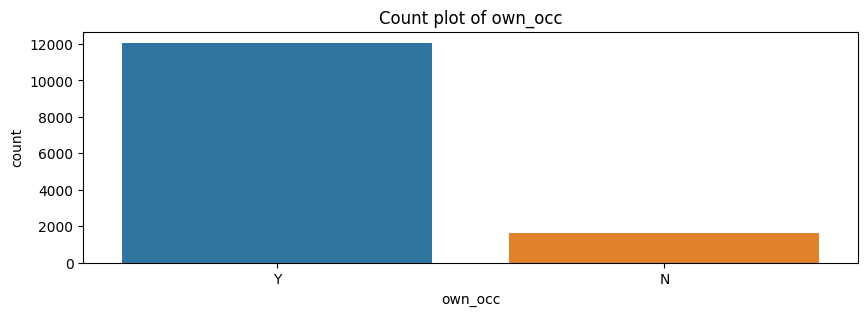

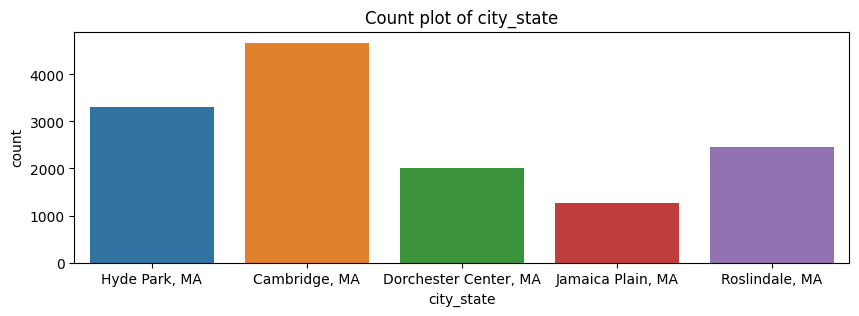

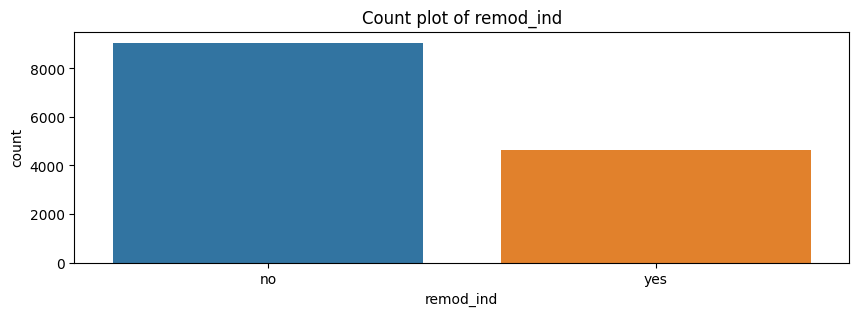

In [105]:
# Let's take a look of visualizations for the categorical features
for feature in boston_pred2_categorical_features:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.countplot(boston_pred2, x = feature)
  # Set the title and x-label
  plt.title(f'Count plot of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

Descriptive Statistics

In [106]:
# Original Descriptive Stats
# Let's take a look at the count of the categorical features along with how many unique values there are, andd the most frequent values under these features.
boston_subset_categorical_features.describe().transpose()


count unique            top   freq
own_occ          13712      2              Y  12068
structure_class  13712      1              R  13712
r_bldg_styl      13712     17             CL   8172
r_roof_typ       13712      7              G  10811
r_ext_fin        13712     11              M   7494
r_bth_style      13712      4              S   9202
r_kitch_style    13712      4              S   8246
r_heat_typ       13712      7              W  10212
r_ac             13712      3              N  11596
r_ext_cnd        13712      5              A  11345
r_ovrall_cnd     13712      5              A  11574
r_int_cnd        13712      5              A  10042
r_int_fin        13712      3              N  13703
r_view           13712      5              A  12871
city_state       13712      5  Cambridge, MA   4673
remod_ind        13712      2             no   9057

In [107]:
# Let's take a look at our selected column
boston_pred2_categorical_features.describe().transpose()

count unique            top   freq
own_occ     13712      2              Y  12068
city_state  13712      5  Cambridge, MA   4673
remod_ind   13712      2             no   9057

We can see that 12,068 of the Boston Homes have the owners recieve residential exemption as an owner-occupied property, Cambridge is the most common city state at 4,673 Boston Homes, and majority of the Boston Homes have not been remodeled at 9,057 homes.

## Numeric Analysis, Descriptive Statistics and Histograms, how do you plan to handle nulls?


In [108]:
# Get the list of numeric columns
boston_pred2_numeric = boston_pred2.select_dtypes(include=[np.number]).columns
boston_pred2_numeric

Index(['pid', 'zipcode', 'land_sf', 'yr_built', 'yr_remod', 'living_area',
       'num_floors', 'r_total_rms', 'r_bdrms', 'r_full_bth', 'r_half_bth',
       'r_kitch', 'r_fplace', 'zip', 'population', 'pop_density',
       'median_income', 'av_total', 'property_age', 'pred', 'residual',
       'abs_residual'],
      dtype='object')

In [109]:
# Get the numeric features of our interest
boston_pred2_numeric_features = boston_subset[['living_area', 'r_total_rms', 'median_income', 'r_full_bth', 'r_fplace', 'land_sf',
                                                'r_bdrms','num_floors', 'yr_remod', 'r_half_bth', 'property_age', 'pop_density', 'zipcode']]
boston_pred2_numeric_features

living_area  r_total_rms  median_income  r_full_bth  r_fplace  land_sf  \
0             1681            6          58890           2         0 10288.00   
1             3024            8          75446           2         2 10148.00   
2             1160            5          75446           1         0  8512.00   
3             1868            7          48841           1         0  3187.00   
4             1534            7          58890           1         2 10088.00   
...            ...          ...            ...         ...       ...      ...   
14220         1703            9          48841           1         0  3717.00   
14221         1350            7          75446           2         0  3895.00   
14222         1490            6          75446           1         1  4700.00   
14223         1404            7          48841           1         0  5250.00   
14224         1157            6          58890           1         0  5000.00   

       r_bdrms  num_floors  yr_remod  r_half_bth  property_age  pop_density  \
0            3           1         0           0            31         6207   
1            5           2      2016           1           123        13251   
2            3           2         0           1           103        13251   
3            4           2      2001           1           123        15913   
4            3           1      1975           1            52         6207   
...        ...         ...       ...         ...           ...          ...   
14220        4           2      1995           1            98        15913   
14221        3           2      2004           0           103        13251   
14222        3           2         0           0            95        13251   
14223        4           2         0           0            98        15913   
14224        3           1         0           0            78         6207   

       zipcode  
0         2136  
1         2132  
2         2132  
3         2124  
4         2136  
...        ...  
14220     2124  
14221     2132  
14222     2132  
14223     2124  
14224     2136  

[13712 rows x 13 columns]

Target Variable - Assessed Value for Property ("av_total")

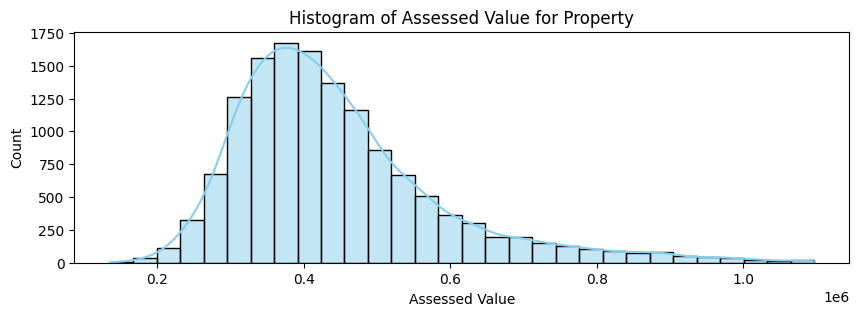

In [110]:
# Let's start with the target variable and see some visualizations
# Let's see a distribution plot
# Set the figure size
plt.figure(figsize=(10, 3))
# Create the histogram using seaborn
sns.histplot(boston_pred2, x = 'av_total', bins=30, kde=True, color='skyblue')
# Set the title and x-label
plt.title('Histogram of Assessed Value for Property')
plt.xlabel('Assessed Value')
# Display the plot
plt.show()

We have a right skewed distribution that is unimodal. The median would be the best measure of center as it is not influenced by outliers nor the skew. However, it does seem that majority of the Boston Homes in the 300,000 and 500,000 price range.

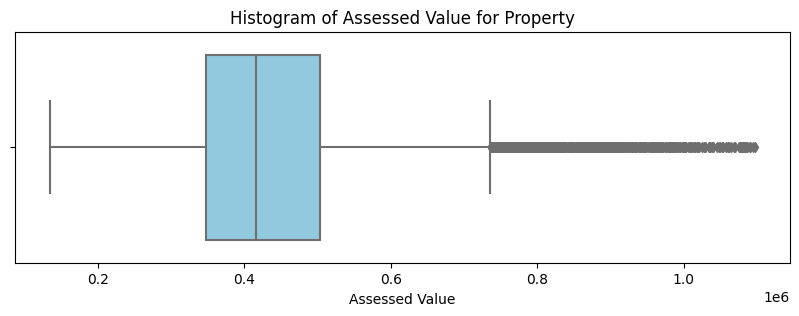

In [111]:
# Let's see a boxplot
# Set the figure size
plt.figure(figsize=(10, 3))
# Create the histogram using seaborn
sns.boxplot(boston_pred2, x = 'av_total', color='skyblue')
# Set the title and x-label
plt.title('Histogram of Assessed Value for Property')
plt.xlabel('Assessed Value')
# Display the plot
plt.show()

The box plot helps with our analysis as we can claim with evidence that there is definitely a right skewed distribution as the majority of home prices are influenced by large outliers. There are tons of outliers in our data, meaning there are a lot of expensive Boston Homes in our data.

In [112]:
# Let's start with the target variable and see some visualizations
# Let's see some descriptive statistics
# Set the figure size
boston_pred2['av_total'].describe().to_frame()

# Mean house price is $445,391.52

av_total
count   13712.00
mean   445391.52
std    143005.13
min    134800.00
25%    348184.92
50%    415400.00
75%    503502.88
max   1097100.00

This table gives us a simple breakdown of our boxplot by giving us numerical values. Now we can accurately state 50% of Boston homes' assessed value for property ranges from 348,184.92 to 503,502.88 dollars. The mean or average Boston home price is 445,391.52. We can also state that the cheapeast Boston house is $134,800.00 and the most expensive is 1,097,100.00 (excluding potential outliers). Now, we can start to investigate more on the numeric features and categorical features that influence price, this is going to be the heart of our analysis and will help with our client's understanding.

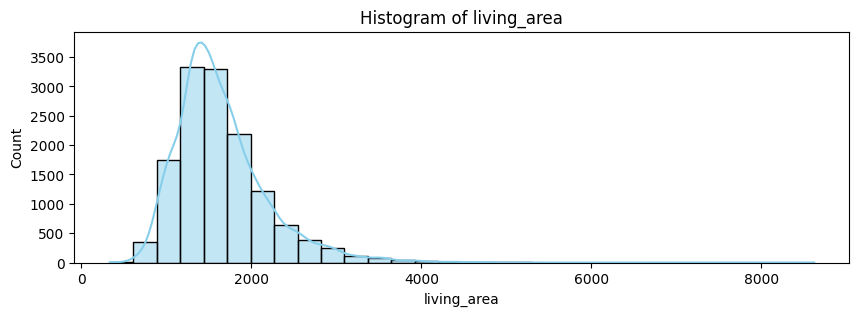

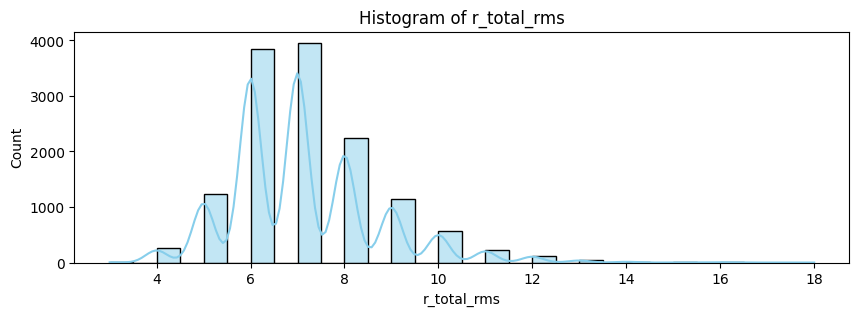

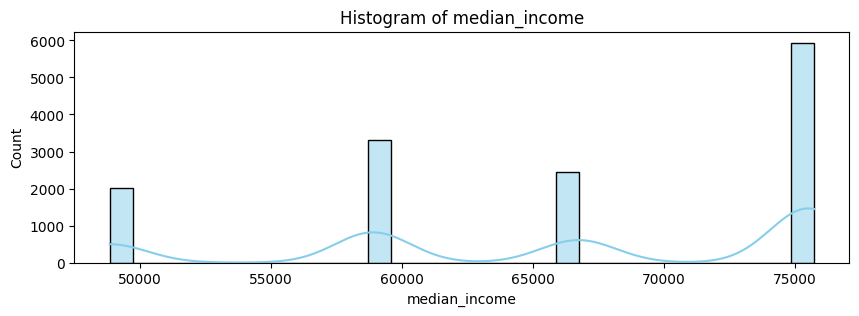

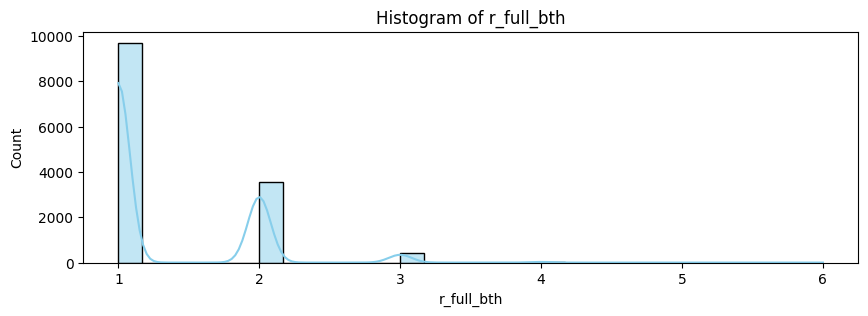

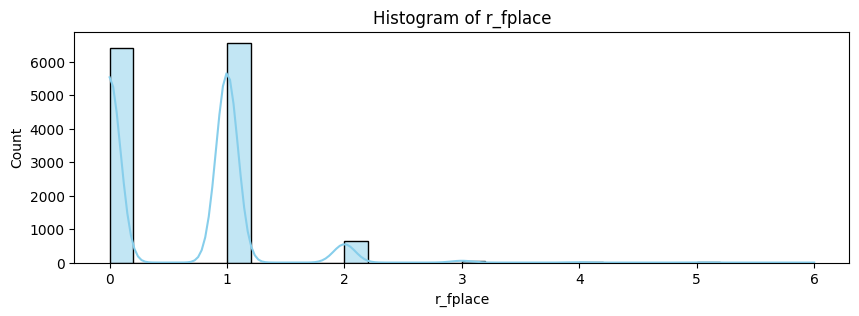

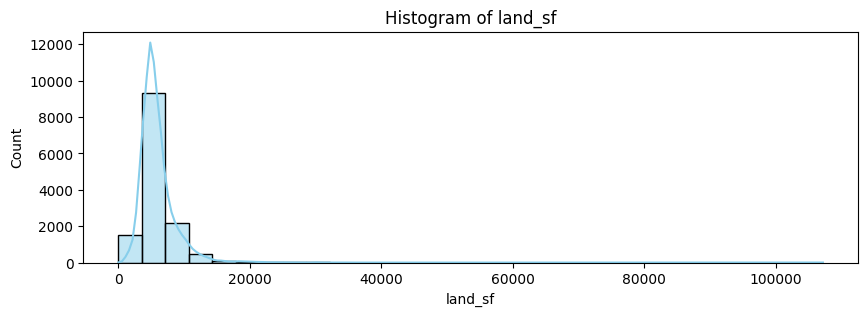

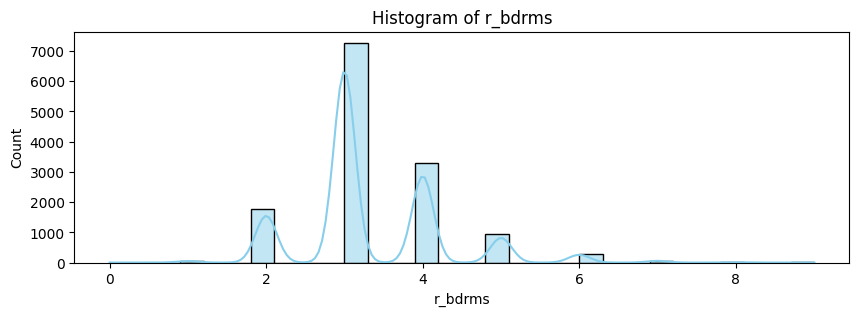

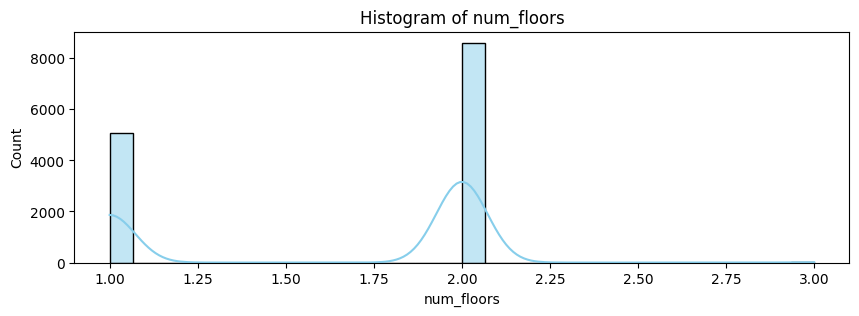

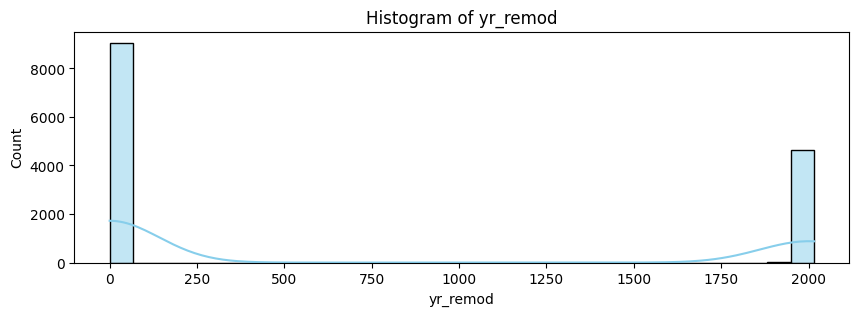

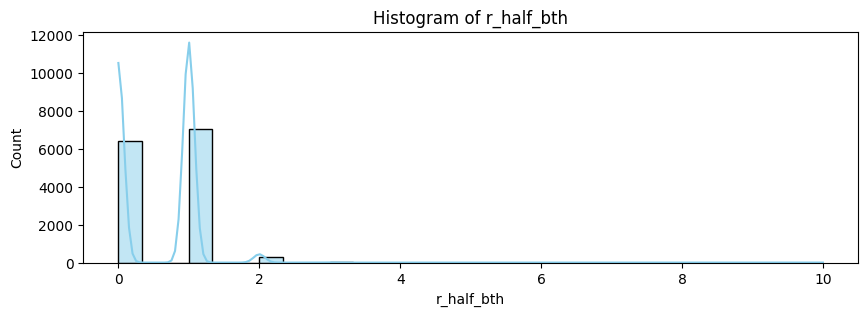

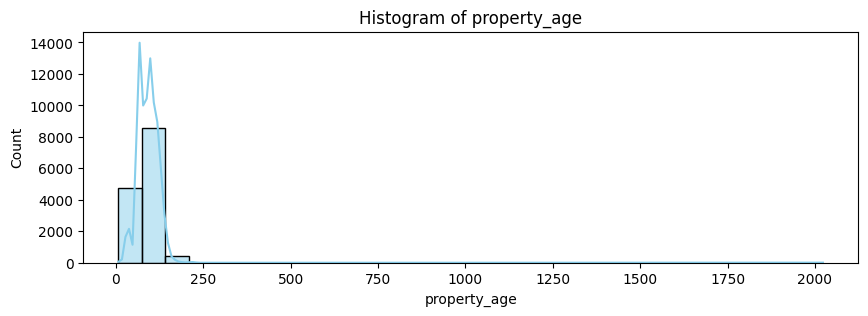

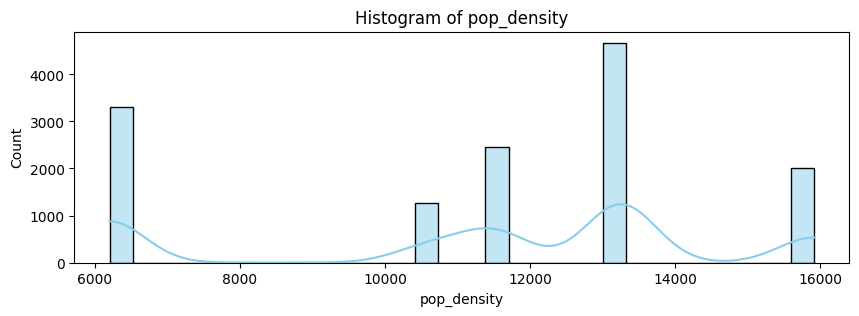

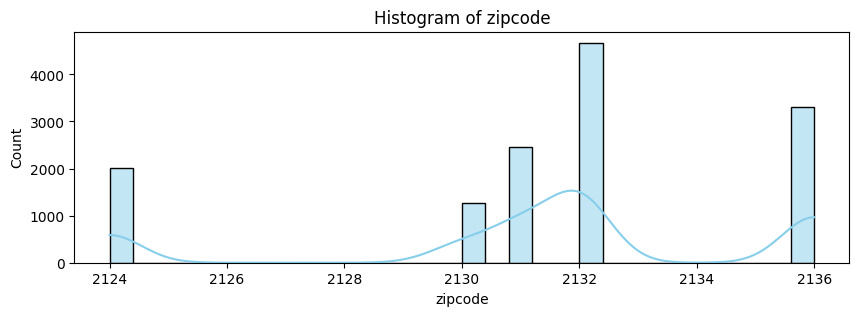

In [113]:
# Now for the features

for feature in boston_pred2_numeric_features:

  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.histplot(boston_pred2, x = feature, bins=30, kde=True, color='skyblue')
  # Set the title and x-label
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

Box plots are used to help with identifying any potential outliers

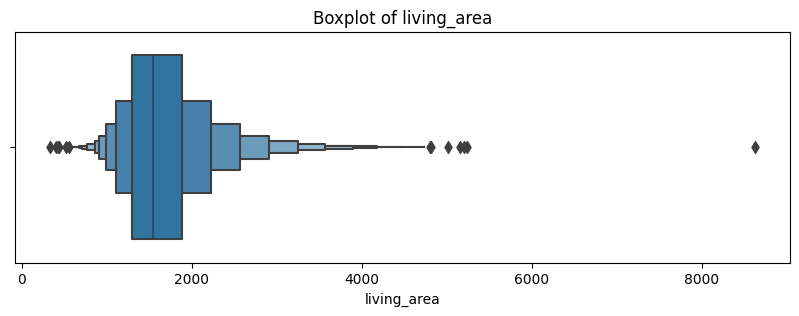

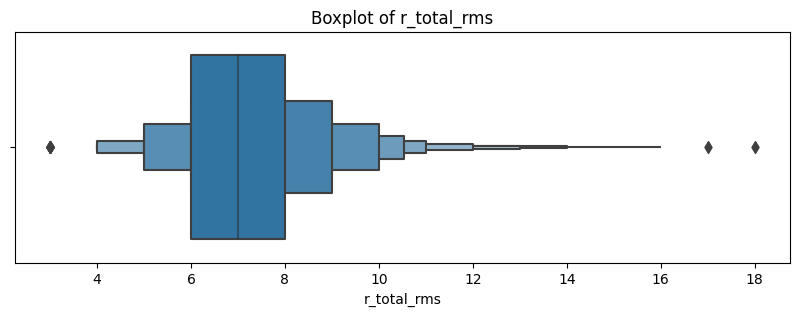

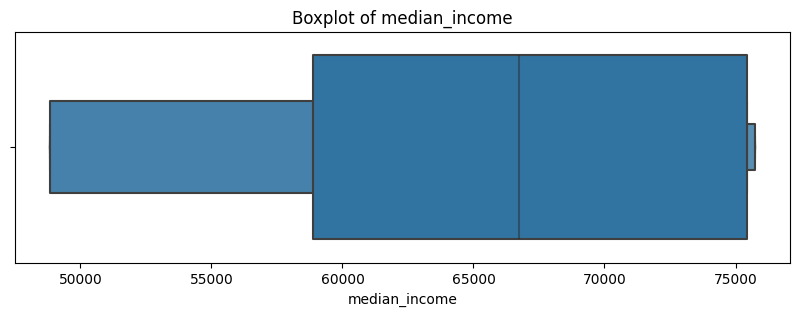

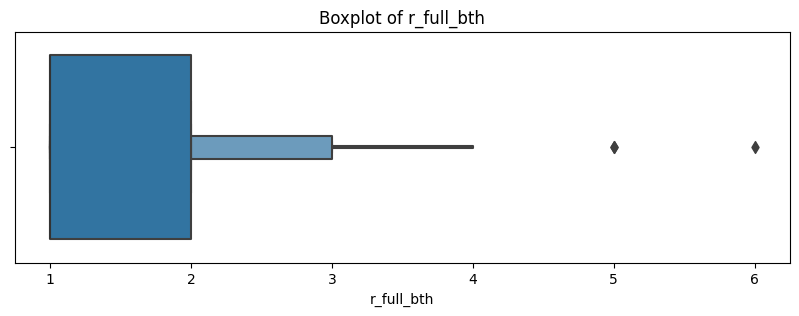

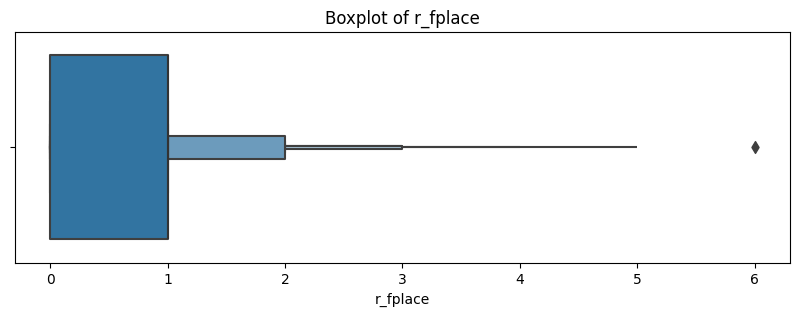

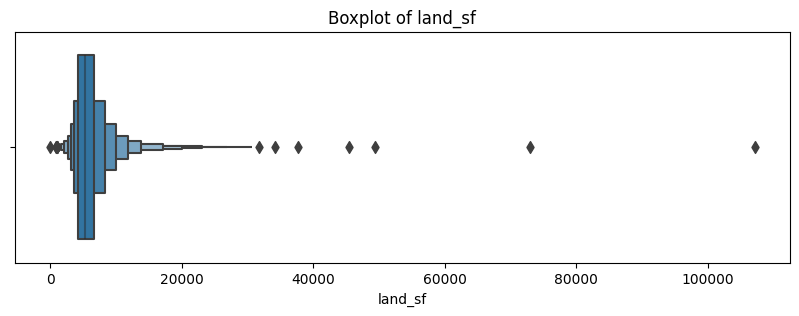

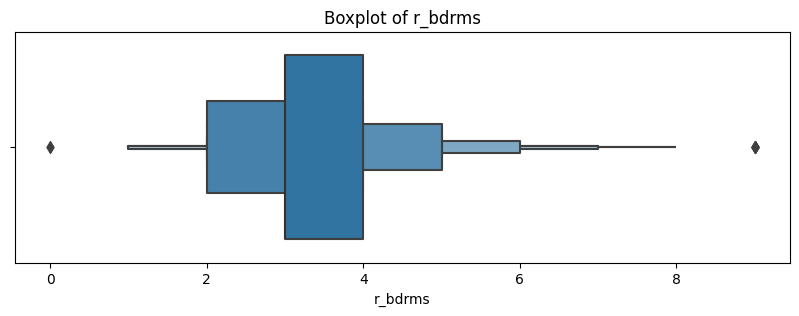

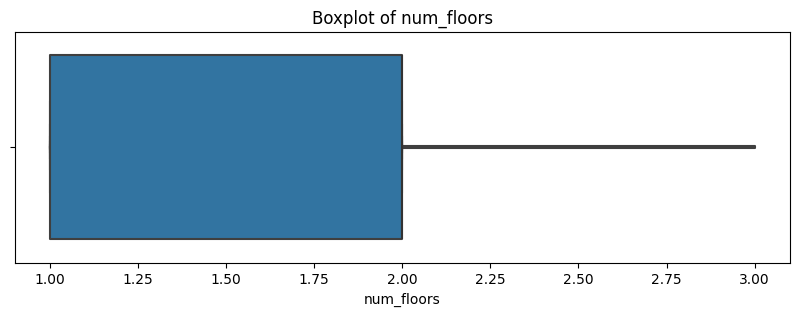

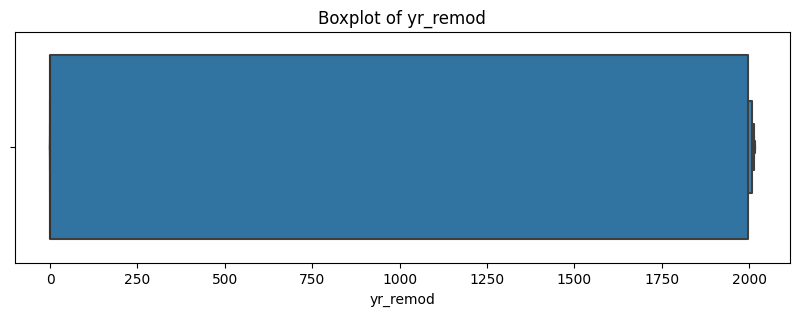

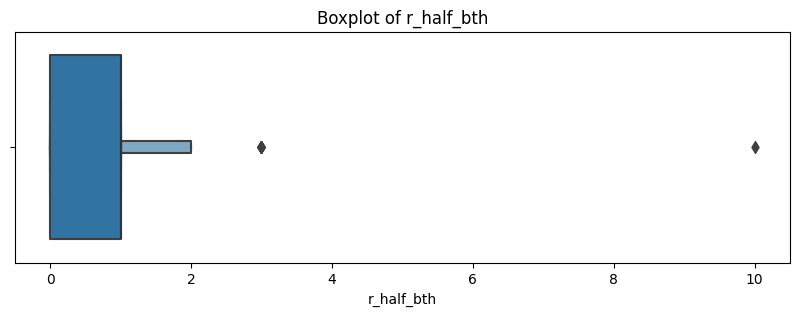

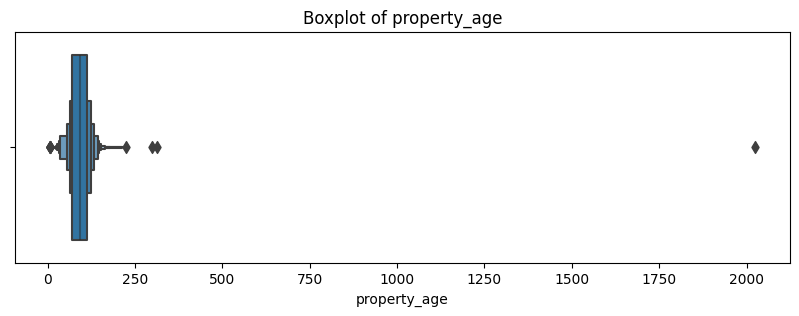

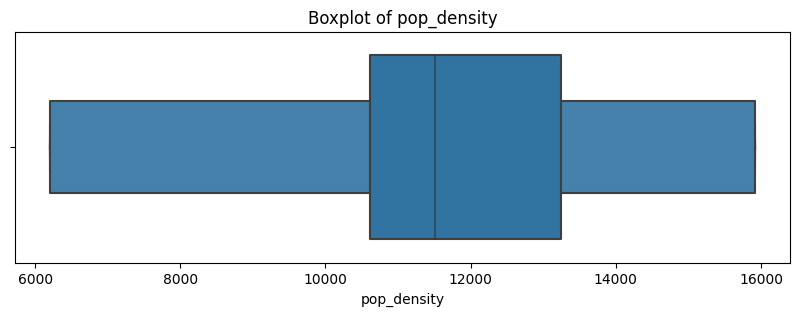

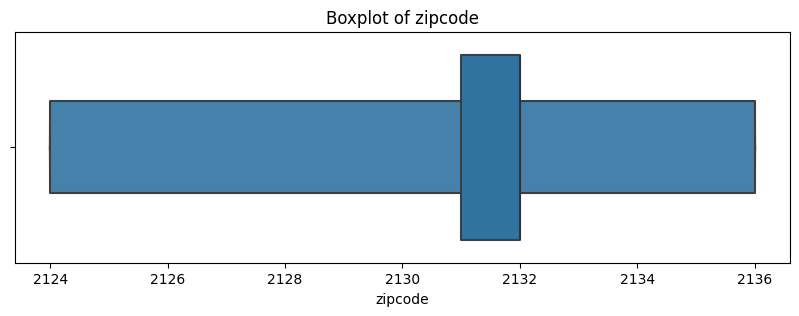

In [114]:
for feature in boston_pred2_numeric_features:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.boxenplot(boston_pred2, x = feature)
  # Set the title and x-label
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

Statistics: Understand the central tendency and spread of each variable

In [115]:
boston_pred2_numeric_features.describe().transpose()

count     mean     std      min      25%      50%      75%  \
living_area   13712.00  1645.58  542.49   332.00  1295.00  1540.00  1884.00   
r_total_rms   13712.00     7.09    1.56     3.00     6.00     7.00     8.00   
median_income 13712.00 66024.84 9724.93 48841.00 58890.00 66735.00 75446.00   
r_full_bth    13712.00     1.33    0.55     1.00     1.00     1.00     2.00   
r_fplace      13712.00     0.59    0.62     0.00     0.00     1.00     1.00   
land_sf       13712.00  5908.39 2883.10     0.00  4302.75  5268.50  6720.00   
r_bdrms       13712.00     3.33    0.92     0.00     3.00     3.00     4.00   
num_floors    13712.00     1.63    0.49     1.00     1.00     2.00     2.00   
yr_remod      13712.00   679.44  947.80     0.00     0.00     0.00  1997.00   
r_half_bth    13712.00     0.56    0.54     0.00     0.00     1.00     1.00   
property_age  13712.00    91.32   32.08     7.00    70.00    93.00   113.00   
pop_density   13712.00 11386.48 3272.51  6207.00 10618.00 11505.00 13251.00   
zipcode       13712.00  2131.43    3.67  2124.00  2131.00  2132.00  2132.00   

                    max  
living_area     8623.00  
r_total_rms       18.00  
median_income  75730.00  
r_full_bth         6.00  
r_fplace           6.00  
land_sf       107158.00  
r_bdrms            9.00  
num_floors         3.00  
yr_remod        2016.00  
r_half_bth        10.00  
property_age    2023.00  
pop_density    15913.00  
zipcode         2136.00

We can see there is a common distribution shape for many our numeric features, which is that they are unimodal and most likely skewed (right or left, depends on what numeric feature we are referring to). To really understand what the shapes and what is going with the numeric features, we reference our descriptive statistics as that also serves as a far simple version of a boxplot but also gives us accurate numbers when we need to discuss our findings.

Living Area: The average Boston Home has $1,645.58$ sq ft , 50% of Boston homes have $1,540.00$ sq ft , the min is $332.00$ sq ft , the max is $8,623.00$ sq ft, the spread in one standard deviation away from the mean is $542.49$ sq ft.

Total Number of Rooms: The average Boston home has $7.09$ rooms, 50% of Boston homes have $7$ rooms , the min is $3$ rooms , the max is $18$ rooms, the spread in one standard deviation away from the mean is $1.56$ rooms

Median Income: The mean median income of the residence is $66,024.84$ , 50% of Boston Homes Median Income is $66,735.00$ , the min Median Income is $48,841.00$, the max Median Income is $75,730.00$, the spread of Median Income in one standard deviation away from the mean is $9,724.93$.

Total Number of Full Baths: The average Boston Home has $1.33$ full bathrooms, 50% of Boston homes have $1$ full bathrooms , the min is $1$ full bathrooms, the max is $6$ full bathrooms, the spread in one standard deviation away from the mean is $0.55$ full bathrooms.

Total Number of Fireplaces: The average Boston Home has $0.59$ fireplaces, 50% of Boston homes have $1$ fireplace , the min is $0$ fireplaces , the max is $6$ fireplaces, the spread in one standard deviation away from the mean is $0.62$

Parcel's Land Area in Square Feet: The average Boston Home legal area has $5,908.39$ sq ft , 50% of Boston homes have $5,268.50$ sq ft , the min has $0.00$ sq ft , the max has $107,158.00$ sq ft , the spread in one standard deviation away from the mean is $2,883.10$ sq ft.

Total Number of Bedrooms: The average Boston Home has $3.33$ bedrooms , 50% of Boston homes have $3$ bedrooms , the min has $0$ bedrooms , the max has $9$ bedroooms, the spread in one standard deviation away from the mean is $0.92$ bedrooms.

Total Number of Floors: The average Boston Home has $1.63$ floors , 50% of Boston homes have $2$ floors , the min has $1$ floor, the max has $3$ floors, the spread in one standard deviation away from the mean is $0.49$ floors.

Year Property was Last Remodeled: 75% of Boston Homes were remodeled was in $1997$ and the most recent year a Boston Home was last remodeled was in $2016$. Many of the homes were not remodeled, hence the 0.

Number of Half Bathrooms: The average Boston Home has $0.56$ full bathrooms, 50% of Boston homes have $1$ half bathrooms , the min has $0$ half bathrooms , the max has $10$ half bathrooms, the spread in one standard deviation away from the mean is $0.54$ half bathrooms.

Property's Age (2023 - Year Built): The average Boston Home Property Age is $91.32$ years old , 50% of Boston homes' Property Age is $93$ years old , the min or youngest property age is $7$ years old , the spread in one standard deviation away from the mean is $32.08$ years.

People Per Square Mile: The average Population Density in Boston Homes is $11,386.48$ people , 50% of Boston homes have a Population Density of $11,505$ people, the min Population Density is $6,207$ people , the max Population Density is $15,913$ people, the spread in one standard deviation away from the mean is $3,272.51$ people

## Categorical to Numeric Analysis - what categorical variables combined with av_total are likely to be useful?
- Yours client believes that owner-occupied homes have a higher assessed value than homes built in the 1990s, and homes that have beenn recentely remodeled tend to have higher homes values.

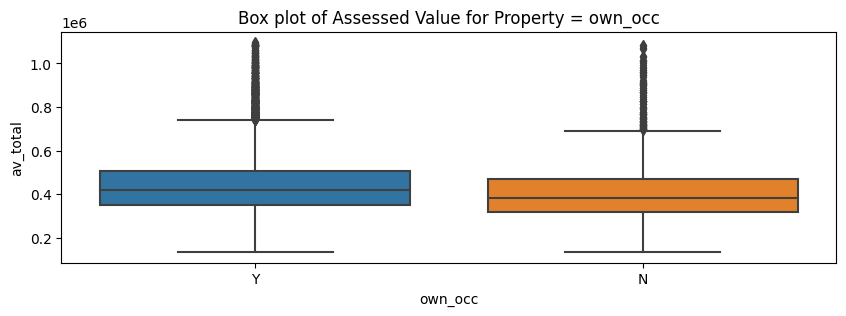

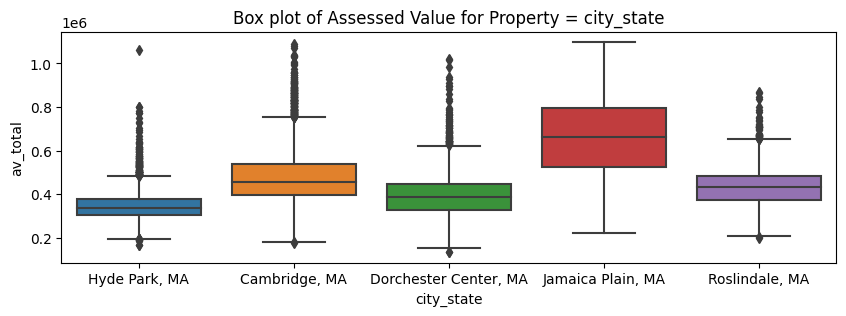

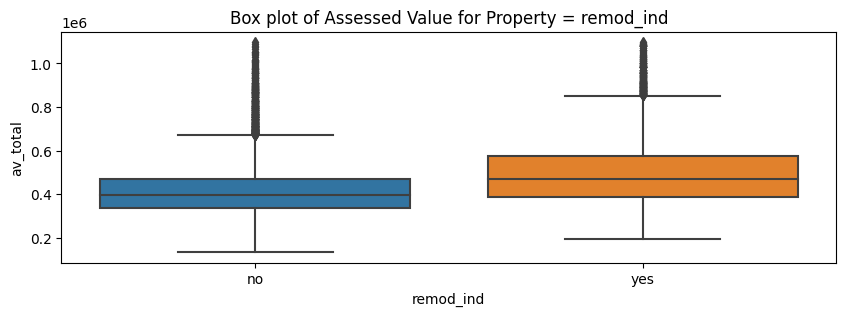

In [117]:
# Box plots
for feature in boston_pred2_categorical_features:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.boxplot(boston_pred2, x = feature, y ='av_total')
  # Set the title and x-label
  plt.title(f'Box plot of Assessed Value for Property = {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

Box Plot "Assessed Value for Property = Own_CC", the difference in median assessed value for owner occupied homes is not that large, the homes that are owned occupied are priced at 419,500.00 vs homes that are not owner occupied are priced at 384,750.00. The difference is only 34, 750 dollars which is nothing drastically different or is not a big enough difference to put emphasis on. Also, there are also a lot of outliers for owner occupied homes and homes that are not owner occupied as seen in the box plot.

Box Plot "Assessed Value for Property = City_State", we can determine most expensive city states based on a measure like the median. From most expensive city state to least expensive city state, we have Jamaica Plain in 1st at 659,900.00, Cambridge in 2nd at 458,079.45, Roslinedale in 3rd at 432,396.82, Dorchester in 4th at 387,089.37, and Hyde Park in 5th at 337,088.47. An interesting find is that Jamaica Plain homes are the highest priced homes and there are no outliers meaning that is consistently the most expensive city state.

Box Plot "Assessed Value for Property = Remod_Ind", there is a noticeably large difference in value of homes for whether they were remodeled or not, 50% the ones that were remodeled are at a high value of 467,900.00 and the 50% of homes that were not remodeled are at a lower value of 394,200.00. Additionally, there is an interesting story being told by the outliers for Whether a house was remodeled or not because there are a ton of outliers. For the homes that were not remodeled we make the assume the possible reason for the high value is that these homes are either new or represent old-fashioned Boston and hence the price is shot up. Also, our client is right in the sense that remodeled homes do have a higher home value, and in later plots we will explore whether the year or remodeling has in impact on home value. In other words, is a home that has abeen remodeled recently have a higher home value?




In [124]:
boston_pred2.groupby('own_occ')['av_total'].describe().transpose() # The mean is roughly similar

own_occ          N          Y
count      1644.00   12068.00
mean     417320.19  449215.62
std      143982.92  142449.89
min      136100.00  134800.00
25%      320975.00  352193.96
50%      384750.00  419500.00
75%      469565.48  508001.58
max     1083537.00 1097100.00

In [125]:
boston_pred2.groupby('city_state')['av_total'].describe().transpose() # The mean is roughly similar

city_state  Cambridge, MA  Dorchester Center, MA  Hyde Park, MA  \
count             4673.00                2008.00        3305.00   
mean            480877.57              398657.00      346327.12   
std             123423.67              110461.41       69991.86   
min             177836.69              134800.00      168300.00   
25%             395833.30              329903.14      303749.31   
50%             458079.45              387089.37      337088.47   
75%             538723.53              448625.00      376400.00   
max            1086300.00             1019300.00     1060100.00   

city_state  Jamaica Plain, MA  Roslindale, MA  
count                 1269.00         2457.00  
mean                667476.08       434646.35  
std                 183192.34        91183.89  
min                 220700.00       201400.00  
25%                 523560.70       373254.62  
50%                 659900.00       432396.82  
75%                 797280.32       485000.00  
max                1097100.00       867600.00

In [126]:
boston_pred2.groupby('remod_ind')['av_total'].describe().transpose()

remod_ind         no        yes
count        9057.00    4655.00
mean       417059.39  500515.90
std        124431.83  159746.04
min        134800.00  192500.00
25%        334700.00  387779.45
50%        394200.00  467900.00
75%        469171.59  573350.00
max       1095200.00 1097100.00

In [150]:
boston_pred2.groupby(['city_state', 'own_occ', 'remod_ind'])['av_total'].describe()

count      mean       std       min  \
city_state            own_occ remod_ind                                         
Cambridge, MA         N       no         300.00 429652.47 109177.30 177836.69   
                              yes        142.00 497616.56 132814.37 252300.00   
                      Y       no        2702.00 457744.32 110285.62 182100.00   
                              yes       1529.00 530254.03 131111.16 228800.00   
Dorchester Center, MA N       no         224.00 350909.64  89095.98 136100.00   
                              yes        102.00 387466.86  84166.30 227900.00   
                      Y       no        1086.00 381080.53  95941.78 134800.00   
                              yes        596.00 450544.32 126706.10 201200.00   
Hyde Park, MA         N       no         343.00 328629.29  59393.09 185372.17   
                              yes         92.00 365367.87 106717.65 192500.00   
                      Y       no        2098.00 338344.53  63080.07 168300.00   
                              yes        772.00 373614.78  78487.39 229500.00   
Jamaica Plain, MA     N       no          79.00 638814.98 197523.93 220700.00   
                              yes         83.00 668456.50 202012.42 358805.46   
                      Y       no         572.00 623920.39 172685.81 258600.00   
                              yes        535.00 718124.13 176386.13 224000.00   
Roslindale, MA        N       no         199.00 398448.88  86376.12 210300.00   
                              yes         80.00 460230.37 117982.76 236300.00   
                      Y       no        1454.00 419478.66  82619.08 201400.00   
                              yes        724.00 472229.76  93014.51 239100.00   

                                              25%       50%       75%  \
city_state            own_occ remod_ind                                 
Cambridge, MA         N       no        365850.00 414850.00 475474.17   
                              yes       396375.00 468843.01 561324.81   
                      Y       no        382025.00 437100.00 507843.70   
                              yes       433436.58 508000.00 594700.00   
Dorchester Center, MA N       no        284344.72 340722.08 401900.39   
                              yes       331051.90 371579.92 420380.32   
                      Y       no        319550.00 377102.37 430025.00   
                              yes       370925.00 429150.00 508421.92   
Hyde Park, MA         N       no        295500.00 319100.00 353900.00   
                              yes       311838.91 348482.84 397851.65   
                      Y       no        300194.22 332157.45 366800.00   
                              yes       324002.51 360266.89 404067.27   
Jamaica Plain, MA     N       no        468703.71 624266.81 760850.00   
                              yes       536184.67 630400.00 828849.12   
                      Y       no        481572.91 609050.00 749525.00   
                              yes       572900.00 722200.00 842368.96   
Roslindale, MA        N       no        341653.62 397736.25 451950.00   
                              yes       371285.92 463350.00 522575.00   
                      Y       no        364949.54 419400.00 468592.84   
                              yes       412250.00 466569.80 527395.71   

                                               max  
city_state            own_occ remod_ind             
Cambridge, MA         N       no         906000.00  
                              yes        945463.30  
                      Y       no        1035900.00  
                              yes       1086300.00  
Dorchester Center, MA N       no         679100.00  
                              yes        717400.00  
                      Y       no         881200.00  
                              yes       1019300.00  
Hyde Park, MA         N       no         618400.00  
                              yes        801300.00  
                

In this table, we have grouped by city_state, own_occ, and remod_ind, and selected the av_total column to get descriptive statistics. Here we can apply advanced analysis on the impact of the categorical varaiables on home value. This table serves as greater evidence for our conclusions of the ranking of our top 5 most expensive city states, owner occupied homes have higher prices, and homes that were remodeled have a higher price. For example, there difference in average home value between the three categorical variables in Jamaica Plain is drastic, the average Boston Home Value in Jamaica Plain that is owner occupied and was remodeled is priced at a high of 718,124.13	 while the average Boston Home in Jamaica Plain that is not owner occupied and has not been remodeled is priced at a low of 638,814.98. The difference is a 79,309.05 dollars, which is close to 100,000 dollars. This table just serves as extra support for our findings, and this analysis can be done on other city states, and comparing between owner occupied homes and whether homes were remodeled or not.

Box plot of Decades for Year Built
- 1980 to 1989
- 1990 to 1999
- 2000 to 2016


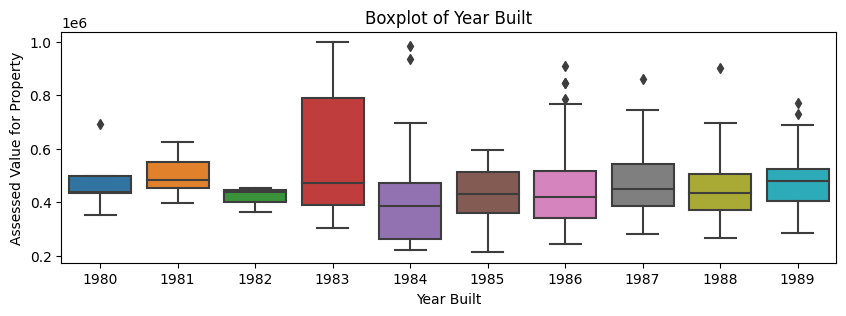

In [127]:
mask_1980s = (boston_pred2['yr_built'] >= 1980) & (boston_pred2['yr_built'] <= 1989)
boston_filter1 = boston_pred2[mask_1980s]

plt.figure(figsize=(10, 3))
sns.boxplot(x=boston_filter1['yr_built'], y= boston_filter1['av_total'])
plt.title(f'Boxplot of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Assessed Value for Property')
plt.show()

In [154]:
boston_filter1['av_total'].describe().to_frame() # Mean is $454,867.33 and Median is $435,650.00

av_total
count    310.00
mean  454867.33
std   141482.14
min   213100.00
25%   365050.00
50%   435650.00
75%   519600.00
max   998200.00

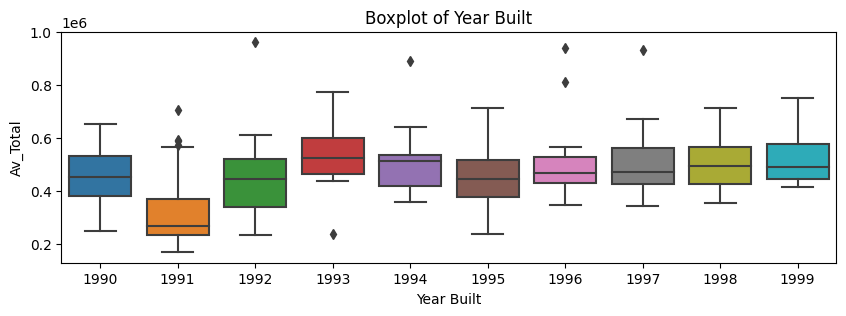

In [128]:
mask_1990s = (boston_pred2['yr_built'] >= 1990) & (boston_pred2['yr_built'] <= 1999)
boston_filter2 = boston_pred2[mask_1990s]

plt.figure(figsize=(10, 3))
sns.boxplot(x=boston_filter2['yr_built'], y= boston_filter2['av_total'])
plt.title(f'Boxplot of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Av_Total')
plt.show()

In [153]:
boston_filter2['av_total'].describe().to_frame() # Mean is $427,557.64 and Median is $433,600.00

av_total
count    303.00
mean  427557.64
std   144847.53
min   167400.00
25%   317697.64
50%   433600.00
75%   524550.00
max   962300.00

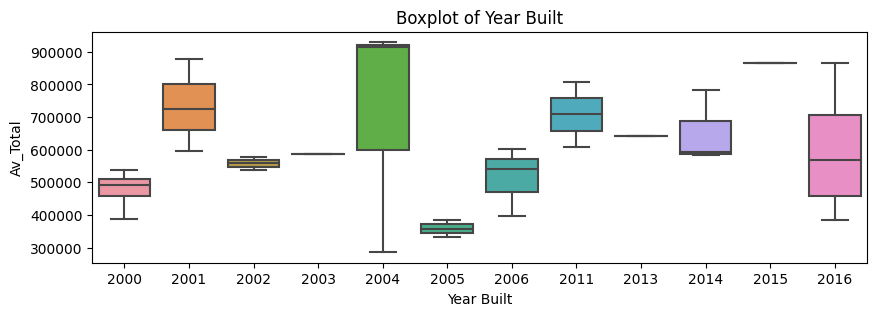

In [133]:
mask_2000s = (boston_pred2['yr_built'] >= 2000) & (boston_pred2['yr_built'] <= 2016)
boston_filter3 = boston_pred2[mask_2000s]

plt.figure(figsize=(10, 3))
sns.boxplot(x=boston_filter3['yr_built'], y= boston_filter3['av_total'])
plt.title(f'Boxplot of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Av_Total')
plt.show()

In [155]:
boston_filter3['av_total'].describe().to_frame() # Mean is $602,448.74 and Median is $585,800.00

av_total
count     29.00
mean  602448.74
std   181461.18
min   285800.00
25%   483302.02
50%   585800.00
75%   723850.06
max   929500.00

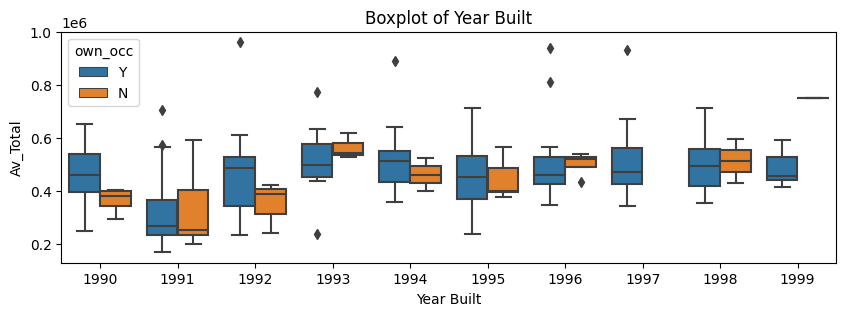

In [131]:
mask_1990s = (boston_pred2['yr_built'] >= 1990) & (boston_pred2['yr_built'] <= 1999)
boston_filter2 = boston_pred2[mask_1990s]

plt.figure(figsize=(10, 3))
sns.boxplot(x=boston_filter2['yr_built'], y= boston_filter2['av_total'], hue=boston_pred2['own_occ'])
plt.title(f'Boxplot of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Av_Total')
plt.show()

Box plot of Remodeled Homes
- 1980 to 1989
- 1990 to 1999
- 2000 to 2023

In [157]:
remodeled = boston_pred2['yr_remod'] != 0
boston_pred2['yr_remod'][remodeled].describe().to_frame()
# We can see that 25% of homes were remodeled in 1996, 50% was in 2005, 75% was in 2012, Mean is 2001, Min was 1890 and Max was 2016.

yr_remod
count   4655.00
mean    2001.40
std       14.14
min     1890.00
25%     1996.00
50%     2005.00
75%     2012.00
max     2016.00

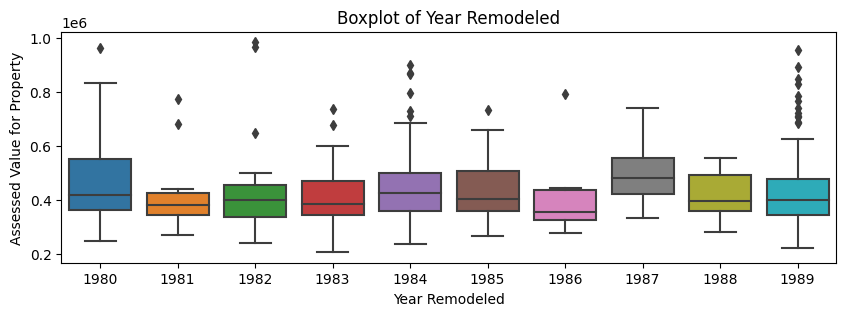

In [141]:
mask_1980s_remod = (boston_pred2['yr_remod'] >= 1980) & (boston_pred2['yr_remod'] <= 1989)
boston_filter4 = boston_pred2[mask_1980s_remod]

plt.figure(figsize=(10, 3))
sns.boxplot(x=boston_filter4['yr_remod'], y= boston_filter4['av_total'])
plt.title(f'Boxplot of Year Remodeled')
plt.xlabel('Year Remodeled')
plt.ylabel('Assessed Value for Property')
plt.show()

In [159]:
boston_filter4['av_total'].describe().to_frame() # mean is $440,722.12 dollars and Median is $407,200.00

av_total
count    463.00
mean  440722.12
std   132816.02
min   206000.00
25%   354323.72
50%   407200.00
75%   491600.00
max   985200.00

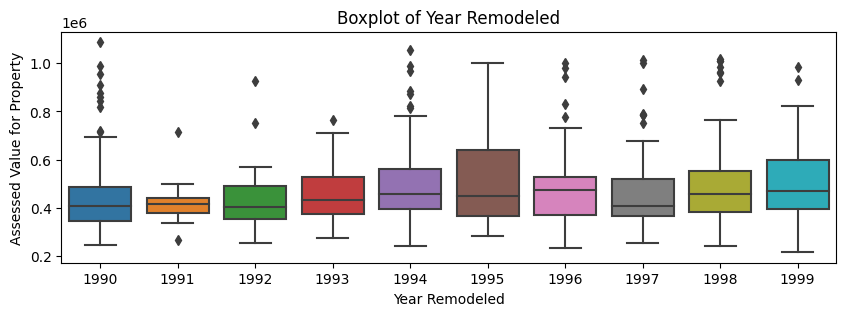

In [142]:
mask_1990s_remod = (boston_pred2['yr_remod'] >= 1990) & (boston_pred2['yr_remod'] <= 1999)
boston_filter5 = boston_pred2[mask_1990s_remod]

plt.figure(figsize=(10, 3))
sns.boxplot(x=boston_filter5['yr_remod'], y= boston_filter5['av_total'])
plt.title(f'Boxplot of Year Remodeled')
plt.xlabel('Year Remodeled')
plt.ylabel('Assessed Value for Property')
plt.show()

In [160]:
boston_filter5['av_total'].describe().to_frame() # Mean is $480,845.13 dollars and Median is $438,400

av_total
count     603.00
mean   480845.13
std    168385.36
min    216567.88
25%    367246.55
50%    438400.00
75%    536600.00
max   1087100.00

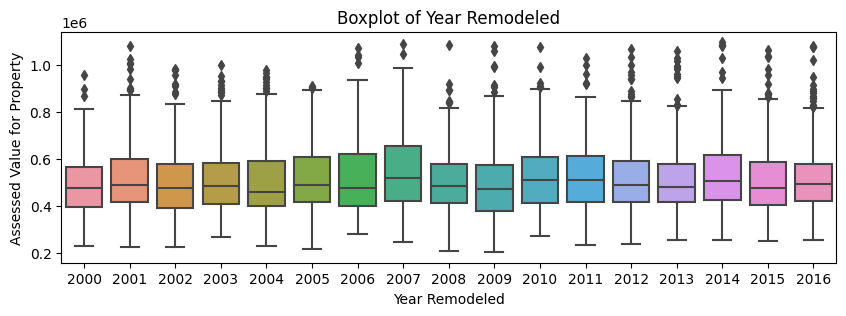

In [143]:
mask_2000s_remod = (boston_pred2['yr_remod'] >= 2000)
boston_filter6 = boston_pred2[mask_2000s_remod]

plt.figure(figsize=(10, 3))
sns.boxplot(x=boston_filter6['yr_remod'], y= boston_filter6['av_total'])
plt.title(f'Boxplot of Year Remodeled')
plt.xlabel('Year Remodeled')
plt.ylabel('Assessed Value for Property')
plt.show()

In [161]:
boston_filter6['av_total'].describe().to_frame() # Mean is $519,026.55 dollars and Median is $487,700.00

av_total
count    3233.00
mean   519026.55
std    158001.79
min    201200.00
25%    407900.00
50%    487700.00
75%    593000.00
max   1097100.00

Pivot Table

In [169]:
pivot_table_results = pd.pivot_table(boston_pred2,
                                    index='city_state',
                                    columns='median_income',
                                    values='av_total',
                                    fill_value=0,
                                    aggfunc=['count']).round(1)
pivot_table_results

count                        
median_income         48841 58890 66735 75446 75730
city_state                                         
Cambridge, MA             0     0     0  4673     0
Dorchester Center, MA  2008     0     0     0     0
Hyde Park, MA             0  3305     0     0     0
Jamaica Plain, MA         0     0     0     0  1269
Roslindale, MA            0     0  2457     0     0

In [164]:
pivot_table_results1 = pd.pivot_table(boston_pred2,
                                    index='city_state',
                                    columns=['median_income', 'remod_ind'],
                                    values='av_total',
                                    fill_value=0,
                                    aggfunc=['count']).round(1)
pivot_table_results1

count                                                  
median_income         48841      58890      66735      75446       75730     
remod_ind                no  yes    no  yes    no  yes    no   yes    no  yes
city_state                                                                   
Cambridge, MA             0    0     0    0     0    0  3002  1671     0    0
Dorchester Center, MA  1310  698     0    0     0    0     0     0     0    0
Hyde Park, MA             0    0  2441  864     0    0     0     0     0    0
Jamaica Plain, MA         0    0     0    0     0    0     0     0   651  618
Roslindale, MA            0    0     0    0  1653  804     0     0     0    0

In [168]:
pivot_table_results2= pd.pivot_table(boston_pred2,
                                    index='city_state',
                                    columns=['living_area'],
                                    values='av_total',
                                    fill_value=0,
                                    aggfunc=['mean']).round(1)
pivot_table_results2.transpose()

city_state        Cambridge, MA  Dorchester Center, MA  Hyde Park, MA  \
     living_area                                                        
mean 332                   0.00                   0.00      248400.00   
     403                   0.00                   0.00      207008.20   
     426              179022.80                   0.00           0.00   
     440                   0.00                   0.00      192500.00   
     517                   0.00                   0.00           0.00   
...                         ...                    ...            ...   
     5017                  0.00             1014600.00           0.00   
     5156                  0.00                   0.00           0.00   
     5197                  0.00              164700.00           0.00   
     5239                  0.00              980700.00           0.00   
     8623                  0.00                   0.00     1060100.00   

city_state        Jamaica Plain, MA  Roslindale, MA  
     living_area                                     
mean 332                       0.00            0.00  
     403                       0.00            0.00  
     426                       0.00            0.00  
     440                       0.00            0.00  
     517                       0.00       236300.00  
...                             ...             ...  
     5017                      0.00            0.00  
     5156                 743912.30            0.00  
     5197                      0.00            0.00  
     5239                      0.00            0.00  
     8623                      0.00            0.00  

[2322 rows x 5 columns]

## **Numeric Relationships**
- Scatter Plots between correlated variables
- Correlation Matrix

---

In [170]:
# Compute the correlation of each variable with the target
df_correlations

correlation
living_area           0.64
r_total_rms           0.46
median_income         0.43
r_full_bth            0.36
r_fplace              0.36
land_sf               0.35
r_bdrms               0.34
num_floors            0.34
yr_remod              0.28
r_half_bth            0.27
pop_density           0.21
property_age          0.17
population            0.11
r_kitch               0.03
yr_built             -0.17

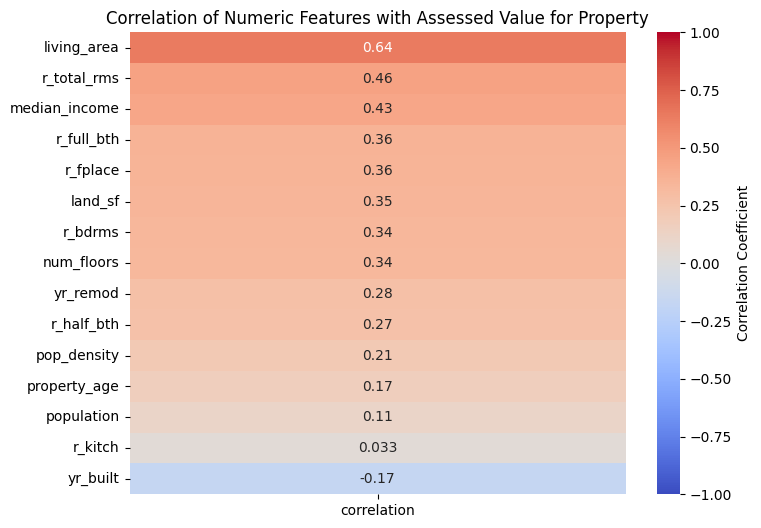

In [171]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlations,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation of Numeric Features with Assessed Value for Property')
plt.show()

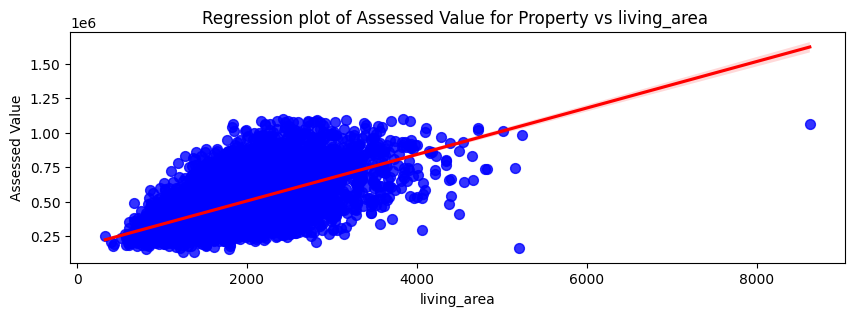

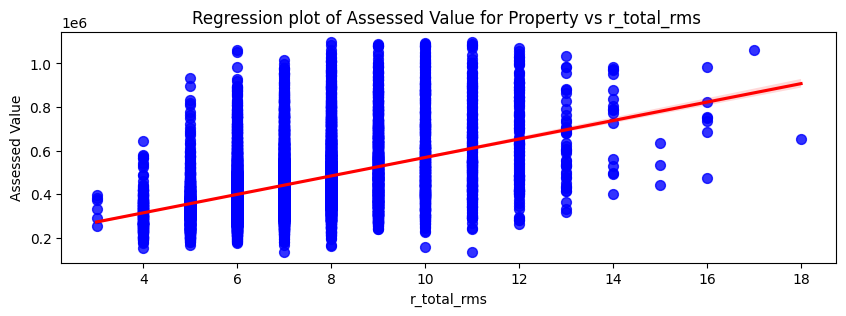

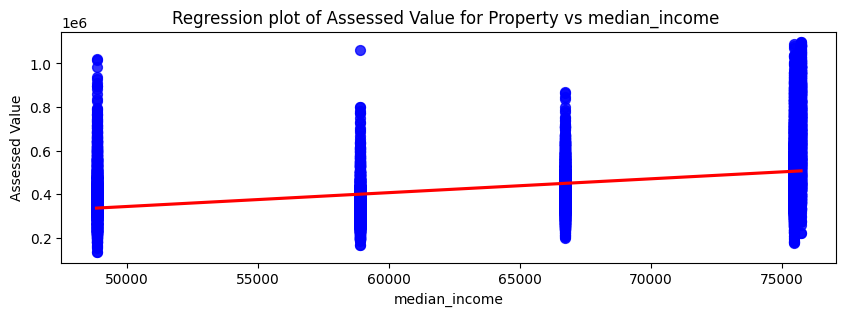

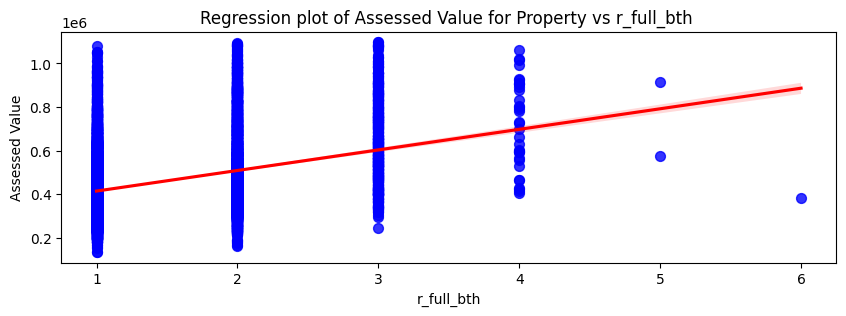

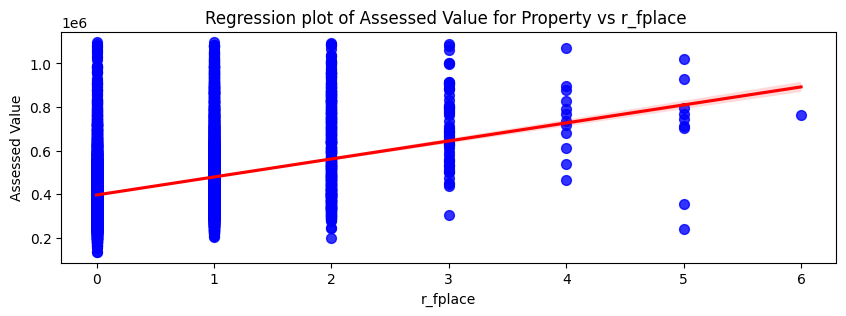

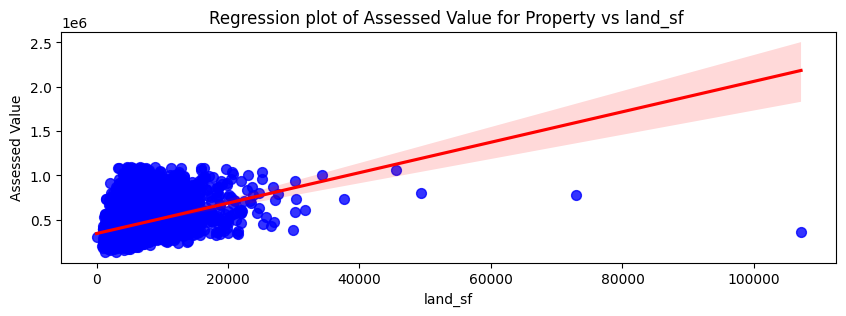

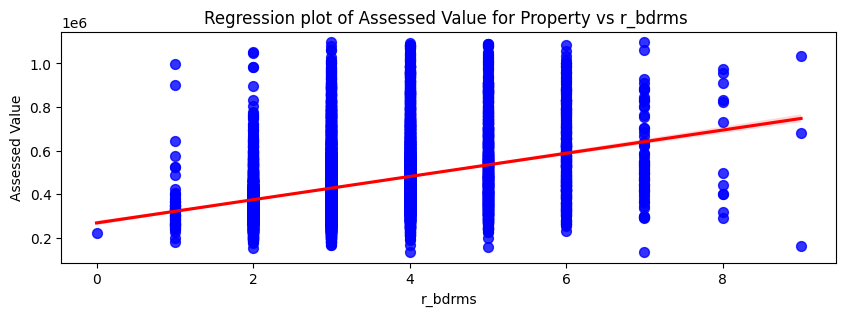

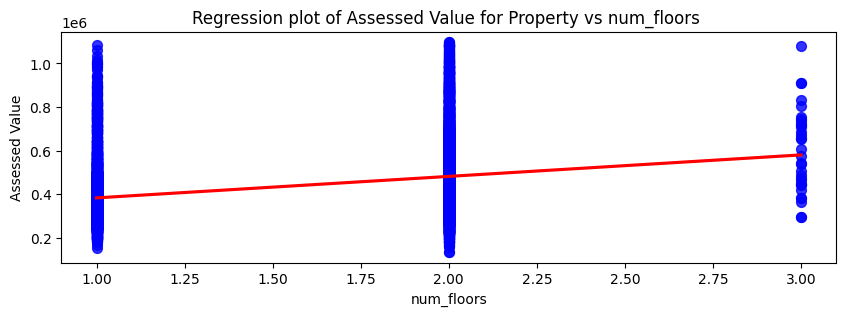

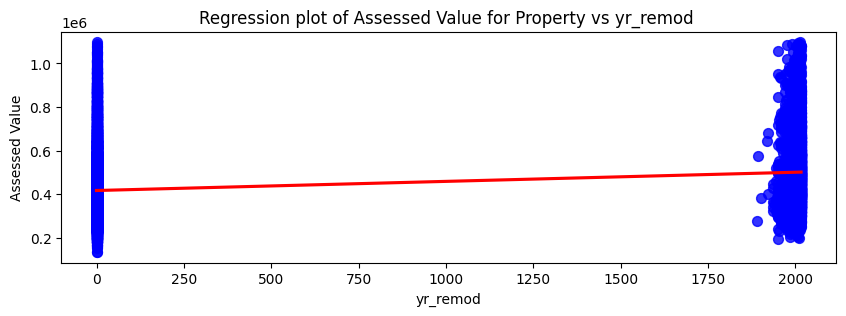

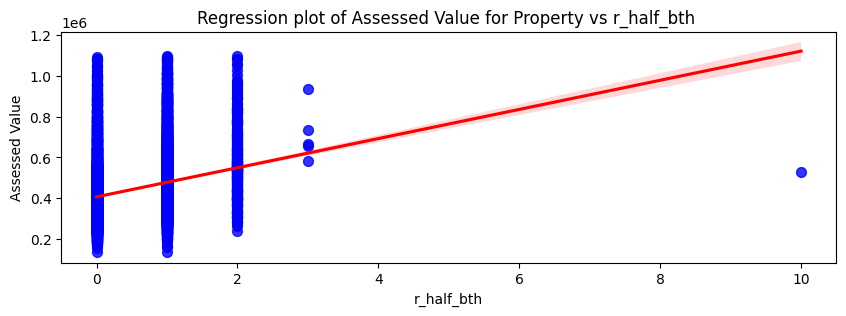

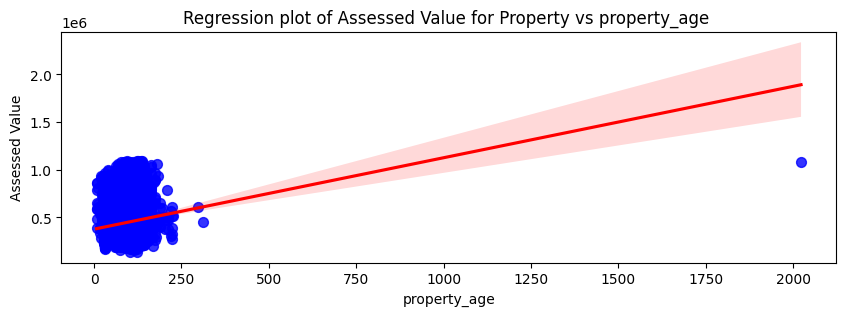

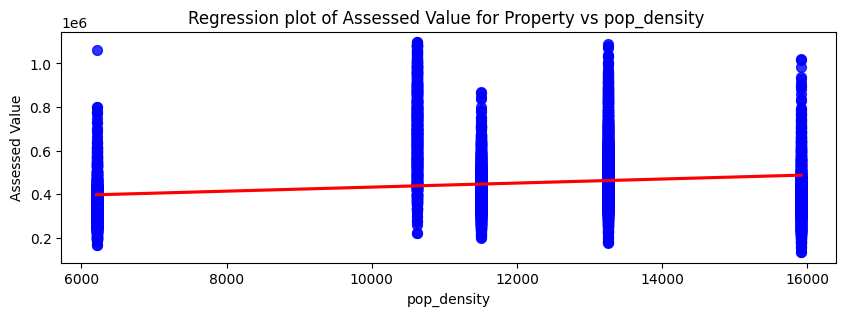

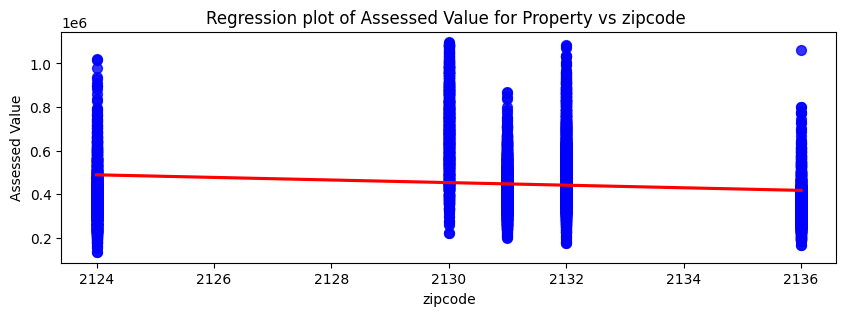

In [173]:
for feature in boston_pred2_numeric_features:
    # Set the figure size
    plt.figure(figsize=(10, 3))
    # Create the a linear line using seaborn
    sns.regplot(boston_pred2,x=feature, y='av_total', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
    # Set the title and x-label
    plt.title(f'Regression plot of Assessed Value for Property vs {feature} ')
    plt.xlabel(feature)
    plt.ylabel('Assessed Value')
    # Display the plot
    plt.show()

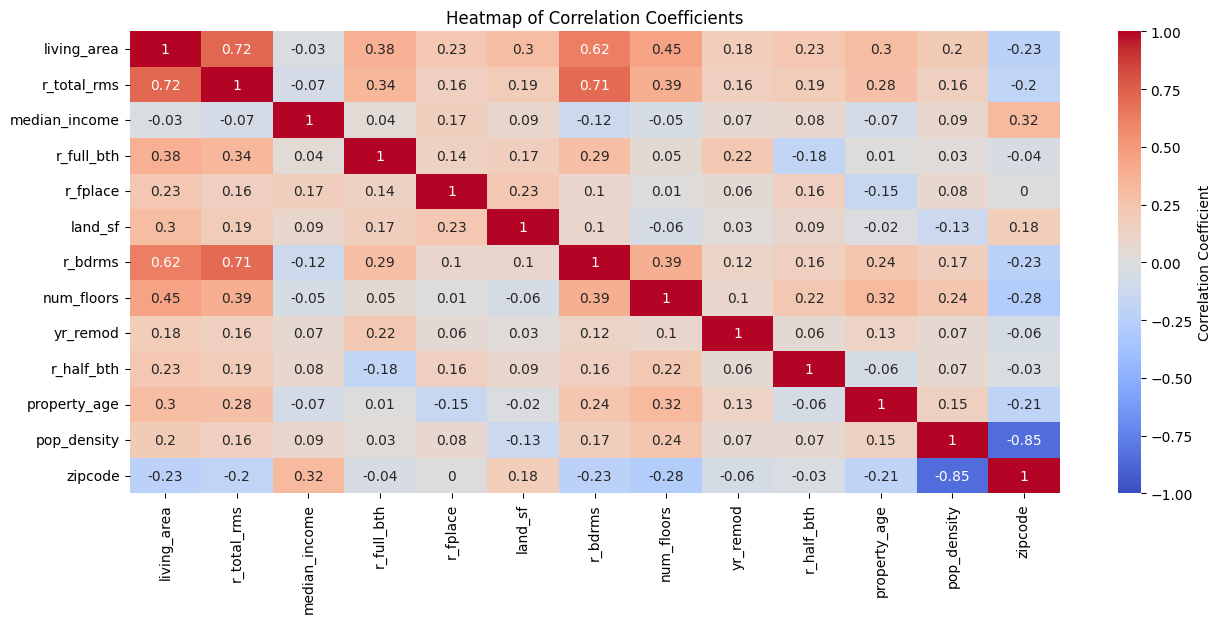

In [172]:
correlation_matrix_boston_pred2 = boston_pred2_numeric_features.corr()
correlation_matrix_boston_pred2 = correlation_matrix_boston_pred2.round(2)

plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix_boston_pred2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws = {'label': 'Correlation Coefficient'})
plt.title('Heatmap of Correlation Coefficients')
plt.show()

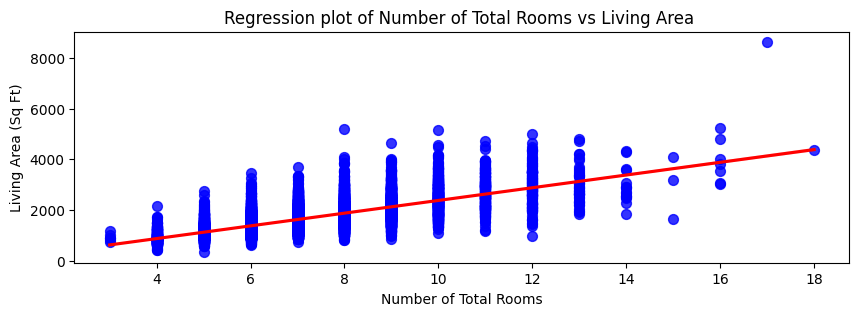

In [177]:
# Set the figure size
plt.figure(figsize=(10, 3))
# Create the a linear line using seaborn
sns.regplot(boston_pred2,x='r_total_rms', y='living_area', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
# Set the title and x-label
plt.title('Regression plot of Number of Total Rooms vs Living Area ')
plt.xlabel("Number of Total Rooms")
plt.ylabel('Living Area (Sq Ft)')
# Display the plot
plt.show()

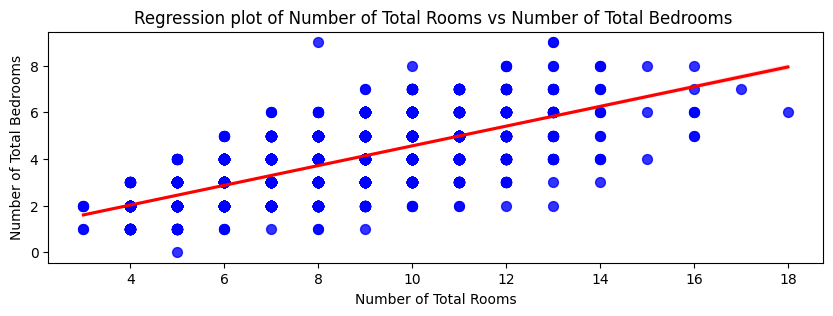

In [176]:
# Set the figure size
plt.figure(figsize=(10, 3))
# Create the a linear line using seaborn
sns.regplot(boston_pred2,x='r_total_rms', y='r_bdrms', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
# Set the title and x-label
plt.title('Regression plot of Number of Total Rooms vs Number of Total Bedrooms ')
plt.xlabel("Number of Total Rooms")
plt.ylabel('Number of Total Bedrooms')
# Display the plot
plt.show()

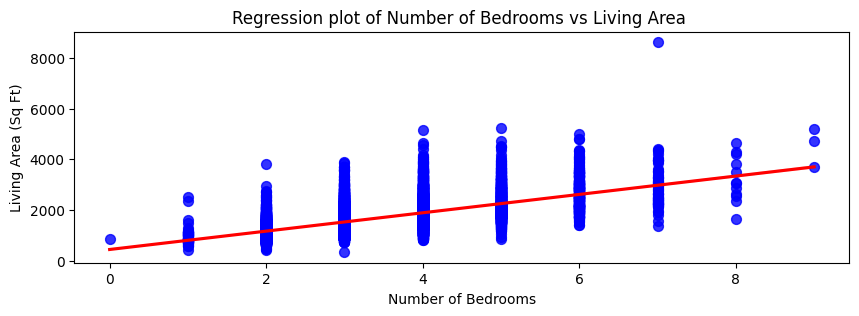

In [179]:
# Set the figure size
plt.figure(figsize=(10, 3))
# Create the a linear line using seaborn
sns.regplot(boston_pred2,x='r_bdrms', y='living_area', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
# Set the title and x-label
plt.title('Regression plot of Number of Bedrooms vs Living Area ')
plt.xlabel("Number of Bedrooms")
plt.ylabel('Living Area (Sq Ft)')
# Display the plot
plt.show()

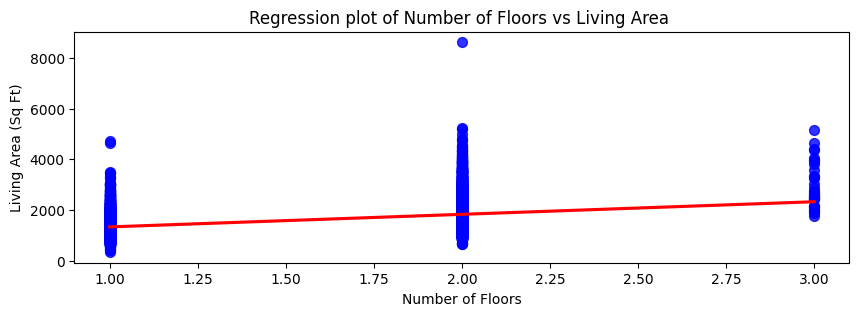

In [180]:
# Set the figure size
plt.figure(figsize=(10, 3))
# Create the a linear line using seaborn
sns.regplot(boston_pred2,x='num_floors', y='living_area', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
# Set the title and x-label
plt.title('Regression plot of Number of Floors vs Living Area ')
plt.xlabel("Number of Floors")
plt.ylabel('Living Area (Sq Ft)')
# Display the plot
plt.show()